# Executive Summary: Predicing housing prices in Ames, Iowa

## Problem Statement

Using the Ames Housing Dataset that is available on [Kaggle](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge), we want to identify which features are the best predictors of housing price and create a regression model that will help us make predictions with the best R<sup>2</sup> score.

The Kaggle challenge offers a train.csv for us to to train our model with, and a test.csv which we will clean and fit the model onto, in order to make our predictions. A csv of the predictions is ultimately uploaded to the Kaggle challenge for scoring.

The model will be tuned closely to the Ames Housing dataset, and we might be able to use our findings from the process to understand what are some key predictors we can use in predicting prices for houses in the United States. However, given that this data set has some features that are very specific to Ames, Iowa (e.g. neighborhood), it will not be perfect fit for other housing data in the U.S.

The model, and our understanding of the key features will be beneficial to existing home owners who might be considering selling their property to have a gauge of what prices their property could fetch. Of course, it will also be highly useful for real estate agents who wish to help their selling customers arrive at an appropriate calling price. Potential home buyers might also find it useful in terms of having a real estimate at what price a house they're looking at might be worth, to adjust their bid price accordingly.

## Organisation

This project has been segmented into two parts.

* This notebook (project_2_part_1) contains the data-cleaning, EDA and modeling processes for the train dataset.
* The subsequent notebook (project_2_part_2) will encompass data cleaning and pre-processing for the test dataset. Predictions for the test set will also be done there.


# Loading the dataset

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, LassoCV, RidgeCV

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
# changing pandas' option to display all columns

pd.set_option('display.max_columns', 999)


In [3]:
# creating a function for ad hoc display of all rows

def show_all(df):
   with pd.option_context('display.max_rows',999,'display.max_columns',999):
       display(df)


In [4]:
# importing our csv files

train = pd.read_csv('./datasets/train.csv')

test = pd.read_csv('./datasets/test.csv')

In [5]:
train.shape

(2051, 81)

In [6]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

# Exploratory Data Analysis & Data Cleaning

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

## Checking for  null values

In [8]:
train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

We want to check which columns have a huge percentage of null values so that we can make decisions early on whether they need to be dropped.

At this stage, we are not going to rename the features yet, so that it's easier for us to make cross-references with the data dictionary.

In [9]:
null_df = train.columns[train.isnull().any()]
num = train[null_df].isnull().sum()
null_list = [round(num/train.shape[0], 3)]

print("---train set---")
display(null_list)


---train set---


[Lot Frontage      0.161
 Alley             0.932
 Mas Vnr Type      0.011
 Mas Vnr Area      0.011
 Bsmt Qual         0.027
 Bsmt Cond         0.027
 Bsmt Exposure     0.028
 BsmtFin Type 1    0.027
 BsmtFin SF 1      0.000
 BsmtFin Type 2    0.027
 BsmtFin SF 2      0.000
 Bsmt Unf SF       0.000
 Total Bsmt SF     0.000
 Bsmt Full Bath    0.001
 Bsmt Half Bath    0.001
 Fireplace Qu      0.488
 Garage Type       0.055
 Garage Yr Blt     0.056
 Garage Finish     0.056
 Garage Cars       0.000
 Garage Area       0.000
 Garage Qual       0.056
 Garage Cond       0.056
 Pool QC           0.996
 Fence             0.805
 Misc Feature      0.968
 dtype: float64]

### Columns with a large number of null cells

**Pool QC**

It has the highest percentage of null values, so it's a prime candidate for dropping. Furthermore, we have another feature, 
"Pool Area" which has 0 null values, and might have more meaningful impact on price.

Decision: Drop

**Misc Feature**

This feature has the second highest percentage of null values. Since there is already "Misc Val" which is a continuous variable and is more meaningful for price calculation, we can safely drop this feature too.

Decision: Drop

**Alley**

93% of rows are null, which means we can't get very meaningful inferences from this. Furthermore, this feature refers to whether the alley access is gravel, paved, or if there's no alley - not the most important feature when it comes to price. A similar feature, "Street" (also about whether it's gravel/paved/none) is probably more meaningful.

Decision: Drop

**Fireplace Qu**

This feature has a relatively high proportion of null values, with 49% missing. Although there's actually another feature "Fireplaces" which captures the number of fireplaces, I think we can try keeping this feature first, run some analysis before deciding what to do with it.

Decision: Keep

**Fence**

It has 80% null values, so it's a candidate for dropping. But the quality of the fence (e.g. if it gives privacy, or if it's non-existent) might have a meaningful impact on calculations. Also, there is no other feature that pertains to matters about fences, so we'll keep it for now.

Decision: Keep




In [10]:
# Dropping the afore-mentioned columns

train.drop(['Pool QC', 'Misc Feature', 'Alley'], axis = 1, inplace=True) 


In [11]:
# and since we already have Id, we don't need an index
train.set_index("Id", inplace = True) 


In [12]:
train.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                     
109  533352170           60        RL           NaN     13517   Pave   
544  531379050           60        RL          43.0     11492   Pave   
153  535304180           20        RL          68.0      7922   Pave   
318  916386060           60        RL          73.0      9802   Pave   
255  906425045           50        RL          82.0     14235   Pave   

    Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                        
109       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
544       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
153       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
318       Reg          Lvl    AllPub     Inside        Gtl       Timber   
255       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                              
109        RRAe        Norm      1Fam      2Story             6             8   
544        Norm        Norm      1Fam      2Story             7             5   
153        Norm        Norm      1Fam      1Story             5             7   
318        Norm        Norm      1Fam      2Story             5             5   
255        Norm        Norm      1Fam      1.5Fin             6             8   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                  
109        1976            2005      Gable   CompShg      HdBoard   
544        1996            1997      Gable   CompShg      VinylSd   
153        1953            2007      Gable   CompShg      VinylSd   
318        2006            2007      Gable   CompShg      VinylSd   
255        1900            1993      Gable   CompShg      Wd Sdng   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
Id                                                                             
109      Plywood      BrkFace         289.0         Gd         TA     CBlock   
544      VinylSd      BrkFace         132.0         Gd         TA      PConc   
153      VinylSd         None           0.0         TA         Gd     CBlock   
318      VinylSd         None           0.0         TA         TA      PConc   
255      Plywood         None           0.0         TA         TA      PConc   

    Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                   
109        TA        TA            No            GLQ         533.0   
544        Gd        TA            No            GLQ         637.0   
153        TA        TA            No            GLQ         731.0   
318        Gd        TA            No            Unf           0.0   
255        Fa        Gd            No            Unf           0.0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                     
109            Unf           0.0        192.0          725.0    GasA   
544            Unf           0.0        276.0          913.0    GasA   
153            Unf           0.0        326.0         1057.0    GasA   
318            Unf           0.0        384.0          384.0    GasA   
255            Unf           0.0        676.0          676.0    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                              
109         Ex           Y      SBrkr         725         754   
544         Ex           Y      SBrkr         913        1209   
153         TA           Y      SBrkr        1057           0   
318         Gd           Y      SBrkr         


Using describe to look for outliers in our numeric features

In [13]:
show_all(train.describe(include="all").T)

count unique      top  freq        mean          std  \
PID              2051    NaN      NaN   NaN  7.1359e+08  1.88692e+08   
MS SubClass      2051    NaN      NaN   NaN     57.0088      42.8242   
MS Zoning        2051      7       RL  1598         NaN          NaN   
Lot Frontage     1721    NaN      NaN   NaN     69.0552      23.2607   
Lot Area         2051    NaN      NaN   NaN     10065.2      6742.49   
Street           2051      2     Pave  2044         NaN          NaN   
Lot Shape        2051      4      Reg  1295         NaN          NaN   
Land Contour     2051      4      Lvl  1843         NaN          NaN   
Utilities        2051      3   AllPub  2049         NaN          NaN   
Lot Config       2051      5   Inside  1503         NaN          NaN   
Land Slope       2051      3      Gtl  1953         NaN          NaN   
Neighborhood     2051     28    NAmes   310         NaN          NaN   
Condition 1      2051      9     Norm  1767         NaN          NaN   
Condition 2      2051      8     Norm  2025         NaN          NaN   
Bldg Type        2051      5     1Fam  1700         NaN          NaN   
House Style      2051      8   1Story  1059         NaN          NaN   
Overall Qual     2051    NaN      NaN   NaN     6.11214      1.42627   
Overall Cond     2051    NaN      NaN   NaN     5.56216       1.1045   
Year Built       2051    NaN      NaN   NaN     1971.71      30.1779   
Year Remod/Add   2051    NaN      NaN   NaN     1984.19      21.0363   
Roof Style       2051      6    Gable  1619         NaN          NaN   
Roof Matl        2051      6  CompShg  2025         NaN          NaN   
Exterior 1st     2051     15  VinylSd   724         NaN          NaN   
Exterior 2nd     2051     15  VinylSd   721         NaN          NaN   
Mas Vnr Type     2029      4     None  1218         NaN          NaN   
Mas Vnr Area     2029    NaN      NaN   NaN     99.6959      174.963   
Exter Qual       2051      4       TA  1247         NaN          NaN   
Exter Cond       2051      5       TA  1778         NaN          NaN   
Foundation       2051      6    PConc   926         NaN          NaN   
Bsmt Qual        1996      5       TA   887         NaN          NaN   
Bsmt Cond        1996      5       TA  1834         NaN          NaN   
Bsmt Exposure    1993      4       No  1339         NaN          NaN   
BsmtFin Type 1   1996      6      GLQ   615         NaN          NaN   
BsmtFin SF 1     2050    NaN      NaN   NaN       442.3      461.204   
BsmtFin Type 2   1995      6      Unf  1749         NaN          NaN   
BsmtFin SF 2     2050    NaN      NaN   NaN      47.959      165.001   
Bsmt Unf SF      2050    NaN      NaN   NaN     567.728      444.955   
Total Bsmt SF    2050    NaN      NaN   NaN     1057.99      449.411   
Heating          2051      5     GasA  2018         NaN          NaN   
Heating QC       2051      5       Ex  1065         NaN          NaN   
Central Air      2051      2        Y  1910         NaN          NaN   
Electrical       2051      5    SBrkr  1868         NaN          NaN   
1st Flr SF       2051    NaN      NaN   NaN     1164.49      396.447   
2nd Flr SF       2051    NaN      NaN   NaN     329.329      425.671   
Low Qual Fin SF  2051    NaN      NaN   NaN     5.51292      51.0689   
Gr Liv Area      2051    NaN      NaN   NaN     1499.33      500.448   
Bsmt Full Bath   2049    NaN      NaN   NaN    0.427526     0.522673   
Bsmt Half Bath   2049    NaN      NaN   NaN   0.0634456     0.251705   
Full Bath        2051    NaN      NaN   NaN     1.57728     0.549279   
Half Bath        2051    NaN      NaN   NaN    0.371039     0.501043   
Bedroom AbvGr    2051    NaN      NaN   NaN     2.84349     0.826618   
Kitchen AbvGr    2051    NaN      NaN   NaN     1.04291      0.20979   
Kitchen Qual     2051      4       TA  1047         NaN          NaN   
TotRms AbvGrd    2051    NaN      NaN   NaN     6.43588      1.56022   
Functional       2051      8      Typ  1915         NaN 

### Checking non-numeric columns

Checking each non-numeric column for its unique values and respective counts, 10 columns at a time.

Part of this process is to determine if a column is categorical or ordinal.

We also want to keep a look out for typos in the unique labels.

In [14]:
train_obj = train.select_dtypes(include=['object'])
train_obj.shape

(2051, 39)

In [15]:
for x in range(0,10):
    print ("---- {} ---".format(train_obj.columns[x]))
    print("Null count:",train_obj.iloc[:,x].isnull().sum())
    print(train_obj.iloc[:,x].value_counts(dropna=False).sort_index(ascending=True))
    print()


---- MS Zoning ---
Null count: 0
A (agr)       2
C (all)      19
FV          101
I (all)       1
RH           14
RL         1598
RM          316
Name: MS Zoning, dtype: int64

---- Street ---
Null count: 0
Grvl       7
Pave    2044
Name: Street, dtype: int64

---- Lot Shape ---
Null count: 0
IR1     692
IR2      55
IR3       9
Reg    1295
Name: Lot Shape, dtype: int64

---- Land Contour ---
Null count: 0
Bnk      80
HLS      85
Low      43
Lvl    1843
Name: Land Contour, dtype: int64

---- Utilities ---
Null count: 0
AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

---- Lot Config ---
Null count: 0
Corner      348
CulDSac     131
FR2          60
FR3           9
Inside     1503
Name: Lot Config, dtype: int64

---- Land Slope ---
Null count: 0
Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64

---- Neighborhood ---
Null count: 0
Blmngtn     22
Blueste      6
BrDale      19
BrkSide     76
ClearCr     27
CollgCr    180
Crawfor     71
Edwards    1

In [16]:
for x in range(10,20):
    print ("---- {} ---".format(train_obj.columns[x]))
    print("Null count:",train_obj.iloc[:,x].isnull().sum())
    print(train_obj.iloc[:,x].value_counts(dropna=False).sort_index(ascending=True))
    print()


---- Bldg Type ---
Null count: 0
1Fam      1700
2fmCon      46
Duplex      75
Twnhs       69
TwnhsE     161
Name: Bldg Type, dtype: int64

---- House Style ---
Null count: 0
1.5Fin     218
1.5Unf      12
1Story    1059
2.5Fin       6
2.5Unf      14
2Story     598
SFoyer      50
SLvl        94
Name: House Style, dtype: int64

---- Roof Style ---
Null count: 0
Flat         13
Gable      1619
Gambrel      12
Hip         397
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

---- Roof Matl ---
Null count: 0
ClyTile       1
CompShg    2025
Membran       1
Tar&Grv      15
WdShake       4
WdShngl       5
Name: Roof Matl, dtype: int64

---- Exterior 1st ---
Null count: 0
AsbShng     33
AsphShn      1
BrkComm      3
BrkFace     64
CBlock       2
CemntBd     90
HdBoard    300
ImStucc      1
MetalSd    331
Plywood    152
Stone        2
Stucco      27
VinylSd    724
Wd Sdng    276
WdShing     45
Name: Exterior 1st, dtype: int64

---- Exterior 2nd ---
Null count: 0
AsbShng     28
AsphS

In [17]:
for x in range(20,30):
    print ("---- {} ---".format(train_obj.columns[x]))
    print("Null count:",train_obj.iloc[:,x].isnull().sum())
    print(train_obj.iloc[:,x].value_counts(dropna=False).sort_index(ascending=True))
    print()


---- Bsmt Qual ---
Null count: 55
Ex     184
Fa      60
Gd     864
Po       1
TA     887
NaN     55
Name: Bsmt Qual, dtype: int64

---- Bsmt Cond ---
Null count: 55
Ex        3
Fa       65
Gd       89
Po        5
TA     1834
NaN      55
Name: Bsmt Cond, dtype: int64

---- Bsmt Exposure ---
Null count: 58
Av      288
Gd      203
Mn      163
No     1339
NaN      58
Name: Bsmt Exposure, dtype: int64

---- BsmtFin Type 1 ---
Null count: 55
ALQ    293
BLQ    200
GLQ    615
LwQ    102
Rec    183
Unf    603
NaN     55
Name: BsmtFin Type 1, dtype: int64

---- BsmtFin Type 2 ---
Null count: 56
ALQ      35
BLQ      48
GLQ      23
LwQ      60
Rec      80
Unf    1749
NaN      56
Name: BsmtFin Type 2, dtype: int64

---- Heating ---
Null count: 0
GasA    2018
GasW      20
Grav       5
OthW       2
Wall       6
Name: Heating, dtype: int64

---- Heating QC ---
Null count: 0
Ex    1065
Fa      67
Gd     319
Po       3
TA     597
Name: Heating QC, dtype: int64

---- Central Air ---
Null count: 0
N     1

In [18]:
for x in range(30,39):
    print ("---- {} ---".format(train_obj.columns[x]))
    print("Null count:",train_obj.iloc[:,x].isnull().sum())
    print(train_obj.iloc[:,x].value_counts(dropna=False).sort_index(ascending=True))
    print()


---- Functional ---
Null count: 0
Maj1      12
Maj2       7
Min1      42
Min2      42
Mod       29
Sal        2
Sev        2
Typ     1915
Name: Functional, dtype: int64

---- Fireplace Qu ---
Null count: 1000
Ex       31
Fa       59
Gd      523
Po       31
TA      407
NaN    1000
Name: Fireplace Qu, dtype: int64

---- Garage Type ---
Null count: 113
2Types       19
Attchd     1213
Basment      27
BuiltIn     132
CarPort      11
Detchd      536
NaN         113
Name: Garage Type, dtype: int64

---- Garage Finish ---
Null count: 114
Fin    509
RFn    579
Unf    849
NaN    114
Name: Garage Finish, dtype: int64

---- Garage Qual ---
Null count: 114
Ex        3
Fa       82
Gd       18
Po        2
TA     1832
NaN     114
Name: Garage Qual, dtype: int64

---- Garage Cond ---
Null count: 114
Ex        2
Fa       47
Gd       12
Po        8
TA     1868
NaN     114
Name: Garage Cond, dtype: int64

---- Paved Drive ---
Null count: 0
N     151
P      39
Y    1861
Name: Paved Drive, dtype: int64

---

**Summary of irregularities and NaN rows**

Looking through the columns, these are the number of rows with NaN and high number of 0 values we need to examine in case there are problems:
* Lot Frontage
    * 330 x NaN (unlikely for houses in the U.S to not have Lot Frontage
* Neigborhood
    * Just a reminder that we might want to make sure that the neighborhoods we have in our data correspond to our data dictionary
* Mas Vnr Type
    * 1218 x "None" (i.e. no masonry veneer)
    * 22 x NaN 
* Mas Vnr Area
    * 1216 x 0.0 (i.e. no masonry vaneer area; we need to understand why the number of rows don't match with "Mas Vnr Type")
    * 22 x NaN
* Bsmt Qual
    * 55 x NaN (i.e. no basement)
* Bsmt Cond
    * 55 x NaN (i.e. no basement)
* Bsmt Exposure
    * 1339 x No (i.e. no exposure at all)
    * 58 x NaN (i.e. no basement; we need to understand why the number of rows is suddenly more than for "Bsmt Qual" and "Bsmt Cond")
* BsmtFin Type 1
    * 55 x NaN (i.e no basement)
* BsmtFin SF 1
    * 657 x 0.0 (i.e. finished square feet of basement Type 1; what causes this high number?)
* BsmtFin Type 2
    * 56 x NaN (i.e. no basement; but why is there one more than the usual 55?)
* BsmtFin SF 2
    * 1803 x 0.0 (i.e. finished square feet of basement Type 2; what causes this high number?)
    * 1 x NaN
* Bsmt Unf SF 
    * 165 x 0.0 (i.e. 0 unfinished sqft - does this mean basement is completely finished? and does it contain the no basement rows?)
    * 1 x NaN 
* Total Bsmt SF
    * 54 x 0.0 (i.e. no basement)
    * 1 x NaN (this will explain why we have only 54 rows of value 0 instead of the expected 55)
* 2nd Flr SF
    * 1191 x 0 (i.e. no second floor; not an issue)
* Low Qual Fin SF
    * 2018 x 0 (i.e. houses without any low quality floor finishing; not an issue)
* Bsmt Full Bath
    * 1200 x 0.0 (i.e. no full bath in basement)
    * 2 x NaN
* Bsmt Half Bath
    * 1923 x 0.0 (i.e. no half-baths in basement)
    * 2 x NaN (i.e. missing data)
* Full Bath
    * 8 x 0 (i.e. no full baths in the house)
* Half Bath
    * 1308 x 0 (i.e. no half-baths in the house)
* Bedroom AbvGr
    * 5 x 0 (i.e. no bedrooms above basement)
* Kitchen AbvGr
    * 2 x 0  (i.e. no kitchens above basement)
* Fireplaces
    * 1000 x 0 (i.e. no fireplaces)
* Fireplace Qu
    * 1000 x NaN (i.e. no fireplaces)
* Garage Type
    * 113 x NaN (i.e. no garage)
* Garage Yr Blt
    * 114 x NaN (i.e. missing data; but why is there one more than number of rows for "Garage Type" = NaN)    
    * 1 x 2207.0 (i.e. erroneous data)
* Garage Finish
    * 114 x NaN (i.e. no garage, again discrepancy with number of rows for for "Garage Type" = NaN)
* Garage Cars
    * 113 x 0.0 (i.e. no garage)
    * 1 x Nan (should be handled together with the 113 rows that have 0.0 for this column)
    * Also by now we start to realise that it is probably "Garage Type" that is short of one row with value NaN (i.e. there should have been 114 rows)
* Garage Area
    * 113 x 0.0 (i.e. no garage)
    * 1 x NaN (probably the same row as the NaN row in Garage Cars)
* Garage Qual
    * 114 x NaN (i.e. no garage)
* Garage Cond
    * 114 x NaN (i.e. no garage)
* Wood Deck SF
    * 1075 x 0 (i.e. no wood deck, no action required)
* Open Porch
    * 912 x 0 (i.e. no open porch, no action required)
* Enclosed Porch
    * 1724 x 0 (i.e. no enclosed porch; given that we started off with 2051 rows, the percentage of rows with 0 value is too high for this feature to be useful. Let's drop this.)
* 3Ssn Porch
    * 2025 x 0 (i.e. no porch that's suitable across three seasons; given that we started off with 2051 rows, the percentage of rows with 0 value is too high for this feature to be useful. Let's drop this.)
* Screen Porch
    * 1870 x 0 (i.e. no screened porch; given that we started off with 2051 rows, the percentage of rows with 0 value is too high for this feature to be useful. Let's drop this.)
* Pool Area
    * 2042 x 0 (i.e. no pool; given that we started off with 2051 rows, the percentage of rows with 0 value is too high for this feature to be useful. Let's drop this.)
* Fence
    * 1651 x NaN (i.e no fence; given that we started off with 2051 rows, the percentage of rows with 0 value is too high for this feature to be useful. Let's drop this.)
* Misc Val
    * 1986 x 0 (i.e. no misc features, hence no "Misc Val"; given that we started off with 2051 rows, the percentage of rows with 0 value is too high for this feature to be useful. Let's drop this.)
    
    
**Approach for NaN**

Generally if a certain cell is NaN because the feature is not applicable, such as when "Mas Vnr Area" and "Mas Vnr Type" are NaN because there is no masonry veneer, we want to reflect that info by doing fillna() with 0 or "None". After all, this will affect the price predictions.

On the other hand, if data is missing/erroneous because of improper data entry/data collection, such as in the case of "Lot Frontage" - we assumed that in the U.S. all homes would have lot frontage - we want to try to impute it. 

## Handling null rows and other issues.

We'll handle Lot Frontage later as it will probably require imputing of data. 

Let's start by checking the neigborhoods. 

### Neighborhoods

Neighborhoods is one column that might potentially cause problems when we use one-hot-encoding subsequently. Unlike other columns, Neighborhoods has quite a long list of unique values, so there's a possibility that our train and test data sets might have different lists of unique values. 

For instance, Utilities (i.e. types of utilities, according to the data dictionary) has a finite and very succinct list of unique values ('AllPub', 'NoSeWa', 'NoSwer') - we can safely assume that all data rows, be they from the train or test data set, will stick to one of those three types and nothing else. 

However, we can see that Neighborhoods has more than 20 unique values, and most importantly, because it's a names-based column, there's a real possibility that the test data set has transaction records for houses from *other neighbourhoods not provided in the train data set*. If that happens, we'll encounter problems during the modeling stage because our train and test sets will end up with different numbers of columns after one-hot-encoding. 

The most practical way of managing that is to adhere strictly to the data dictionary, which lists the expected neighbourhood names - so if any row contains a neighbourhood not listed in the data dictionary, we will drop that row. Of course, we do want to first make sure there isn't a significant number of such problematic rows.

In [19]:
# datadict_hoods to store the list of expected neighbourhoods as provided in the data dictionary.

datadict_hoods = [
            "Blmngtn",
            "Blueste",
            "BrDale",
            "BrkSide",
            "ClearCr",
            "CollgCr",
            "Crawfor",
            "Edwards",
            "Gilbert",
            "IDOTRR",
            "MeadowV",
            "Mitchel",
            "Names",
            "NoRidge",
            "NPkVill",
            "NridgHt",
            "NWAmes",
            "OldTown",
            "SWISU",
            "Sawyer",
            "SawyerW",
            "Somerst",
            "StoneBr",
            "Timber",
            "Veenker"
    ]

datadict_hoods = [x.lower() for x in datadict_hoods]

datadict_hoods

['blmngtn',
 'blueste',
 'brdale',
 'brkside',
 'clearcr',
 'collgcr',
 'crawfor',
 'edwards',
 'gilbert',
 'idotrr',
 'meadowv',
 'mitchel',
 'names',
 'noridge',
 'npkvill',
 'nridght',
 'nwames',
 'oldtown',
 'swisu',
 'sawyer',
 'sawyerw',
 'somerst',
 'stonebr',
 'timber',
 'veenker']

In [20]:
# creating a dictionary object to make filtering our train dataset easier.

train_hoods = {}
train_hoods = train["Neighborhood"]
train_hoods = {x.lower() for x in train_hoods}
train_hoods

{'blmngtn',
 'blueste',
 'brdale',
 'brkside',
 'clearcr',
 'collgcr',
 'crawfor',
 'edwards',
 'gilbert',
 'greens',
 'grnhill',
 'idotrr',
 'landmrk',
 'meadowv',
 'mitchel',
 'names',
 'noridge',
 'npkvill',
 'nridght',
 'nwames',
 'oldtown',
 'sawyer',
 'sawyerw',
 'somerst',
 'stonebr',
 'swisu',
 'timber',
 'veenker'}

In [21]:
# we want to identify which are the neighbourhoods not listed in the data dictionary first.

not_found = []
for i in train_hoods:
    if i not in datadict_hoods: 
        not_found.append(i)
    else:
        continue
        
not_found

['landmrk', 'greens', 'grnhill']

In [22]:
# looking at the rows that have 'greens', 'landmrk' or 'grnhill' neighbourhoods

display(train[(train["Neighborhood"].str.lower() == "greens") | (train["Neighborhood"].str.lower() == "landmrk") | (train["Neighborhood"].str.lower() == "grnhill")])

# counting the number of such rows
print(train[(train["Neighborhood"].str.lower() == "greens") | (train["Neighborhood"].str.lower() == "landmrk") | (train["Neighborhood"].str.lower() == "grnhill")].shape)

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                      
2257  916253320          120        RM           NaN      9763   Pave   
2521  533253090          120        RL          40.0      3874   Pave   
2789  907230240          160        RH           NaN      3612   Pave   
2893  916252170          120        RM           NaN      8239   Pave   
108   533253210          120        RL          40.0      3880   Pave   
2522  533253160          120        RL          40.0      3876   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                         
2257       IR1          Lvl    AllPub     Inside        Gtl      GrnHill   
2521       IR1          Lvl    AllPub     Inside        Gtl       Greens   
2789       IR1          Lvl    AllPub     Inside        Gtl      Landmrk   
2893       IR1          Lvl    AllPub     Inside        Gtl      GrnHill   
108        IR1          Lvl    AllPub     Inside        Gtl       Greens   
2522       IR1          Lvl    AllPub     Inside        Gtl       Greens   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
Id                                                                 
2257        Norm        Norm    TwnhsE      1Story             7   
2521        Norm        Norm    TwnhsE      1Story             8   
2789        Norm        Norm     Twnhs      2Story             6   
2893        Norm        Norm    TwnhsE      1Story             7   
108         Norm        Norm     Twnhs      1Story             8   
2522        Norm        Norm     Twnhs      1Story             8   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
Id                                                                    
2257             5        1998            1998      Gable   CompShg   
2521             5        1980            1980      Gable   CompShg   
2789             5        1993            1994      Gable   CompShg   
2893             5        1986            1986      Gable   CompShg   
108              6        1978            1978      Gable   CompShg   
2522             5        1978            1978      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
Id                                                                     
2257      Wd Sdng      Wd Sdng      BrkFace         239.0         Gd   
2521      Wd Sdng      Wd Sdng         None           0.0         Gd   
2789      VinylSd      VinylSd         None           0.0         TA   
2893      BrkFace      Wd Sdng         None           0.0         Gd   
108       Wd Sdng      Plywood         None           0.0         Gd   
2522      Wd Sdng      Plywood         None           0.0         Gd   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
Id                                                                            
2257         TA      PConc        Gd        TA            No            GLQ   
2521         TA     CBlock        Gd        TA            Gd            GLQ   
2789         TA      PConc        Gd        TA            No            GLQ   
2893         TA     CBlock       NaN       NaN           NaN            NaN   
108          TA     CBlock        Gd        TA            Gd            GLQ   
2522         TA     CBlock        Gd        TA            Gd            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
Id                                                                            
2257        1102.0            ALQ          72.0        328.0         1502.0   
2521         807.0            Unf           0.0        419.0         1226.0   
2789         338.0            Unf           0.0        292.0          630.0   
2893           0.0            NaN           0.0          0.0            0.0   
108         1052.0  

(6, 77)


In [23]:
train.shape

(2051, 77)

In [24]:
# It's just a couple of rows out of our 2000+ data set so we are going to delete these so that we don't run into problems with our get_dummies later

train = train[~((train["Neighborhood"].str.lower() == "greens") | (train["Neighborhood"].str.lower() == "landmrk") | (train["Neighborhood"].str.lower() == "grnhill"))]


In [25]:
train.shape

(2045, 77)

### Veneer 
Now we want to
* check if those 22 rows with "Mas Vnr Area" = NaN also have "Mas Vnr Types" = NaN (i.e. no area provided since no veneer type)
    * if true, change all  "Mas Vnr Area" with NaN to "None" --> expected 1238 x "None" (1216 + 22)
    * change all "Mas Vnr Typ" with NaN to "None" --> expected 1240 x "None" (1218 + 22)
    * then for all rows with "Mas Vnr Types" = "None", check if there are any wrong (i.e. not zero) values for "Mas Vnr Area"
        * if so, set "Mas Vnr Areas" = 0 for all those rows


In [26]:
#  Checking if rows with "Mas Vnr Area" = NaN also have "Mas Vnr Types" = NaN (i.e. no area provided since no veneer type)
train[train["Mas Vnr Area"].isnull()].iloc[:,train.columns.get_loc("Mas Vnr Type"):]

Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
Id                                                                           
2393          NaN           NaN         Gd         TA      PConc        Ex   
2383          NaN           NaN         Ex         TA      PConc        Ex   
539           NaN           NaN         Gd         TA      PConc        Gd   
518           NaN           NaN         Gd         TA      PConc        Ex   
2824          NaN           NaN         TA         TA      PConc        Gd   
1800          NaN           NaN         Gd         TA      PConc        Ex   
1455          NaN           NaN         Gd         TA      PConc        Gd   
1120          NaN           NaN         Gd         TA      PConc        Ex   
1841          NaN           NaN         Gd         TA      PConc        Gd   
1840          NaN           NaN         Gd         TA      PConc        Gd   
2230          NaN           NaN         Gd         TA      PConc        TA   
1123          NaN           NaN         Gd         TA      PConc        Gd   
1784          NaN           NaN         Gd         TA      PConc        Gd   
485           NaN           NaN         Gd         TA      PConc        Ex   
1752          NaN           NaN         Gd         TA      PConc        Gd   
1185          NaN           NaN         Gd         TA      PConc        Gd   
1128          NaN           NaN         Gd         TA      PConc        Gd   
1096          NaN           NaN         Gd         TA      PConc        Gd   
2261          NaN           NaN         Gd         TA      PConc        Gd   
2456          NaN           NaN         Gd         TA      PConc        Ex   
1728          NaN           NaN         Gd         TA     CBlock        Gd   
56            NaN           NaN         Gd         TA      PConc        Gd   

     Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
Id                                                                         
2393        TA            Av            Unf           0.0            Unf   
2383        Gd            Gd            GLQ        1386.0            Unf   
539         TA            No            GLQ         833.0            Unf   
518         TA            No            Unf           0.0            Unf   
2824        TA            Av            GLQ         475.0            ALQ   
1800        TA            Av            GLQ         745.0            Unf   
1455        TA            No            GLQ         804.0            Unf   
1120        TA            No            GLQ         666.0            Unf   
1841        TA            No            GLQ        1106.0            Unf   
1840        TA            No            Unf           0.0            Unf   
2230        TA            No            Rec        1219.0            Unf   
1123        TA            No            Unf           0.0            Unf   
1784        TA            No            Unf           0.0            Unf   
485         TA            No            GLQ         651.0            Unf   
1752        TA            No            Unf           0.0            Unf   
1185        TA            No            Unf           0.0            Unf   
1128        TA            No            Unf           0.0            Unf   
1096        TA            No            Unf           0.0            Unf   
2261        TA            Av            GLQ         583.0            Unf   
2456        Gd            No            GLQ        1562.0            Unf   
1728        TA            No            Unf           0.0            Unf   
56          TA            No            GLQ         625.0            Unf   

      BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
Id                                                                              
2393           0.0       1209.0         1209.0    GasA         Ex           Y   
2383           0.0        690.0         2076.0    GasA         E

In [27]:
# verifying again that the no. of "Mas Vnr Area" = NaN rows are 22.
train[train["Mas Vnr Area"].isnull()].shape

(22, 77)

We have verified that the above rows with "Mas Vnr Area" = NaN also have "Mas Vnr Type" = NaN.

Therefore, we will fillna(0) for "Mas Vnr Area", then verify that we are not left with anymore null values in "Mas Vnr Area"

In [28]:
# passing 0 to all NaN fields using fillna()
train["Mas Vnr Area"] = train["Mas Vnr Area"].fillna(0)

In [29]:
# checking that there are no more null values
train["Mas Vnr Area"].isnull().sum()

0

In [30]:
# again, checking that there are no more null values

train[train["Mas Vnr Area"].isnull()].iloc[:,train.columns.get_loc("Mas Vnr Type"):]


Empty DataFrame
Columns: [Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [31]:
train["Mas Vnr Area"].value_counts(dropna=False)

0.0       1233
120.0       11
200.0       10
176.0       10
108.0        9
          ... 
361.0        1
121.0        1
156.0        1
66.0         1
1031.0       1
Name: Mas Vnr Area, Length: 372, dtype: int64

In [32]:
# checking again with the corresponding column, "Mas Vnr Type"
train[train["Mas Vnr Type"].isnull()].iloc[:,train.columns.get_loc("Mas Vnr Type"):]

Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
Id                                                                           
2393          NaN           0.0         Gd         TA      PConc        Ex   
2383          NaN           0.0         Ex         TA      PConc        Ex   
539           NaN           0.0         Gd         TA      PConc        Gd   
518           NaN           0.0         Gd         TA      PConc        Ex   
2824          NaN           0.0         TA         TA      PConc        Gd   
1800          NaN           0.0         Gd         TA      PConc        Ex   
1455          NaN           0.0         Gd         TA      PConc        Gd   
1120          NaN           0.0         Gd         TA      PConc        Ex   
1841          NaN           0.0         Gd         TA      PConc        Gd   
1840          NaN           0.0         Gd         TA      PConc        Gd   
2230          NaN           0.0         Gd         TA      PConc        TA   
1123          NaN           0.0         Gd         TA      PConc        Gd   
1784          NaN           0.0         Gd         TA      PConc        Gd   
485           NaN           0.0         Gd         TA      PConc        Ex   
1752          NaN           0.0         Gd         TA      PConc        Gd   
1185          NaN           0.0         Gd         TA      PConc        Gd   
1128          NaN           0.0         Gd         TA      PConc        Gd   
1096          NaN           0.0         Gd         TA      PConc        Gd   
2261          NaN           0.0         Gd         TA      PConc        Gd   
2456          NaN           0.0         Gd         TA      PConc        Ex   
1728          NaN           0.0         Gd         TA     CBlock        Gd   
56            NaN           0.0         Gd         TA      PConc        Gd   

     Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
Id                                                                         
2393        TA            Av            Unf           0.0            Unf   
2383        Gd            Gd            GLQ        1386.0            Unf   
539         TA            No            GLQ         833.0            Unf   
518         TA            No            Unf           0.0            Unf   
2824        TA            Av            GLQ         475.0            ALQ   
1800        TA            Av            GLQ         745.0            Unf   
1455        TA            No            GLQ         804.0            Unf   
1120        TA            No            GLQ         666.0            Unf   
1841        TA            No            GLQ        1106.0            Unf   
1840        TA            No            Unf           0.0            Unf   
2230        TA            No            Rec        1219.0            Unf   
1123        TA            No            Unf           0.0            Unf   
1784        TA            No            Unf           0.0            Unf   
485         TA            No            GLQ         651.0            Unf   
1752        TA            No            Unf           0.0            Unf   
1185        TA            No            Unf           0.0            Unf   
1128        TA            No            Unf           0.0            Unf   
1096        TA            No            Unf           0.0            Unf   
2261        TA            Av            GLQ         583.0            Unf   
2456        Gd            No            GLQ        1562.0            Unf   
1728        TA            No            Unf           0.0            Unf   
56          TA            No            GLQ         625.0            Unf   

      BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
Id                                                                              
2393           0.0       1209.0         1209.0    GasA         Ex           Y   
2383           0.0        690.0         2076.0    GasA         E

In [33]:
# # passing 0 to all NaN fields
train["Mas Vnr Type"] = train["Mas Vnr Type"].fillna("None")

In [34]:
# checking that there are no more null values

train[train["Mas Vnr Type"].isnull()].iloc[:,train.columns.get_loc("Mas Vnr Type"):]

Empty DataFrame
Columns: [Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [35]:
# checking again that there are no more null values
train["Mas Vnr Type"].isnull().sum()

0

In [36]:
# checking again that there are no more null values
train["Mas Vnr Type"].value_counts(dropna=False)

None       1235
BrkFace     629
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [37]:
# checking if there are others rows that have "None" for veneer type but area > 0
train[(train["Mas Vnr Type"]=="None") & (train["Mas Vnr Area"]>0)].iloc[:,train.columns.get_loc("Mas Vnr Type"):]


Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
Id                                                                           
1862         None           1.0         TA         TA     CBlock        Gd   
2529         None         288.0         TA         TA     CBlock        TA   
1914         None           1.0         TA         TA     CBlock        TA   
2004         None           1.0         TA         TA     CBlock       NaN   
364          None         344.0         Gd         TA      PConc        Gd   

     Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
Id                                                                         
1862        TA            No            GLQ         498.0            Rec   
2529        TA            No            Rec         247.0            Unf   
1914        TA            No            Rec         456.0            Unf   
2004       NaN           NaN            NaN           0.0            NaN   
364         TA            No            GLQ         694.0            Unf   

      BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
Id                                                                              
1862         211.0        652.0         1361.0    GasA         Ex           Y   
2529           0.0        485.0          732.0    GasA         Gd           Y   
1914           0.0        456.0          912.0    GasA         Ex           Y   
2004           0.0          0.0            0.0    GasA         Gd           Y   
364            0.0        284.0          978.0    GasA         Ex           Y   

     Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
Id                                                                      
1862      SBrkr        1361        1259                0         2620   
2529      SBrkr        1012         778                0         1790   
1914      FuseA         912           0                0          912   
2004      SBrkr         968           0                0          968   
364       SBrkr        1005         978                0         1983   

      Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
Id                                                                          
1862             0.0             0.0          2          2              4   
2529             1.0             0.0          1          2              4   
1914             0.0             0.0          1          0              2   
2004             0.0             0.0          1          0              2   
364              0.0             0.0          2          1              3   

      Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces  \
Id                                                                       
1862              2           TA             12        Typ           1   
2529              1           TA              8       Min2           1   
1914              1           TA              5        Typ           0   
2004              1           TA              5        Typ           0   
364               1           Gd              9        Typ           1   

     Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  \
Id                                                                        
1862           TA     BuiltIn         1977.0           RFn          2.0   
2529           TA      Attchd         1972.0           RFn          2.0   
1914          NaN      Attchd         1958.0           RFn          1.0   
2004          NaN      Attchd         1956.0           Unf          1.0   
364            TA      Attchd         1999.0           Fin          2.0   

      Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  \
Id                                                                    
1862        600.0          TA          TA           N           155   
2529        484.0          TA          TA      

It is not possible for a house to have no veneer type yet have veneer area, so we will set "Mas Vnr Area" = 0 for the above 5 rows. 

Note that these five rows were NOT affected by our previous action of setting rows with "Mas Vnr Type" = NaN to "None", because we have already made appropriate checks earlier.

But regardless - 5 rows out of a 2000+ row data set is negligible.

In [38]:
# simplified view showing just index and "Mas Vnr Area" value
train[(train["Mas Vnr Type"]=="None") & (train["Mas Vnr Area"]>0)]["Mas Vnr Area"]


Id
1862      1.0
2529    288.0
1914      1.0
2004      1.0
364     344.0
Name: Mas Vnr Area, dtype: float64

In [39]:
train["Mas Vnr Area"].value_counts()

0.0       1233
120.0       11
200.0       10
176.0       10
108.0        9
          ... 
361.0        1
121.0        1
156.0        1
66.0         1
1031.0       1
Name: Mas Vnr Area, Length: 372, dtype: int64

In [40]:
# setting "Mas Vnr Area" = 0 for all rows with "Mas Vnr Type" == "None"

train.loc[train["Mas Vnr Type"]=="None", "Mas Vnr Area"] = 0


In [41]:
# checking that there are no more rows with erroneous Mas Vnr Area values
train[(train["Mas Vnr Type"]=="None") & (train["Mas Vnr Area"]>0)]

Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [42]:
# checking that the value_counts for 0.0 is correct
train["Mas Vnr Area"].value_counts(dropna=False).head()

0.0      1238
120.0      11
200.0      10
176.0      10
180.0       9
Name: Mas Vnr Area, dtype: int64

In [43]:
train[train["Mas Vnr Type"]=="None"].shape

(1235, 77)

However, now we have a strange issue where we have more rows with "Mas Vnr Area" = 0 than rows with "Mas Vnr Types" = "None". Obviously, as long as there's a veneer type, veneer area should not be 0. 

We will look for those affected rows and set "Mas Vnr Types" to "None".

*Alternative possibility*

There's a possibility that these three rows truly have a veneer type and truly should contain a "Mas Vnr Area" value - but since it's just 3 rows (i.e. negligible effect on the 2000+ data set) we will not waste time trying to determine an appropriate value. 

In [44]:
train[(train["Mas Vnr Area"]==0) & (train["Mas Vnr Type"]!="None")]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                      
1741  528222090           20        RL          64.0      7697   Pave   
1641  527252070           20        RL          60.0      8089   Pave   
1786  528435060           20        RL          83.0      9849   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                         
1741       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
1641       Reg          HLS    AllPub     Inside        Gtl      StoneBr   
1786       Reg          Lvl    AllPub     Inside        Gtl      Somerst   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
Id                                                                 
1741        Norm        Norm      1Fam      1Story             7   
1641        Norm        Norm      1Fam      1Story             8   
1786        Norm        Norm      1Fam      1Story             7   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
Id                                                                    
1741             6        2007            2007      Gable   CompShg   
1641             6        2007            2007      Gable   CompShg   
1786             6        2007            2007        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
Id                                                                     
1741      VinylSd      VinylSd      BrkFace           0.0         Gd   
1641      MetalSd      MetalSd      BrkFace           0.0         Gd   
1786      VinylSd      VinylSd        Stone           0.0         Gd   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
Id                                                                            
1741         TA      PConc        Gd        TA            No            Unf   
1641         TA      PConc        Gd        TA            Av            GLQ   
1786         TA      PConc        Gd        TA            Av            Unf   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
Id                                                                            
1741           0.0            Unf           0.0       1246.0         1246.0   
1641         945.0            Unf           0.0        474.0         1419.0   
1786           0.0            Unf           0.0       1689.0         1689.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                                       
1741    GasA         Ex           Y      SBrkr        1258           0   
1641    GasA         Ex           Y      SBrkr        1419           0   
1786    GasA         Ex           Y      SBrkr        1689           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
Id                                                                              
1741                0         1258             0.0             0.0          2   
1641                0         1419             1.0             0.0          2   
1786                0         1689             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
Id                                                                          
1741          0              3              1           Gd              6   
1641          0              2              1           Gd              7   
1786          0              3              1           Gd              7   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
Id                                                                    
1741        Typ           0          NaN      Attchd         2007.0   
1641        Typ           1           G

In [45]:
train.loc[train["Mas Vnr Area"]==0, "Mas Vnr Type"] = "None"


In [46]:
# checking that the value update has gone through
train[(train["Mas Vnr Area"]==0) & (train["Mas Vnr Type"]!="None")]

Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

### Basement
Now we want to tackle the various features that dsecribe basement, starting "Bsmt Qual" (basement quality).

From the data dictionary provided: 
* Ex Excellent (100+ inches)
* Gd Good (90-99 inches)
* TA Typical (80-89 inches)
* Fa Fair (70-79 inches)
* Po Poor (<70 inches)
* NA No Basement

Since "Bsmt Qual" is an ordinal variable, we want to 
1. change all NaN values to "None"
2. map the values into ordinal values

In [47]:
# taking a look at the rows with "Bsmt Qual" = NaN
train[train["Bsmt Qual"].isnull()].head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                      
807   906226060           70        RL         120.0     26400   Pave   
811   906226100           90        RL          64.0      7018   Pave   
781   905228050           20        RL           NaN      9000   Pave   
888   908128060           85        RL          64.0      7301   Pave   
1554  910251050           20   A (agr)          80.0     14584   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                         
807        Reg          Bnk    AllPub        FR2        Gtl      SawyerW   
811        Reg          Bnk    AllPub     Inside        Gtl      SawyerW   
781        Reg          Lvl    AllPub     Corner        Gtl       Sawyer   
888        Reg          Lvl    AllPub     Corner        Gtl      Edwards   
1554       Reg          Low    AllPub     Inside        Mod       IDOTRR   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
Id                                                                 
807        Feedr        Norm      1Fam      2Story             5   
811         Norm        Norm    Duplex      1Story             5   
781         Norm        Norm      1Fam      1Story             2   
888         Norm        Norm      1Fam      SFoyer             7   
1554        Norm        Norm      1Fam      1Story             1   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
Id                                                                    
807              7        1880            2007      Gable   CompShg   
811              5        1979            1979      Gable   CompShg   
781              2        1947            1950      Gable   CompShg   
888              5        2003            2003      Gable   CompShg   
1554             5        1952            1952      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
Id                                                                     
807       HdBoard      HdBoard         None           0.0         Gd   
811       HdBoard      HdBoard         None           0.0         TA   
781       Wd Sdng      Wd Sdng         None           0.0         TA   
888       HdBoard      HdBoard      BrkFace         500.0         Gd   
1554      AsbShng      VinylSd         None           0.0         Fa   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
Id                                                                            
807          TA      PConc       NaN       NaN           NaN            NaN   
811          TA       Slab       NaN       NaN           NaN            NaN   
781          TA       Slab       NaN       NaN           NaN            NaN   
888          TA       Slab       NaN       NaN           NaN            NaN   
1554         Po       Slab       NaN       NaN           NaN            NaN   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
Id                                                                            
807            0.0            NaN           0.0          0.0            0.0   
811            0.0            NaN           0.0          0.0            0.0   
781            0.0            NaN           0.0          0.0            0.0   
888            0.0            NaN           0.0          0.0            0.0   
1554           0.0            NaN           0.0          0.0            0.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                                       
807     GasA         Ex           Y      SBrkr        1288         728   
811     GasA         TA           Y      SBrkr        1535           0   
781     GasA         Fa           N      SBrkr         660           0   
888     G

In [48]:
train[train["Bsmt Qual"].isnull()].shape

(54, 77)

In [49]:
# using fillna("None") on "Bsmt Qual"
train["Bsmt Qual"] = train["Bsmt Qual"].fillna("None")

In [50]:
# verifying that we don't have anymore NaN values for "Bsmt Qual"
train["Bsmt Qual"].isnull().sum()

0

In [51]:
# pulling up our new set of ordinal classes for "Bsmt Qual"
train["Bsmt Qual"].value_counts(dropna=False)

TA      887
Gd      859
Ex      184
Fa       60
None     54
Po        1
Name: Bsmt Qual, dtype: int64

In [52]:
# initialising a mapper for "Bsmt Qual"
bqual_mapper = {"None": 0, "Po": 1, "Fa": 2, "TA":3, "Gd":4, "Ex": 5}

In [53]:
train["Bsmt Qual"] = train["Bsmt Qual"].replace(bqual_mapper)


In [54]:
# verifying that ordinal classes for "Bsmt Qual" are now mapped
train["Bsmt Qual"].value_counts(dropna=False)

3    887
4    859
5    184
2     60
0     54
1      1
Name: Bsmt Qual, dtype: int64

Cleaning up "Bsmt Cond"

We have previously noted that "Bsmt Cond" had the sane number of NaN rows as "Bsmt Qual". This indicates that these houses do not have any basements. 

* From the data dictionary for "Bsmt Cond":
* Ex Excellent
* Gd Good
* TA Typical - slight dampness allowed
* Fa Fair - dampness or some cracking or settling
* Po Poor - Severe cracking, settling, or wetness
* NA No Basement

We can also observe that "Bsmt Cond" has the same ordinal classes as "Bsmt Qual", so we can repeat the same actions as above.

In [55]:
# taking a look at the rows with "Bsmt Cond" = NaN
train[train["Bsmt Cond"].isnull()].head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                      
807   906226060           70        RL         120.0     26400   Pave   
811   906226100           90        RL          64.0      7018   Pave   
781   905228050           20        RL           NaN      9000   Pave   
888   908128060           85        RL          64.0      7301   Pave   
1554  910251050           20   A (agr)          80.0     14584   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                         
807        Reg          Bnk    AllPub        FR2        Gtl      SawyerW   
811        Reg          Bnk    AllPub     Inside        Gtl      SawyerW   
781        Reg          Lvl    AllPub     Corner        Gtl       Sawyer   
888        Reg          Lvl    AllPub     Corner        Gtl      Edwards   
1554       Reg          Low    AllPub     Inside        Mod       IDOTRR   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
Id                                                                 
807        Feedr        Norm      1Fam      2Story             5   
811         Norm        Norm    Duplex      1Story             5   
781         Norm        Norm      1Fam      1Story             2   
888         Norm        Norm      1Fam      SFoyer             7   
1554        Norm        Norm      1Fam      1Story             1   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
Id                                                                    
807              7        1880            2007      Gable   CompShg   
811              5        1979            1979      Gable   CompShg   
781              2        1947            1950      Gable   CompShg   
888              5        2003            2003      Gable   CompShg   
1554             5        1952            1952      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
Id                                                                     
807       HdBoard      HdBoard         None           0.0         Gd   
811       HdBoard      HdBoard         None           0.0         TA   
781       Wd Sdng      Wd Sdng         None           0.0         TA   
888       HdBoard      HdBoard      BrkFace         500.0         Gd   
1554      AsbShng      VinylSd         None           0.0         Fa   

     Exter Cond Foundation  Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
Id                                                                             
807          TA      PConc          0       NaN           NaN            NaN   
811          TA       Slab          0       NaN           NaN            NaN   
781          TA       Slab          0       NaN           NaN            NaN   
888          TA       Slab          0       NaN           NaN            NaN   
1554         Po       Slab          0       NaN           NaN            NaN   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
Id                                                                            
807            0.0            NaN           0.0          0.0            0.0   
811            0.0            NaN           0.0          0.0            0.0   
781            0.0            NaN           0.0          0.0            0.0   
888            0.0            NaN           0.0          0.0            0.0   
1554           0.0            NaN           0.0          0.0            0.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                                       
807     GasA         Ex           Y      SBrkr        1288         728   
811     GasA         TA           Y      SBrkr        1535           0   
781     GasA         Fa           N      SBrkr         660           0   
88

In [56]:
# verifying that number of NaN rows are the same as for "Bsmt Qual"
train[train["Bsmt Cond"].isnull()].shape

(54, 77)

In [57]:
# using fillna("None") on "Bsmt Qual"
train["Bsmt Cond"] = train["Bsmt Cond"].fillna("None")

In [58]:
# verifying that we don't have anymore NaN values for "Bsmt Qual"
train["Bsmt Cond"].isnull().sum()

0

In [59]:
# pulling up our new set of ordinal classes for "Bsmt Qual"
train["Bsmt Cond"].value_counts(dropna=False)

TA      1829
Gd        89
Fa        65
None      54
Po         5
Ex         3
Name: Bsmt Cond, dtype: int64

In [60]:
# running the same bqual_mapper since ordinal classes are the same
train["Bsmt Cond"] = train["Bsmt Cond"].replace(bqual_mapper)


In [61]:
# verifying that ordinal classes for "Bsmt Cond" are now mapped
train["Bsmt Cond"].value_counts(dropna=False)

3    1829
4      89
2      65
0      54
1       5
5       3
Name: Bsmt Cond, dtype: int64

Now cleaning up Bsmt Exposure

Again, it's an ordinal variable so we will need to map them eventually.

However, from the exploratory phase, we have discovered that we have a few more rows with "Bsmnt Exposure" = NaN than our number of rows where "Bsmt Qual" and "Bsmt Cond" = NaN. 

In [62]:
# taking a look at the rows with "Bsmt Exposure" = NaN
train.loc[train["Bsmt Exposure"].isnull(), "Bsmt Qual":]

Bsmt Qual  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                      
807           0          0           NaN            NaN           0.0   
811           0          0           NaN            NaN           0.0   
781           0          0           NaN            NaN           0.0   
888           0          0           NaN            NaN           0.0   
1554          0          0           NaN            NaN           0.0   
2740          0          0           NaN            NaN           0.0   
2242          0          0           NaN            NaN           0.0   
2745          0          0           NaN            NaN           0.0   
84            0          0           NaN            NaN           0.0   
1501          0          0           NaN            NaN           0.0   
155           0          0           NaN            NaN           0.0   
812           0          0           NaN            NaN           0.0   
2082          0          0           NaN            NaN           0.0   
1504          0          0           NaN            NaN           0.0   
946           0          0           NaN            NaN           0.0   
1498          0          0           NaN            NaN           0.0   
2904          0          0           NaN            NaN           0.0   
953           0          0           NaN            NaN           0.0   
274           0          0           NaN            NaN           0.0   
207           0          0           NaN            NaN           0.0   
788           0          0           NaN            NaN           0.0   
679           0          0           NaN            NaN           0.0   
1205          0          0           NaN            NaN           0.0   
1255          0          0           NaN            NaN           0.0   
677           0          0           NaN            NaN           0.0   
1375          0          0           NaN            NaN           0.0   
2622          0          0           NaN            NaN           0.0   
1880          0          0           NaN            NaN           0.0   
2703          0          0           NaN            NaN           0.0   
2177          0          0           NaN            NaN           0.0   
709           0          0           NaN            NaN           0.0   
1260          0          0           NaN            NaN           0.0   
2626          0          0           NaN            NaN           0.0   
897           0          0           NaN            NaN           0.0   
1326          0          0           NaN            NaN           0.0   
244           0          0           NaN            NaN           0.0   
813           0          0           NaN            NaN           0.0   
1569          0          0           NaN            NaN           0.0   
1342          0          0           NaN            NaN           NaN   
650           0          0           NaN            NaN           0.0   
2707          0          0           NaN            NaN           0.0   
787           0          0           NaN            NaN           0.0   
1902          0          0           NaN            NaN           0.0   
1797          4          3           NaN            Unf           0.0   
2701          0          0           NaN            NaN           0.0   
67            4          3           NaN            Unf           0.0   
1502          0          0           NaN            NaN           0.0   
815           0          0           NaN            NaN           0.0   
1899          0          0           NaN            NaN           0.0   
2004          0          0           NaN            NaN           0.0   
2627          0          0           NaN            NaN           0.0   
2625          0          0           NaN            NaN           0.0   
2279          0          0           NaN            NaN         

In [63]:
#taking a closer look at these problematic row

train[(train["Bsmt Exposure"].isnull()) & (train["Bsmt Qual"]!=0)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                      
1797  528458090           60        FV          81.0     10411   Pave   
67    528445060           20        RL          73.0      8987   Pave   
2780  907194130           60        RL          65.0     14006   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                         
1797       Reg          Lvl    AllPub     Corner        Gtl      Somerst   
67         Reg          Lvl    AllPub     Inside        Gtl      Somerst   
2780       IR1          Lvl    AllPub     Inside        Gtl      CollgCr   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
Id                                                                 
1797        Norm        Norm      1Fam      2Story             5   
67          Norm        Norm      1Fam      1Story             8   
2780        Norm        Norm      1Fam      2Story             7   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
Id                                                                    
1797             5        2007            2007      Gable   CompShg   
67               5        2005            2006      Gable   CompShg   
2780             5        2002            2002      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
Id                                                                     
1797      VinylSd      VinylSd         None           0.0         Gd   
67        VinylSd      VinylSd      BrkFace         226.0         Gd   
2780      VinylSd      VinylSd      BrkFace         144.0         Gd   

     Exter Cond Foundation  Bsmt Qual  Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
Id                                                                              
1797         TA     CBlock          4          3           NaN            Unf   
67           TA      PConc          4          3           NaN            Unf   
2780         TA      PConc          4          3           NaN            Unf   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
Id                                                                            
1797           0.0            Unf           0.0        725.0          725.0   
67             0.0            Unf           0.0       1595.0         1595.0   
2780           0.0            Unf           0.0        936.0          936.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                                       
1797    GasA         Ex           Y      SBrkr         725         863   
67      GasA         Ex           Y      SBrkr        1595           0   
2780    GasA         Ex           Y      SBrkr         936         840   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
Id                                                                              
1797                0         1588             0.0             0.0          3   
67                  0         1595             0.0             0.0          2   
2780                0         1776             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
Id                                                                          
1797          0              3              1           Gd              8   
67            0              2              1           Gd              6   
2780          1              3              1           Gd              7   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
Id                                                                    
1797        Typ           0          NaN      Attchd         2007.0   
67          Typ           1  

Some similarities observed about the three rows:
* Bsmt Qual = 4
* Bsmt Cond = 3
* BsmtFin Type 1 = Unf (unfinished)
* BsmtFin Type 2 = Unf (unfinished)
* Bldg Type = 1Fam
* Total Bsmt SF is in several hundreds

Clearly, these rows have basement so "Bsmt Exposure"  should not have been NaN. 

It's tempting to drop the three rows because again, 3 is a very very small number out of the entire data set. 

However, it might be possible to estimate "Bsmt Exposure" by looking up rows that have "Bldg Type"="1Fam", "BsmtFin Type 1" = "Unf" and "BsmtFin Type 2" = "Unf. If there's an clear trend (e.g. if most such houses have "Bldg Exposure" = 0), we can pass either the median or mode to the three rows.


In [64]:
# quick look at rows that fulfill our requirements
train[(train['Bldg Type'] == "1Fam") & (train["BsmtFin Type 1"] == "Unf") & (train["BsmtFin Type 2"] == "Unf")][["Bsmt Exposure"]]

Bsmt Exposure
Id                
318             No
255             No
324             Av
1311            No
2063            No
...            ...
306             Mn
2862            No
2842            No
916             No
10              No

[526 rows x 1 columns]

In [65]:
# creating a temporary df so that we can run value_counts()
t_exp= train[(train['Bldg Type'] == "1Fam") & (train["BsmtFin Type 1"] == "Unf") & (train["BsmtFin Type 2"] == "Unf")][["Bsmt Exposure"]]

display(t_exp.shape)
t_exp.iloc[:,0].value_counts()

(526, 1)

No    415
Av     57
Mn     34
Gd     17
Name: Bsmt Exposure, dtype: int64

In [66]:
# passing "No" into those columns
train.loc[((train["Bsmt Exposure"].isnull()) & (train["Bsmt Qual"]!=0)),"Bsmt Exposure"] = "No"

In [67]:
# checking that the update has been successful
train[(train["Bsmt Exposure"].isnull()) & (train["Bsmt Qual"]!=0)]

Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [68]:
# running another value_counts()

train["Bsmt Exposure"].value_counts(dropna=False)

No     1340
Av      288
Gd      200
Mn      163
NaN      54
Name: Bsmt Exposure, dtype: int64

In [69]:
train["Bsmt Exposure"].isnull().sum()

54

In [70]:
# using fillna("None")
train["Bsmt Exposure"] = train["Bsmt Exposure"].fillna("None")

In [71]:
# verifying that fillna() was successful
train["Bsmt Exposure"].isnull().sum()

0

In [72]:
# now, to continue with mapping
# retrieving the classes
train["Bsmt Exposure"].value_counts(dropna=False)

No      1340
Av       288
Gd       200
Mn       163
None      54
Name: Bsmt Exposure, dtype: int64

In [73]:
bexp_mapper = {"None": 0, "No": 1, "Mn":2, "Av":3, "Gd": 4}

In [74]:
train["Bsmt Exposure"] = train["Bsmt Exposure"].replace(bexp_mapper)


In [75]:
train["Bsmt Exposure"].value_counts(dropna=False)

1    1340
3     288
4     200
2     163
0      54
Name: Bsmt Exposure, dtype: int64

Now let's take a look at the other Bsmt features, starting with "BsmtFin Type 1" and "BsmtFin Type 2"

In [76]:
train["BsmtFin Type 1"].isnull().sum()

54

In [77]:
# changing NaN values to "None" 
train["BsmtFin Type 1"] = train["BsmtFin Type 1"].fillna("None")

In [78]:
train["BsmtFin Type 1"].isnull().sum()


0

In [79]:
train["BsmtFin Type 1"].value_counts()


GLQ     610
Unf     603
ALQ     293
BLQ     200
Rec     183
LwQ     102
None     54
Name: BsmtFin Type 1, dtype: int64

In [80]:
# checking if there are any NaN values that need to be 0
train.loc[train["BsmtFin SF 1"].isnull(), "Bsmt Qual":]

Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                       
1342          0          0              0           None           NaN   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                      
1342            NaN           NaN          NaN            NaN    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                               
1342         TA           Y      FuseA         896           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
Id                                                                              
1342                0          896             NaN             NaN          1   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
Id                                                                          
1342          0              2              1           TA              4   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
Id                                                                    
1342        Typ           0          NaN      Detchd         1946.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
Id                                                                     
1342           Unf          1.0        280.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
Id                                                                          
1342           Y             0              0               0           0   

      Screen Porch  Pool Area  Fence  Misc Val  Mo Sold  Yr Sold Sale Type  \
Id                                                                           
1342             0          0  MnPrv         0        4     2008     ConLD   

      SalePrice  
Id               
1342      79000

In [81]:
train["BsmtFin SF 1"] = train["BsmtFin SF 1"].fillna(0)

In [82]:
# checking if the update was successful
train[train["BsmtFin SF 1"].isnull()]

Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [83]:
train["BsmtFin SF 1"].value_counts(dropna=False)

0.0       657
24.0       17
16.0       10
300.0       7
20.0        7
         ... 
1314.0      1
634.0       1
475.0       1
1406.0      1
1137.0      1
Name: BsmtFin SF 1, Length: 817, dtype: int64

In [84]:
train.loc[((train["BsmtFin SF 1"]==0) & (train["BsmtFin Type 1"]!="Unf") & (train["BsmtFin Type 1"]!="None")), "BsmtFin Type 1":]


Empty DataFrame
Columns: [BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [85]:
train["BsmtFin Type 2"].value_counts(dropna=False)

Unf    1746
Rec      79
LwQ      60
NaN      55
BLQ      48
ALQ      34
GLQ      23
Name: BsmtFin Type 2, dtype: int64

Let's take a look at the rows with "BsmtFin Type 2" = NaN

In [86]:
# train.loc[train["BsmtFin Type 2"].isnull()]
train.loc[train["BsmtFin Type 2"].isnull(), "BsmtFin Type 2":]

BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                      
807             NaN           0.0          0.0            0.0    GasA   
811             NaN           0.0          0.0            0.0    GasA   
781             NaN           0.0          0.0            0.0    GasA   
888             NaN           0.0          0.0            0.0    GasA   
1554            NaN           0.0          0.0            0.0    Wall   
2740            NaN           0.0          0.0            0.0    GasA   
2242            NaN           0.0          0.0            0.0    GasA   
2745            NaN           0.0          0.0            0.0    GasA   
84              NaN           0.0          0.0            0.0    GasA   
1501            NaN           0.0          0.0            0.0    GasA   
155             NaN           0.0          0.0            0.0    GasA   
812             NaN           0.0          0.0            0.0    GasA   
2082            NaN           0.0          0.0            0.0    GasA   
1504            NaN           0.0          0.0            0.0    GasA   
946             NaN           0.0          0.0            0.0    GasA   
1498            NaN           0.0          0.0            0.0    GasA   
2904            NaN           0.0          0.0            0.0    GasA   
953             NaN           0.0          0.0            0.0    GasA   
274             NaN           0.0          0.0            0.0    GasA   
207             NaN           0.0          0.0            0.0    GasA   
788             NaN           0.0          0.0            0.0    GasA   
679             NaN           0.0          0.0            0.0    Wall   
1205            NaN           0.0          0.0            0.0    GasA   
1255            NaN           0.0          0.0            0.0    GasA   
677             NaN           0.0          0.0            0.0    Wall   
1375            NaN           0.0          0.0            0.0    GasA   
2622            NaN           0.0          0.0            0.0    GasA   
1880            NaN           0.0          0.0            0.0    GasA   
2703            NaN           0.0          0.0            0.0    GasA   
2177            NaN           0.0          0.0            0.0    GasA   
709             NaN           0.0          0.0            0.0    GasA   
1260            NaN           0.0          0.0            0.0    GasA   
2626            NaN           0.0          0.0            0.0    Wall   
445             NaN         479.0       1603.0         3206.0    GasA   
897             NaN           0.0          0.0            0.0    Wall   
1326            NaN           0.0          0.0            0.0    GasA   
244             NaN           0.0          0.0            0.0    GasA   
813             NaN           0.0          0.0            0.0    GasA   
1569            NaN           0.0          0.0            0.0    GasA   
1342            NaN           NaN          NaN            NaN    GasA   
650             NaN           0.0          0.0            0.0    GasA   
2707            NaN           0.0          0.0            0.0    GasA   
787             NaN           0.0          0.0            0.0    GasA   
1902            NaN           0.0          0.0            0.0    GasA   
2701            NaN           0.0          0.0            0.0    GasA   
1502            NaN           0.0          0.0            0.0    GasA   
815             NaN           0.0          0.0            0.0    GasA   
1899            NaN           0.0          0.0            0.0    GasA   
2004            NaN           0.0          0.0            0.0    GasA   
2627            NaN           0.0          0.0            0.0    GasA   
2625            NaN           0.0          0.0            0.0    Wall   
2279            NaN           0.0          0.0            0.0    GasA   
810             NaN           0.0          0.0            0.0  

In [87]:
# let's investigate whether there are any rows with "BsmtFin Type 2" = NaN but "BsmtFin Type 1"  != "None"
train.loc[(train["BsmtFin Type 1"]!="None") & (train["BsmtFin Type 2"].isnull())]


PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                     
445  528142130           20        RL          85.0     10655   Pave   

    Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                        
445       IR1          Lvl    AllPub     Inside        Gtl      NridgHt   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                              
445        Norm        Norm      1Fam      1Story             8             5   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                  
445        2003            2004      Gable   CompShg      VinylSd   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
Id                                                                             
445      VinylSd      BrkFace         296.0         Gd         TA      PConc   

     Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                      
445          4          3              1            GLQ        1124.0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                     
445            NaN         479.0       1603.0         3206.0    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                              
445         Ex           Y      SBrkr        1629           0   

     Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
Id                                                                             
445                0         1629             1.0             0.0          2   

     Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
Id                                                                         
445          0              3              1           Gd              7   

    Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
Id                                                                   
445        Typ           1           Gd      Attchd         2003.0   

    Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
Id                                                                    
445           RFn          3.0        880.0          TA          TA   

    Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
Id                                                                         
445           Y             0              0               0           0   

     Screen Porch  Pool Area Fence  Misc Val  Mo Sold  Yr Sold Sale Type  \
Id                                                                         
445             0          0   NaN         0       10     2009       WD    

     SalePrice  
Id              
445     284000

In [88]:
# that checks out fine, so we'll leave it.
# now let's investigate whether there are any rows with "BsmtFin Type 2" = NaN but "BsmtFin Type 1"  != "None"
train.loc[(train["BsmtFin Type 1"]=="None") & (~train["BsmtFin Type 2"].isnull())]


Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [89]:
train["BsmtFin SF 2"].value_counts(dropna=False)

0.0      1799
294.0       5
162.0       3
180.0       3
483.0       3
         ... 
154.0       1
278.0       1
230.0       1
123.0       1
522.0       1
Name: BsmtFin SF 2, Length: 205, dtype: int64

In [90]:
train["BsmtFin SF 2"].isnull().sum()

1

There are only 1746 rows with "BsmtFin Type 2" = "Unf" but there are 1799 rows with "BsmtFin SF 2" = 0, so let's try to understand the discrepancy

Some possible scenarios
* some of these rows have "BsmtFin Type 2" = NaN, which would make sense. Such cases will just need NaN to be switched to "None"
* some of these rows have a none-null "BsmtFin Type 2" class, but the wrong data has been saved into the "BsmtFin SF 2" field. If there aren't too many such rows we can drop them.

In [91]:
train.loc[((train["BsmtFin SF 2"]==0) & (train["BsmtFin Type 2"]!="Unf")), "Bsmt Qual":].sort_values(by="BsmtFin Type 2")

Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                       
29            4          3              1            GLQ        1051.0   
807           0          0              0           None           0.0   
811           0          0              0           None           0.0   
781           0          0              0           None           0.0   
888           0          0              0           None           0.0   
1554          0          0              0           None           0.0   
2740          0          0              0           None           0.0   
2242          0          0              0           None           0.0   
2745          0          0              0           None           0.0   
84            0          0              0           None           0.0   
1501          0          0              0           None           0.0   
155           0          0              0           None           0.0   
812           0          0              0           None           0.0   
2082          0          0              0           None           0.0   
1504          0          0              0           None           0.0   
946           0          0              0           None           0.0   
1498          0          0              0           None           0.0   
2904          0          0              0           None           0.0   
953           0          0              0           None           0.0   
274           0          0              0           None           0.0   
207           0          0              0           None           0.0   
788           0          0              0           None           0.0   
679           0          0              0           None           0.0   
1205          0          0              0           None           0.0   
1255          0          0              0           None           0.0   
677           0          0              0           None           0.0   
1375          0          0              0           None           0.0   
2622          0          0              0           None           0.0   
1880          0          0              0           None           0.0   
2703          0          0              0           None           0.0   
2177          0          0              0           None           0.0   
709           0          0              0           None           0.0   
1260          0          0              0           None           0.0   
2626          0          0              0           None           0.0   
897           0          0              0           None           0.0   
1326          0          0              0           None           0.0   
244           0          0              0           None           0.0   
813           0          0              0           None           0.0   
1569          0          0              0           None           0.0   
650           0          0              0           None           0.0   
2707          0          0              0           None           0.0   
787           0          0              0           None           0.0   
1902          0          0              0           None           0.0   
2701          0          0              0           None           0.0   
1502          0          0              0           None           0.0   
815           0          0              0           None           0.0   
1899          0          0              0           None           0.0   
2004          0          0              0           None           0.0   
2627          0          0              0           None           0.0   
2625          0          0              0           None           0.0   
2279          0          0              0           None           0.0   
810           0          0              0           None           0.0   
2338      

We have observed that row with "Id" = 29 has "BsmtFin SF 2" = 0 which is erroneous. But there are two features "Bsmt Unf SF" and "Total Bsmt SF" so we might actually be able to correct the values.

All other rows have "BsmtFin Type 2" = NaN so we can continue to fillna("None") for them. 

In [92]:
train.loc[29,"Bsmt Qual":]


Bsmt Qual               4
Bsmt Cond               3
Bsmt Exposure           1
BsmtFin Type 1        GLQ
BsmtFin SF 1         1051
BsmtFin Type 2        BLQ
BsmtFin SF 2            0
Bsmt Unf SF           354
Total Bsmt SF        1405
Heating              GasA
Heating QC             Ex
Central Air             Y
Electrical          SBrkr
1st Flr SF           1337
2nd Flr SF              0
Low Qual Fin SF         0
Gr Liv Area          1337
Bsmt Full Bath          1
Bsmt Half Bath          0
Full Bath               2
Half Bath               0
Bedroom AbvGr           2
Kitchen AbvGr           1
Kitchen Qual           Gd
TotRms AbvGrd           5
Functional            Typ
Fireplaces              1
Fireplace Qu           Fa
Garage Type        Attchd
Garage Yr Blt        1999
Garage Finish         Fin
Garage Cars             2
Garage Area           511
Garage Qual            TA
Garage Cond            TA
Paved Drive             Y
Wood Deck SF          203
Open Porch SF          68
Enclosed Por

We can see that "Total Bsmt SF" = 1405 with BsmtFin SF 1" = 1051 "Bsmt Unf SF" = 354 so all basement sqft areas are fully accounted for. There is actually no error on "BsmtFIn SF 2" as we'd expected. What we need to do instead is to change "BsmtFin Type 2" to "Unf" instead.

In [93]:
train.loc[29,"BsmtFin Type 2"] = "Unf"

In [94]:
# double-checking that the change was successful
train.loc[29,"Bsmt Qual":]


Bsmt Qual               4
Bsmt Cond               3
Bsmt Exposure           1
BsmtFin Type 1        GLQ
BsmtFin SF 1         1051
BsmtFin Type 2        Unf
BsmtFin SF 2            0
Bsmt Unf SF           354
Total Bsmt SF        1405
Heating              GasA
Heating QC             Ex
Central Air             Y
Electrical          SBrkr
1st Flr SF           1337
2nd Flr SF              0
Low Qual Fin SF         0
Gr Liv Area          1337
Bsmt Full Bath          1
Bsmt Half Bath          0
Full Bath               2
Half Bath               0
Bedroom AbvGr           2
Kitchen AbvGr           1
Kitchen Qual           Gd
TotRms AbvGrd           5
Functional            Typ
Fireplaces              1
Fireplace Qu           Fa
Garage Type        Attchd
Garage Yr Blt        1999
Garage Finish         Fin
Garage Cars             2
Garage Area           511
Garage Qual            TA
Garage Cond            TA
Paved Drive             Y
Wood Deck SF          203
Open Porch SF          68
Enclosed Por

In [95]:
# now to do fillna("None") for "BsmtFin Type 2" - NaN cells

train["BsmtFin Type 2"].isnull().sum()

55

In [96]:
train["BsmtFin Type 2"] = train["BsmtFin Type 2"].fillna("None")

In [97]:
train["BsmtFin Type 2"].isnull().sum()

0

In [98]:
train["BsmtFin Type 2"].value_counts(dropna=False)

Unf     1747
Rec       79
LwQ       60
None      55
BLQ       47
ALQ       34
GLQ       23
Name: BsmtFin Type 2, dtype: int64

In [99]:
# making sure that all rows where "BsmtFin Type 2" = "None" have 0 for "BsmtFin SF 2"
train.loc[(train["BsmtFin Type 2"]=="None") & (train["BsmtFin SF 2"]!=0), "Bsmt Qual":]

Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                       
445           4          3              1            GLQ        1124.0   
1342          0          0              0           None           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                      
445            None         479.0       1603.0         3206.0    GasA   
1342           None           NaN          NaN            NaN    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                               
445          Ex           Y      SBrkr        1629           0   
1342         TA           Y      FuseA         896           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
Id                                                                              
445                 0         1629             1.0             0.0          2   
1342                0          896             NaN             NaN          1   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
Id                                                                          
445           0              3              1           Gd              7   
1342          0              2              1           TA              4   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
Id                                                                    
445         Typ           1           Gd      Attchd         2003.0   
1342        Typ           0          NaN      Detchd         1946.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
Id                                                                     
445            RFn          3.0        880.0          TA          TA   
1342           Unf          1.0        280.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
Id                                                                          
445            Y             0              0               0           0   
1342           Y             0              0               0           0   

      Screen Porch  Pool Area  Fence  Misc Val  Mo Sold  Yr Sold Sale Type  \
Id                                                                           
445              0          0    NaN         0       10     2009       WD    
1342             0          0  MnPrv         0        4     2008     ConLD   

      SalePrice  
Id               
445      284000  
1342      79000

For row with Id = 445, we can see that the rest of the basement numbers tally but if it's just one row, it's not worth trying to impute the data so we'll drop it. 

For row with Id = 1342, we need to set "BsmtFin SF 2" = 0

In [100]:
train.drop(445, axis=0, inplace=True)

In [101]:
# checking if id 445 has been dropped
train.loc[(train["BsmtFin Type 2"]=="None") & (train["BsmtFin SF 2"]!=0), "Bsmt Qual":]

Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                       
1342          0          0              0           None           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                      
1342           None           NaN          NaN            NaN    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                               
1342         TA           Y      FuseA         896           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
Id                                                                              
1342                0          896             NaN             NaN          1   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
Id                                                                          
1342          0              2              1           TA              4   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
Id                                                                    
1342        Typ           0          NaN      Detchd         1946.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
Id                                                                     
1342           Unf          1.0        280.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
Id                                                                          
1342           Y             0              0               0           0   

      Screen Porch  Pool Area  Fence  Misc Val  Mo Sold  Yr Sold Sale Type  \
Id                                                                           
1342             0          0  MnPrv         0        4     2008     ConLD   

      SalePrice  
Id               
1342      79000

In [102]:
train.loc[1342, "BsmtFin SF 2"] = 0

In [103]:
train.loc[1342, "BsmtFin SF 2"]

0.0

In [104]:
train["BsmtFin SF 2"].value_counts(dropna=False)

0.0      1800
294.0       5
162.0       3
180.0       3
483.0       3
         ... 
154.0       1
278.0       1
230.0       1
123.0       1
522.0       1
Name: BsmtFin SF 2, Length: 203, dtype: int64


Let's check what's up with those rows where "BsmtFin SF 2" = 0 but "BsmtFin Type 2" != "None"

In [105]:
train.loc[(train[ "BsmtFin SF 2"]==0) & (train[ "BsmtFin Type 2"]!="None"), "Bsmt Qual":]

Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                       
109           3          3              1            GLQ         533.0   
544           4          3              1            GLQ         637.0   
153           3          3              1            GLQ         731.0   
318           4          3              1            Unf           0.0   
255           2          4              1            Unf           0.0   
...         ...        ...            ...            ...           ...   
1051          5          3              3            GLQ        1336.0   
1587          4          3              3            GLQ        1011.0   
785           3          3              1            BLQ         262.0   
916           3          3              1            Unf           0.0   
10            3          3              1            Unf           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                      
109             Unf           0.0        192.0          725.0    GasA   
544             Unf           0.0        276.0          913.0    GasA   
153             Unf           0.0        326.0         1057.0    GasA   
318             Unf           0.0        384.0          384.0    GasA   
255             Unf           0.0        676.0          676.0    GasA   
...             ...           ...          ...            ...     ...   
1051            Unf           0.0        596.0         1932.0    GasA   
1587            Unf           0.0        873.0         1884.0    GasA   
785             Unf           0.0        599.0          861.0    GasA   
916             Unf           0.0        896.0          896.0    GasA   
10              Unf           0.0        994.0          994.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                               
109          Ex           Y      SBrkr         725         754   
544          Ex           Y      SBrkr         913        1209   
153          TA           Y      SBrkr        1057           0   
318          Gd           Y      SBrkr         744         700   
255          TA           Y      SBrkr         831         614   
...         ...         ...        ...         ...         ...   
1051         Ex           Y      SBrkr        1932           0   
1587         Ex           Y      SBrkr        1728           0   
785          Ex           Y      SBrkr         861           0   
916          Gd           Y      SBrkr        1172         741   
10           Gd           Y      SBrkr        1028         776   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
Id                                                                              
109                 0         1479             0.0             0.0          2   
544                 0         2122             1.0             0.0          2   
153                 0         1057             1.0             0.0          1   
318                 0         1444             0.0             0.0          2   
255                 0         1445             0.0             0.0          2   
...               ...          ...             ...             ...        ...   
1051                0         1932             1.0             0.0          2   
1587                0         1728             1.0             0.0          2   
785                 0          861             0.0             0.0          1   
916                 0         1913             0.0             0.0          1   
10                  0         1804             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
Id                                                                          
109           1           

"BsmtFin Type 2" = "Unf" seems to explain most of them... but are there any where type is neither "Unf" nor "None"?


In [106]:
train.loc[((train["BsmtFin Type 2"] != "Unf") & (train["BsmtFin Type 2"] != "None")) & (train["BsmtFin SF 2"]==0), "Bsmt Qual":]

Empty DataFrame
Columns: [Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [107]:
train["BsmtFin Type 2"].value_counts(dropna=False)

Unf     1747
Rec       79
LwQ       60
None      54
BLQ       47
ALQ       34
GLQ       23
Name: BsmtFin Type 2, dtype: int64

In [108]:
train[train["BsmtFin SF 2"]==0].shape

(1800, 77)

In [109]:
train.loc[((train["BsmtFin Type 2"] == "Unf") | (train["BsmtFin Type 2"] == "None")) & (train["BsmtFin SF 2"]!=0), "Bsmt Qual":]

Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                       
1683          4          3              1            GLQ         632.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                      
1683            Unf           6.0        423.0         1061.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                               
1683         TA           Y      SBrkr        1055           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
Id                                                                              
1683                0         1055             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
Id                                                                          
1683          0              2              1           TA              4   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
Id                                                                    
1683        Typ           0          NaN      Attchd         1978.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
Id                                                                     
1683           Unf          1.0        319.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
Id                                                                          
1683           Y           108             32               0           0   

      Screen Porch  Pool Area Fence  Misc Val  Mo Sold  Yr Sold Sale Type  \
Id                                                                          
1683             0          0   NaN         0        4     2007       WD    

      SalePrice  
Id               
1683     142500

So it seems like we have one row to handle where type is either "Unf" or "None" but SF is not 0!

The basement sf numbers tally. I suppose it's possible for BsmtFin Type 2 to be "Unf" because only 6 sf was complete, and the remainer is parked under "Bsmt Unf SF". We'll leave it for now.

Now to look at what needs to be done for "Bsmt Unf SF"

In [110]:
train["Bsmt Unf SF"].value_counts(dropna=False)

0.0       164
384.0      14
672.0      11
728.0      10
216.0       9
         ... 
1257.0      1
1296.0      1
718.0       1
262.0       1
1510.0      1
Name: Bsmt Unf SF, Length: 966, dtype: int64

In [111]:
train.loc[(train["Bsmt Unf SF"]==0), "Bsmt Qual":]

Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                       
2827          4          3              4            GLQ         547.0   
807           0          0              0           None           0.0   
2339          3          3              2            Rec        1056.0   
2517          4          4              3            LwQ         437.0   
983           4          3              3            GLQ        1097.0   
...         ...        ...            ...            ...           ...   
2826          4          3              4            GLQ         547.0   
2595          2          3              1            LwQ         617.0   
980           3          3              1            BLQ         273.0   
2880          0          0              0           None           0.0   
303           3          3              1            BLQ         480.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                      
2827            Unf           0.0          0.0          547.0    GasA   
807            None           0.0          0.0            0.0    GasA   
2339            Unf           0.0          0.0         1056.0    GasA   
2517            GLQ        1057.0          0.0         1494.0    GasA   
983             Unf           0.0          0.0         1097.0    GasA   
...             ...           ...          ...            ...     ...   
2826            Unf           0.0          0.0          547.0    GasA   
2595            Unf           0.0          0.0          617.0    GasA   
980             LwQ         273.0          0.0          546.0    GasA   
2880           None           0.0          0.0            0.0    GasA   
303             Unf           0.0          0.0          480.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                               
2827         Gd           Y      SBrkr        1072           0   
807          Ex           Y      SBrkr        1288         728   
2339         TA           N      SBrkr        1056           0   
2517         Ex           Y      SBrkr        1494           0   
983          Ex           Y      SBrkr        1110           0   
...         ...         ...        ...         ...         ...   
2826         Gd           Y      SBrkr        1072           0   
2595         Gd           Y      SBrkr         865         445   
980          TA           Y      SBrkr         546         546   
2880         TA           N      SBrkr         729           0   
303          TA           Y      SBrkr         540           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
Id                                                                              
2827                0         1072             1.0             0.0          2   
807                 0         2016             0.0             0.0          1   
2339                0         1056             1.0             0.0          1   
2517                0         1494             1.0             0.0          1   
983                 0         1110             1.0             0.0          1   
...               ...          ...             ...             ...        ...   
2826                0         1072             1.0             0.0          1   
2595                0         1310             0.0             0.0          2   
980                 0         1092             0.0             0.0          1   
2880                0          729             0.0             0.0          1   
303                 0          540             0.0             0.0          1   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
Id                                                                          
2827          0           

We realise that there are several complications with "Bsmt Unf SF". There are several scenarios where "Bsmt Unf SF" could be 0: 

* Because all basements are fully finished and there is no unfinished sqft
* Because there's no basement

But from examing some of the rows, we start to realise that there are some discrepancies with the data. 

For instance, for row with "Id" = 2827, we can see that "BsmtFin SF 1" = 547, that "Bsmt Fin Type 2" is "Unf" but with "Bsmt Unf SF" = 0 and "Total Bsmt SF" = 547. This does not compute logically. Since "Bsmt Fin Type 2" is "Unf", we are expecting to see some non-zero numbers under "Bsmt Unf SF", and "Total Bsmt SF" should also be > "BsmtFin SF 1" to account for this missing "Bsmt Unf SF" data. 

At a quick glance, we start to notice that there are several other rows with similar issues. 

We will need to re-view the columns from "BsmtFin Type 1" 

In [112]:
# We are looking for rows where either BsmtFin Type 1 or Type 2 = "Unf" but erroneously have "Bsmt Unf SF" = 0

train.loc[(((train["BsmtFin Type 1"]=="Unf") | (train["BsmtFin Type 2"]=="Unf")) & (train["Bsmt Unf SF"]==0)), "Bsmt Qual":"Total Bsmt SF"]

Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                       
2827          4          3              4            GLQ         547.0   
2339          3          3              2            Rec        1056.0   
983           4          3              3            GLQ        1097.0   
2613          3          3              2            ALQ         655.0   
1396          3          3              2            Rec         988.0   
988           3          3              4            ALQ        1567.0   
974           4          3              4            GLQ         462.0   
2724          3          4              3            GLQ         648.0   
809           4          3              3            GLQ        1086.0   
908           3          2              1            Rec         290.0   
1490          4          4              4            ALQ         456.0   
2849          3          3              3            BLQ         780.0   
774           4          3              4            GLQ         456.0   
2484          3          3              1            Rec        1056.0   
2248          4          3              3            GLQ        1001.0   
2174          4          3              3            GLQ         816.0   
2787          3          3              1            ALQ         894.0   
685           3          3              1            BLQ        1148.0   
1193          3          3              1            LwQ         732.0   
1383          4          3              4            ALQ         450.0   
1386          4          3              3            GLQ        1198.0   
763           4          4              4            GLQ        1200.0   
689           4          3              3            GLQ         941.0   
893           4          3              4            GLQ         547.0   
226           4          3              3            GLQ        1319.0   
2083          4          3              4            GLQ        1440.0   
734           3          3              1            BLQ         672.0   
1505          3          3              3            ALQ         784.0   
724           3          3              1            LwQ        1088.0   
246           4          3              4            GLQ        1433.0   
1831          4          3              4            ALQ        1390.0   
1955          3          3              2            Rec         952.0   
2884          5          3              4            GLQ        1573.0   
2144          3          3              1            Rec         385.0   
1332          3          3              1            ALQ         784.0   
896           2          3              2            Rec        1078.0   
2821          4          4              4            GLQ         945.0   
2684          3          3              1            LwQ         616.0   
2049          4          3              3            ALQ         925.0   
2879          3          3              1            Rec         637.0   
185           2          3              1            LwQ         686.0   
2293          4          3              3            GLQ         923.0   
1978          4          3              4            GLQ         936.0   
2490          4          4              3            ALQ         506.0   
558           3          3              1            BLQ         864.0   
2820          4          3              4            GLQ         976.0   
1937          3          3              1            ALQ         384.0   
2819          2          2              1            LwQ         836.0   
764           4          4              4            GLQ        1200.0   
2301          4          3              1            LwQ        1090.0   
652           3          3              2            ALQ         699.0   
2087          3          3              2            LwQ        1080.0   
2007      

In [113]:
# trying to establish number of rows for the afore-mentioned filter

train.loc[(((train["BsmtFin Type 1"]=="Unf") | (train["BsmtFin Type 2"]=="Unf")) & (train["Bsmt Unf SF"]==0)), "Bsmt Qual":"Total Bsmt SF"].shape

(57, 9)

We can come to two possible conclusions from here. 

A) That "BsmtFin SF 2" and "Bsmt Unf SF" features are very problematic (and therefore unreliable) as a whole 

B) Or that only these 57 rows have problems with data entry. 

Before we make our decisions, let's examine those two problematic features further

In [114]:
train["BsmtFin Type 2"].value_counts(dropna=False)

Unf     1747
Rec       79
LwQ       60
None      54
BLQ       47
ALQ       34
GLQ       23
Name: BsmtFin Type 2, dtype: int64

In [115]:
train["BsmtFin Type 1"].value_counts(dropna=False)

GLQ     609
Unf     603
ALQ     293
BLQ     200
Rec     183
LwQ     102
None     54
Name: BsmtFin Type 1, dtype: int64

Distribution of classes for "BsmtFin Type 1" seems reasonable, but distribution of classes for "BsmtFin Type 2" is heavily skewed to "Unf" 

In [116]:
train["BsmtFin SF 2"].value_counts(dropna=False)

0.0      1800
294.0       5
162.0       3
180.0       3
483.0       3
         ... 
154.0       1
278.0       1
230.0       1
123.0       1
522.0       1
Name: BsmtFin SF 2, Length: 203, dtype: int64

Given the issues with "BsmtFin SF 2" and "Bsmt Unf SF", we also need to think about how reliable "Total Bsmt SF" really is.

We want to find out if there are any situations where expected "Total Bsmt SF" (from summing "BsmtFin SF 1", "BsmtFin SF 2", and "Bsmt Unf SF") is either less than or more than the given "Total Bsmt SF".


In [117]:
# checking if expected "Total Bsmt SF" is more than given "Total Bsmt SF" 
train[(train["BsmtFin SF 1"] + train["BsmtFin SF 2"] + train["Bsmt Unf SF"]) > train["Total Bsmt SF"]]

Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [118]:
# checking if expected "Total Bsmt SF" is lesser than given "Total Bsmt SF" 
train[(train["BsmtFin SF 1"] + train["BsmtFin SF 2"] + train["Bsmt Unf SF"]) < train["Total Bsmt SF"]]

Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

From these various checks, we can conclude with more certainty that the crux of the problems lie with the erroneous 57 rows that are reporting "Bsmt Unf SF" = 0 when either "BsmtFin SF 1" or "BsmtFin SF 2" = "Unf".

Hence, we will drop those rows.

In [119]:
train.loc[(((train["BsmtFin Type 1"]=="Unf") | (train["BsmtFin Type 2"]=="Unf")) & (train["Bsmt Unf SF"]==0))]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                      
2827  908186070          180        RM          35.0      3675   Pave   
2339  527250040          190        RL         100.0     34650   Pave   
983   923275040           85        RL           NaN      9101   Pave   
2613  535403150           20        RL          79.0      8910   Pave   
1396  905226110          190        RL           NaN     10532   Pave   
988   924100040           20        RL           NaN      9819   Pave   
974   923225360          180        RM          21.0      1596   Pave   
2724  905200490           80        RL           NaN     10246   Pave   
809   906226080           90        RL          64.0      7018   Pave   
908   909175080           30        RL          60.0      8400   Pave   
1490  908103260           85        RL          64.0     12102   Pave   
2849  909201180          190        RH          58.0      6430   Pave   
774   905107310           85        RL           NaN      8014   Pave   
2484  531478010           20        RH           NaN      8900   Pave   
2248  914452090           85        RL           NaN     12150   Pave   
2174  908127100           90        RL          81.0     11841   Grvl   
2787  907203040           20        RL          70.0      9800   Pave   
685   535453200           20        RL          70.0      7931   Pave   
1193  534201240           60        RL          73.0      8814   Pave   
1383  905107280           85        RL           NaN      7703   Pave   
1386  905200090           90        RL          60.0     12900   Pave   
763   904301060           90        RL          60.0     10800   Pave   
689   535476110           90        RL          75.0      8604   Pave   
893   908186080          180        RM          35.0      3675   Pave   
226   905107110           90        RL           NaN      7424   Pave   
2083  905476160           90        RL          42.0      7711   Pave   
734   903226130           50        RM          50.0      6000   Pave   
1505  908225170          190        RL          56.0      6931   Pave   
724   902405100           50        RM          98.0      8820   Pave   
246   906201120           20        RL          83.0     11980   Pave   
1831  532479120           85        RL           NaN     16647   Pave   
1955  535403030           20        RL          66.0      8300   Pave   
2884  911370430          120        RM          41.0      5748   Pave   
2144  907227100           20        RL          60.0      7200   Pave   
1332  903225050           45        RM          50.0      6130   Pave   
896   908225290           20        RL          70.0     11767   Pave   
2821  908103320           90        RL          35.0      9400   Pave   
2684  903235020           30        RM          50.0      6000   Pave   
2049  905100060          190        RL          75.0     11235   Pave   
2879  911175360           50   C (all)          60.0     11040   Pave   
185   902327040           50        RM          60.0     10800   Pave   
2293  923229040           85        RL          72.0      9129   Pave   
1978  902107050           90        RM          60.0      7200   Pave   
2490  532353180           80        RL          88.0      8471   Pave   
558   532354230           20        RL           NaN      9079   Pave   
2820  908103310           90        RL          38.0      7840   Pave   
1937  535325280           80        RL          60.0      7134   Pave   
2819  908102330           20        RL          67.0      8877   Pave   
764   904301070           90        RL          60.0     10800   Pave   
2301  923275010           20        RL           NaN     11000   Pave   
652   535353240           60        RL          78.0     11419   Pave   
2087  905478220           50        RL          60.0     11100   Pave   
2007  903204030           50        RM          55.0      8674   Pave 

In [120]:
train = train[~(((train["BsmtFin Type 1"]=="Unf") | (train["BsmtFin Type 2"]=="Unf")) & (train["Bsmt Unf SF"]==0))]

In [121]:
# expecting 1994 rows from original 2051 rows - 57 rows
train.shape

(1987, 77)

Remember from earlier reports that we still have 1 x NaN row each for "Bsmt Unf SF" "Total Bsmt SF". It might actually be one row with NaN value for both features, so let's check.

In [122]:
train[train[ "Bsmt Unf SF"].isnull()]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                      
1342  903230120           20        RM          99.0      5940   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                         
1342       IR1          Lvl    AllPub        FR3        Gtl      BrkSide   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
Id                                                                 
1342       Feedr        Norm      1Fam      1Story             4   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
Id                                                                    
1342             7        1946            1950      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
Id                                                                     
1342      MetalSd       CBlock         None           0.0         TA   

     Exter Cond Foundation  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
Id                                                                
1342         TA      PConc          0          0              0   

     BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
Id                                                                            
1342           None           0.0           None           0.0          NaN   

      Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  \
Id                                                                          
1342            NaN    GasA         TA           Y      FuseA         896   

      2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
Id                                                               
1342           0                0          896             NaN   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
Id                                                                         
1342             NaN          1          0              2              1   

     Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu  \
Id                                                                     
1342           TA              4        Typ           0          NaN   

     Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
Id                                                                        
1342      Detchd         1946.0           Unf          1.0        280.0   

     Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  \
Id                                                                      
1342          TA          TA           Y             0              0   

      Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  Fence  Misc Val  \
Id                                                                           
1342               0           0             0          0  MnPrv         0   

      Mo Sold  Yr Sold Sale Type  SalePrice  
Id                                           
1342        4     2008     ConLD      79000

Our hunch is right, so we will change all of the relevant features to 0.

In [123]:
train.loc[1342, "Bsmt Unf SF"] = 0

In [124]:
train.loc[1342, "Total Bsmt SF"] = 0

In [125]:
train.loc[1342, "Bsmt Qual":]

Bsmt Qual               0
Bsmt Cond               0
Bsmt Exposure           0
BsmtFin Type 1       None
BsmtFin SF 1            0
BsmtFin Type 2       None
BsmtFin SF 2            0
Bsmt Unf SF             0
Total Bsmt SF           0
Heating              GasA
Heating QC             TA
Central Air             Y
Electrical          FuseA
1st Flr SF            896
2nd Flr SF              0
Low Qual Fin SF         0
Gr Liv Area           896
Bsmt Full Bath        NaN
Bsmt Half Bath        NaN
Full Bath               1
Half Bath               0
Bedroom AbvGr           2
Kitchen AbvGr           1
Kitchen Qual           TA
TotRms AbvGrd           4
Functional            Typ
Fireplaces              0
Fireplace Qu          NaN
Garage Type        Detchd
Garage Yr Blt        1946
Garage Finish         Unf
Garage Cars             1
Garage Area           280
Garage Qual            TA
Garage Cond            TA
Paved Drive             Y
Wood Deck SF            0
Open Porch SF           0
Enclosed Por

In [126]:
train["BsmtFin SF 2"].isnull().sum()

0

In [127]:
train["Bsmt Unf SF"].isnull().sum()

0

In [128]:
train["Total Bsmt SF"].isnull().sum()

0

Also another sanity check that we don't have intances where "BsmtFin Type 1" or "BsmtFin Type 2" is neither "Unf" or "None", but the corresponding SF is 0.

In [129]:
train[(train["BsmtFin Type 1"]!="None") & (train["BsmtFin Type 1"]!="Unf") & (train["BsmtFin SF 1"]==0)]

Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [130]:
train[(train["BsmtFin Type 2"]!="None") & (train["BsmtFin Type 2"]!="Unf") & (train["BsmtFin SF 2"]==0)]

Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

Now looking at features related to bathrooms, i.e. from "Bsmt Full Bath" onwards.

Most likely it's just a simple matter of changing NaN values to "None" and 0 as appropriate

In [131]:
train["Bsmt Full Bath"].isnull().sum()

2

In [132]:
train[train["Bsmt Full Bath"].isnull()]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                      
1498  908154080           20        RL         123.0     47007   Pave   
1342  903230120           20        RM          99.0      5940   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                         
1498       IR1          Lvl    AllPub     Inside        Gtl      Edwards   
1342       IR1          Lvl    AllPub        FR3        Gtl      BrkSide   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
Id                                                                 
1498        Norm        Norm      1Fam      1Story             5   
1342       Feedr        Norm      1Fam      1Story             4   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
Id                                                                    
1498             7        1959            1996      Gable   CompShg   
1342             7        1946            1950      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
Id                                                                     
1498      Plywood      Plywood         None           0.0         TA   
1342      MetalSd       CBlock         None           0.0         TA   

     Exter Cond Foundation  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
Id                                                                
1498         TA       Slab          0          0              0   
1342         TA      PConc          0          0              0   

     BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
Id                                                                            
1498           None           0.0           None           0.0          0.0   
1342           None           0.0           None           0.0          0.0   

      Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  \
Id                                                                          
1498            0.0    GasA         TA           Y      SBrkr        3820   
1342            0.0    GasA         TA           Y      FuseA         896   

      2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
Id                                                               
1498           0                0         3820             NaN   
1342           0                0          896             NaN   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
Id                                                                         
1498             NaN          3          1              5              1   
1342             NaN          1          0              2              1   

     Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu  \
Id                                                                     
1498           Ex             11        Typ           2           Gd   
1342           TA              4        Typ           0          NaN   

     Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
Id                                                                        
1498      Attchd         1959.0           Unf          2.0        624.0   
1342      Detchd         1946.0           Unf          1.0        280.0   

     Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  \
Id                                                                      
1498          TA          TA           Y             0            372   
1342          TA          TA           Y             0              0   

      Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  Fence  Misc Val  \
Id                                                                           
1498               0           0             0          0    Na

In [133]:
train["Bsmt Half Bath"].isnull().sum()

2

In [134]:
train["Bsmt Full Bath"] = train["Bsmt Full Bath"].fillna(0)
train["Bsmt Half Bath"] = train["Bsmt Half Bath"].fillna(0)


In [135]:
# checking if the updates were successful
train[train["Bsmt Full Bath"].isnull()]

Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [136]:
train[train["Bsmt Half Bath"].isnull()]

Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

While it makes sense for some houses to have "Full Bath" = 0 or "Half Bath" = 0, logically it would not make sense if a house has 0 for both features, so we want to do a sanity check on this.

In [137]:
train.loc[(train["Full Bath"]==0) & (train["Half Bath"]==0)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                      
2881  911175430           20   C (all)          50.0      9000   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                         
2881       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
Id                                                                 
2881        Norm        Norm      1Fam      1Story             2   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
Id                                                                    
2881             3        1949            1950      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
Id                                                                     
2881      AsbShng      AsbShng         None           0.0         TA   

     Exter Cond Foundation  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
Id                                                                
2881         TA     CBlock          3          3              3   

     BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
Id                                                                            
2881            BLQ          50.0            Unf           0.0        430.0   

      Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  \
Id                                                                          
2881          480.0    GasA         TA           N      FuseA         480   

      2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
Id                                                               
2881           0                0          480             1.0   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
Id                                                                         
2881             0.0          0          0              1              1   

     Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Fireplace Qu  \
Id                                                                     
2881           TA              4        Typ           0          NaN   

     Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
Id                                                                        
2881      Detchd         1958.0           Unf          1.0        308.0   

     Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  \
Id                                                                      
2881          TA          TA           Y             0              0   

      Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Fence  Misc Val  \
Id                                                                          
2881               0           0             0          0   NaN         0   

      Mo Sold  Yr Sold Sale Type  SalePrice  
Id                                           
2881       10     2006       WD       35311

That seems fine since we can see from the data dictionary that "Full Bath"  and "Half Bath" are for bathrooms above ground level, and this particular row does have "Bsmt Full Bath" = 1.

However, we really have a few too many features related to bathrooms. The number of full and half bathrooms are probably more relevant for price considerations, rather than breakdown of bathrooms above/below ground level, so let's combine them. We'll also drop the Bsmt bathroom features after that.

In [138]:
train.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                     
109  533352170           60        RL           NaN     13517   Pave   
544  531379050           60        RL          43.0     11492   Pave   
153  535304180           20        RL          68.0      7922   Pave   
318  916386060           60        RL          73.0      9802   Pave   
255  906425045           50        RL          82.0     14235   Pave   

    Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                        
109       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
544       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
153       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
318       Reg          Lvl    AllPub     Inside        Gtl       Timber   
255       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                              
109        RRAe        Norm      1Fam      2Story             6             8   
544        Norm        Norm      1Fam      2Story             7             5   
153        Norm        Norm      1Fam      1Story             5             7   
318        Norm        Norm      1Fam      2Story             5             5   
255        Norm        Norm      1Fam      1.5Fin             6             8   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                  
109        1976            2005      Gable   CompShg      HdBoard   
544        1996            1997      Gable   CompShg      VinylSd   
153        1953            2007      Gable   CompShg      VinylSd   
318        2006            2007      Gable   CompShg      VinylSd   
255        1900            1993      Gable   CompShg      Wd Sdng   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
Id                                                                             
109      Plywood      BrkFace         289.0         Gd         TA     CBlock   
544      VinylSd      BrkFace         132.0         Gd         TA      PConc   
153      VinylSd         None           0.0         TA         Gd     CBlock   
318      VinylSd         None           0.0         TA         TA      PConc   
255      Plywood         None           0.0         TA         TA      PConc   

     Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                      
109          3          3              1            GLQ         533.0   
544          4          3              1            GLQ         637.0   
153          3          3              1            GLQ         731.0   
318          4          3              1            Unf           0.0   
255          2          4              1            Unf           0.0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                     
109            Unf           0.0        192.0          725.0    GasA   
544            Unf           0.0        276.0          913.0    GasA   
153            Unf           0.0        326.0         1057.0    GasA   
318            Unf           0.0        384.0          384.0    GasA   
255            Unf           0.0        676.0          676.0    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                              
109         Ex           Y      SBrkr         725         754   
544         Ex           Y      SBrkr         913        1209   
153         TA           Y      SBrkr        1057           0   
318         Gd           

In [139]:

train['Full Bath'] = train['Full Bath'] + train['Bsmt Full Bath']
train['Half Bath'] = train['Half Bath'] + train['Bsmt Half Bath']

In [140]:
# checking that the calculations have gone through
train.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                     
109  533352170           60        RL           NaN     13517   Pave   
544  531379050           60        RL          43.0     11492   Pave   
153  535304180           20        RL          68.0      7922   Pave   
318  916386060           60        RL          73.0      9802   Pave   
255  906425045           50        RL          82.0     14235   Pave   

    Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                        
109       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
544       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
153       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
318       Reg          Lvl    AllPub     Inside        Gtl       Timber   
255       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                              
109        RRAe        Norm      1Fam      2Story             6             8   
544        Norm        Norm      1Fam      2Story             7             5   
153        Norm        Norm      1Fam      1Story             5             7   
318        Norm        Norm      1Fam      2Story             5             5   
255        Norm        Norm      1Fam      1.5Fin             6             8   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                  
109        1976            2005      Gable   CompShg      HdBoard   
544        1996            1997      Gable   CompShg      VinylSd   
153        1953            2007      Gable   CompShg      VinylSd   
318        2006            2007      Gable   CompShg      VinylSd   
255        1900            1993      Gable   CompShg      Wd Sdng   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
Id                                                                             
109      Plywood      BrkFace         289.0         Gd         TA     CBlock   
544      VinylSd      BrkFace         132.0         Gd         TA      PConc   
153      VinylSd         None           0.0         TA         Gd     CBlock   
318      VinylSd         None           0.0         TA         TA      PConc   
255      Plywood         None           0.0         TA         TA      PConc   

     Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                      
109          3          3              1            GLQ         533.0   
544          4          3              1            GLQ         637.0   
153          3          3              1            GLQ         731.0   
318          4          3              1            Unf           0.0   
255          2          4              1            Unf           0.0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                     
109            Unf           0.0        192.0          725.0    GasA   
544            Unf           0.0        276.0          913.0    GasA   
153            Unf           0.0        326.0         1057.0    GasA   
318            Unf           0.0        384.0          384.0    GasA   
255            Unf           0.0        676.0          676.0    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                              
109         Ex           Y      SBrkr         725         754   
544         Ex           Y      SBrkr         913        1209   
153         TA           Y      SBrkr        1057           0   
318         Gd           

In [141]:
train.drop(["Bsmt Full Bath","Bsmt Half Bath"], axis = 1, inplace=True) 


In [142]:
train.head(2)

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                     
109  533352170           60        RL           NaN     13517   Pave   
544  531379050           60        RL          43.0     11492   Pave   

    Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                        
109       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
544       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                              
109        RRAe        Norm      1Fam      2Story             6             8   
544        Norm        Norm      1Fam      2Story             7             5   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                  
109        1976            2005      Gable   CompShg      HdBoard   
544        1996            1997      Gable   CompShg      VinylSd   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
Id                                                                             
109      Plywood      BrkFace         289.0         Gd         TA     CBlock   
544      VinylSd      BrkFace         132.0         Gd         TA      PConc   

     Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                      
109          3          3              1            GLQ         533.0   
544          4          3              1            GLQ         637.0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                     
109            Unf           0.0        192.0          725.0    GasA   
544            Unf           0.0        276.0          913.0    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                              
109         Ex           Y      SBrkr         725         754   
544         Ex           Y      SBrkr         913        1209   

     Low Qual Fin SF  Gr Liv Area  Full Bath  Half Bath  Bedroom AbvGr  \
Id                                                                       
109                0         1479        2.0        1.0              3   
544                0         2122        3.0        1.0              4   

     Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces  \
Id                                                                      
109              1           Gd              6        Typ           0   
544              1           Gd              8        Typ           1   

    Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  \
Id                                                                       
109          NaN      Attchd         1976.0           RFn          2.0   
544           TA      Attchd         1997.0           RFn          2.0   

     Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  \
Id                                                                   
109        475.0          TA          TA           Y             0   
544        559.0          TA          TA           Y             0   

     Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Fence  \
Id                                                                              
109             44               0           0             0          0   NaN   
544             74               0           0             0          0   NaN   

     Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
Id                                                    
109         0        3     2010       WD      130500

### Bedroom and Kitchen
We want to examine a couple of rows where "Bedroom AbvGr" and "Kitchen AbvGr" = 0

In [143]:
train["Bedroom AbvGr"].isnull().sum()

0

In [144]:
train["Kitchen AbvGr"].isnull().sum()

0

In [145]:
train[train["Bedroom AbvGr"]==0]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                      
2119  906475170           20        RL         155.0     20064   Pave   
1000  527127140          120        RL          41.0      4923   Pave   
2523  533350050           20        RL          68.0     50271   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                         
2119       IR1          Low    AllPub     Inside        Sev      ClearCr   
1000       Reg          Lvl    AllPub     Inside        Gtl      StoneBr   
2523       IR1          Low    AllPub     Inside        Gtl      Veenker   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
Id                                                                 
2119        Norm        Norm      1Fam      1Story             8   
1000        Norm        Norm    TwnhsE      1Story             8   
2523        Norm        Norm      1Fam      1Story             9   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
Id                                                                    
2119             6        1976            1976       Shed   WdShngl   
1000             5        2001            2002      Gable   CompShg   
2523             5        1981            1987      Gable   WdShngl   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
Id                                                                     
2119      Wd Sdng      Wd Sdng         None           0.0         Gd   
1000      CemntBd      CmentBd         None           0.0         Gd   
2523      WdShing      Wd Shng         None           0.0         Gd   

     Exter Cond Foundation  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
Id                                                                
2119         TA     CBlock          4          4              4   
1000         TA      PConc          5          3              3   
2523         TA     CBlock          5          3              4   

     BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
Id                                                                            
2119            LwQ          51.0            GLQ         915.0          0.0   
1000            GLQ        1153.0            Unf           0.0        440.0   
2523            GLQ        1810.0            Unf           0.0         32.0   

      Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  \
Id                                                                          
2119          966.0    GasA         Ex           Y      SBrkr        1743   
1000         1593.0    GasA         Ex           Y      SBrkr        1593   
2523         1842.0    GasA         Gd           Y      SBrkr        1842   

      2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Full Bath  Half Bath  \
Id                                                                     
2119           0                0         1743        2.0        1.0   
1000           0                0         1593        2.0        1.0   
2523           0                0         1842        2.0        1.0   

      Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  \
Id                                                                          
2119              0              1           Gd              5        Typ   
1000              0              1           Ex              5        Typ   
2523              0              1           Gd              5        Typ   

      Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  \
Id                                                                       
2119           2           Fa      Attchd         1976.0           Fin   
1000           1           Gd      Attchd         2001.0           Fin   
2523           1           Gd      Attchd     


As we can see, although these three rows have "Bedroom AbvGr" = 0, they have basement areas, bathrooms in the basement and "TotRms AbvGrd" = 5. 

According to the data dictionary: "TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)". However, it's not clear from the data dictionary if other living spaces (e.g. living room, dining room) are included in the "TotRms AbvGrd" figure, especially since our data set does not have features that can help us make inferences.

Here's what additional research shows: 


[Room Counts, Bedrooms & Baths, Garage Sizes](http://nationalappraiserroster.com/Resources/Appraising101/UnderstandingMeasurementsRoomCounts/tabid/223/Default.aspx)

	The Fannie Mae/Freddie Mac form appraisal report, used by conventional mortgage lenders as well as FHA & VA, describes a house by the total room count, the number of bedrooms and the number of bathrooms it contains. For example, reported above grade room count on the form of 6/3/1.1 describes a house with 6 rooms, 3 bedrooms, 1 full and 1 half bathroom. (A 1.2 baths would be 1 full bath and 2 half baths).  Like basement square footage, the finished rooms in a basement are identified separately from the above grade room count.

	In general, a room is a kitchen, a bedroom, a living room, a dining room, a family room, an office, a study or a den. Rooms do not have to be divided by walls as long as there is space for the intended function.  In many markets, an open concept design or floor plan has been used, which typically encompasses a kitchen, dining room and living room.  In such situations, the open area, sometimes referred to as a “Great Room”, would usually be counted as three rooms even though there are no walls to separate those areas.  Bathrooms, breakfast nooks, storage rooms, mudrooms, laundry rooms, foyers and closets are not usually considered in the total room counts.  
    
Given that info, it's possible that our three rows have open plan spaces, so we will leave them be.

In [146]:
train[train["Kitchen AbvGr"]==0]

Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [147]:
train["Kitchen AbvGr"].value_counts(dropna=False)

1    1901
2      85
3       1
Name: Kitchen AbvGr, dtype: int64

We don't have any more rows where "Kitchen AbvGr" = 0, possibly dropped when we dropped those rows while handling "Bsmt Unf SF" issues.

### Fireplace

We had rows where "Fireplaces" = 0 and "Fireplace Qu" = NaN

In [148]:
train["Fireplaces"].value_counts(dropna=False)

0    959
1    881
2    140
3      6
4      1
Name: Fireplaces, dtype: int64

In [149]:
# since the value_counts for Fireplaces have been affected when we dropped 57 rows, let's just re-visit "Fireplace Qu" value_counts()
train["Fireplace Qu"].value_counts(dropna=False)

NaN    959
Gd     519
TA     394
Fa      55
Ex      31
Po      29
Name: Fireplace Qu, dtype: int64

In [150]:
train["Fireplace Qu"] = train["Fireplace Qu"].fillna("None")


In [151]:
# verifying that fillna() was successful
train["Fireplace Qu"].value_counts(dropna=False)

None    959
Gd      519
TA      394
Fa       55
Ex       31
Po       29
Name: Fireplace Qu, dtype: int64

### Garage

From the reports we ran way above, these are the issues we need to look at:
* Garage Type
    * 113 x NaN (i.e. no garage)
* Garage Yr Blt
    * 114 x NaN (i.e. missing data; but why is there one more than number of rows for "Garage Type" = NaN)    
    * 1 x 2207.0 (i.e. erroneous data)
* Garage Finish
    * 114 x NaN (i.e. no garage, again discrepancy with number of rows for for "Garage Type" = NaN)
* Garage Cars
    * 113 x 0.0 (i.e. no garage)
    * 1 x Nan (should be handled together with the 113 rows that have 0.0 for this column)
    * Also by now we start to realise that it is probably "Garage Type" that is short of one row with value NaN (i.e. there should have been 114 rows)
* Garage Area
    * 113 x 0.0 (i.e. no garage)
    * 1 x NaN (probably the same row as the NaN row in Garage Cars)
* Garage Qual
    * 114 x NaN (i.e. no garage)
* Garage Cond
    * 114 x NaN (i.e. no garage)


We have established that most likely we have 114 rows without garage, so let's change the relevant features from NaN to "None" and 0. We will also want to examine which row should have been having "Garage Type" = NaN but wasn't.

In [152]:
train["Garage Yr Blt"].isnull().sum()

106

In [153]:
train["Garage Finish"].isnull().sum()

106

In [154]:
train["Garage Cars"].value_counts(dropna=False)

2.0    1101
1.0     504
3.0     262
0.0     105
4.0      13
NaN       1
5.0       1
Name: Garage Cars, dtype: int64

In [155]:
train["Garage Area"].value_counts(dropna=False)

0.0      105
576.0     69
440.0     68
484.0     48
240.0     44
        ... 
559.0      1
481.0      1
322.0      1
493.0      1
475.0      1
Name: Garage Area, Length: 511, dtype: int64

In [156]:
train["Garage Area"].isnull().sum()

1

In [157]:
train["Garage Qual"].isnull().sum()

106

In [158]:
train["Garage Cond"].isnull().sum()

106

In [159]:
train["Garage Type"].isnull().sum()

105

For most garage columns, the number of null rows are 106. So, let's examine the discrepancy for "Garage Type" from the rest of the garage features.

In [160]:
train.loc[((train["Garage Yr Blt"].isnull()) & (~train["Garage Type"].isnull())), "Garage Type":]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
Id                                                                        
2237      Detchd            NaN           NaN          NaN          NaN   

     Garage Qual Garage Cond Paved Drive  Wood Deck SF  Open Porch SF  \
Id                                                                      
2237         NaN         NaN           Y           174              0   

      Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  Fence  Misc Val  \
Id                                                                           
2237             212           0             0          0  MnPrv         0   

      Mo Sold  Yr Sold Sale Type  SalePrice  
Id                                           
2237        3     2007       WD      150909

In [161]:
# setting it to NaN
train.loc[2237,"Garage Type"] = np.nan

In [162]:
# confirming that the update was successful
train[(train["Garage Yr Blt"].isnull()) & (~train["Garage Type"].isnull())]

Empty DataFrame
Columns: [PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Fence, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

In [163]:
# starting a series of fillna() 

train["Garage Type"] = train["Garage Type"].fillna("None")
train["Garage Yr Blt"] = train["Garage Yr Blt"].fillna(0)
train["Garage Finish"] = train["Garage Finish"].fillna("None")
train["Garage Finish"] = train["Garage Finish"].fillna("None")
train["Garage Cars"] = train["Garage Cars"].fillna(0)
train["Garage Area"] = train["Garage Area"].fillna(0)
train["Garage Qual"] = train["Garage Qual"].fillna("None")
train["Garage Cond"] = train["Garage Cond"].fillna("None")



In [164]:
# randomly checking a few of the changed features; rows returned should be 106
train.loc[train["Garage Type"]=="None", "Garage Type":].shape


(106, 20)

In [165]:
train.loc[train["Garage Yr Blt"]==0, "Garage Type":].shape

(106, 20)

In [166]:
train.loc[train["Garage Area"]==0, "Garage Type":].shape

(106, 20)

In [167]:
# investigating the row with the erroneous year data
train.loc[train["Garage Yr Blt"]==2207]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                      
2261  916384070           20        RL          68.0      8298   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                         
2261       IR1          HLS    AllPub     Inside        Gtl       Timber   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
Id                                                                 
2261        Norm        Norm      1Fam      1Story             8   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
Id                                                                    
2261             5        2006            2007        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
Id                                                                     
2261      VinylSd      VinylSd         None           0.0         Gd   

     Exter Cond Foundation  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
Id                                                                
2261         TA      PConc          4          3              3   

     BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
Id                                                                            
2261            GLQ         583.0            Unf           0.0        963.0   

      Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  \
Id                                                                          
2261         1546.0    GasA         Ex           Y      SBrkr        1564   

      2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Full Bath  Half Bath  \
Id                                                                     
2261           0                0         1564        2.0        0.0   

      Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  \
Id                                                                          
2261              2              1           Ex              6        Typ   

      Fireplaces Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  \
Id                                                                       
2261           1           Gd      Attchd         2207.0           RFn   

      Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  \
Id                                                                   
2261          2.0        502.0          TA          TA           Y   

      Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
Id                                                                            
2261           132              0               0           0             0   

      Pool Area Fence  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
Id                                                                      
2261          0   NaN         0        9     2007       New     267300

In [168]:
# let's assume the year is 2007
train.loc[2261, "Garage Yr Blt"] = 2007

In [169]:
# verifying update
train.loc[2261, "Garage Yr Blt"] 

2007.0

One dilemma about "Garage Yr Blt" is that it's an ordinal feature but there's a huge gap between the rows with "Garage Yr Blt" =  0 (because, no garage) and the next nearest value. 

Considering that "Garage Yr Blt" isn't really meaningful for price - "Garage Cond" is probably more useful because the age of the garage isn't typically a key consideration in buying decision, and "Year Built" has greater importance than "Garage Yr Blt". So we can quite safely drop this column.

In [170]:
train.drop(["Garage Yr Blt"], axis = 1, inplace=True) 


### Porch, pool and fence features

There were also some other features that we wanted to drop because there were too many rows with 0 values for our modeling to do anything useful with them. Plus, there are plenty more features we can work with!

This was what we noted in earlier analysis

* Enclosed Porch
    * 1724 x 0 (i.e. no enclosed porch; given that we started off with 2051 rows, the percentage of rows with 0 value is too high for this feature to be useful. Let's drop this.)
* 3Ssn Porch
    * 2025 x 0 (i.e. no porch that's suitable across three seasons; given that we started off with 2051 rows, the percentage of rows with 0 value is too high for this feature to be useful. Let's drop this.)
* Screen Porch
    * 1870 x 0 (i.e. no screened porch; given that we started off with 2051 rows, the percentage of rows with 0 value is too high for this feature to be useful. Let's drop this.)
* Pool Area
    * 2042 x 0 (i.e. no pool; given that we started off with 2051 rows, the percentage of rows with 0 value is too high for this feature to be useful. Let's drop this.)
* Fence
    * 1651 x NaN (i.e no fence; given that we started off with 2051 rows, the percentage of rows with 0 value is too high for this feature to be useful. Let's drop this.)
* Misc Val
    * 1986 x 0 (i.e. no misc features, hence no "Misc Val"; given that we started off with 2051 rows, the percentage of rows with 0 value is too high for this feature to be useful. Let's drop this.)
    
    
On second thoughts, we can try to create a new boolean "Porch" feature to indicate whether there's a porch or not. The reason for creating a boolean feature is because the existing three porch features are NOT mutually exclusive, so we shouldn't be trying to sum them up. Those features will be dropped subsequently too.

"Pool Area" is theoretically useful for price, but since nearly 100% of rows don't have values, it's not actual practical.

Fence and Misc Val will be dropped too. Since the bulk of the data is 0, everything else becomes an outlier. Not very useful.

In [171]:
train.shape

(1987, 74)

In [172]:
train["Porch"] = train["Open Porch SF"] + train["Enclosed Porch"] + train["3Ssn Porch"]+train["Screen Porch"]
train["Porch"] = train["Porch"].astype(bool).astype(int) # we still want to cast it back to int so that we have a numerical value for modelling

train["Porch"].value_counts()

1    1403
0     584
Name: Porch, dtype: int64

In [173]:
# checking the current number of features
train.shape

(1987, 75)

In [174]:
train.drop(["Open Porch SF", "Enclosed Porch", "3Ssn Porch", "Screen Porch", "Pool Area", "Fence", "Misc Val"], axis = 1, inplace=True) 


In [175]:
# verifying that we are left with the correct number of features
train.shape

(1987, 68)

In [176]:
train.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
Id                                                                     
109  533352170           60        RL           NaN     13517   Pave   
544  531379050           60        RL          43.0     11492   Pave   
153  535304180           20        RL          68.0      7922   Pave   
318  916386060           60        RL          73.0      9802   Pave   
255  906425045           50        RL          82.0     14235   Pave   

    Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                        
109       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
544       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
153       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
318       Reg          Lvl    AllPub     Inside        Gtl       Timber   
255       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
Id                                                                              
109        RRAe        Norm      1Fam      2Story             6             8   
544        Norm        Norm      1Fam      2Story             7             5   
153        Norm        Norm      1Fam      1Story             5             7   
318        Norm        Norm      1Fam      2Story             5             5   
255        Norm        Norm      1Fam      1.5Fin             6             8   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
Id                                                                  
109        1976            2005      Gable   CompShg      HdBoard   
544        1996            1997      Gable   CompShg      VinylSd   
153        1953            2007      Gable   CompShg      VinylSd   
318        2006            2007      Gable   CompShg      VinylSd   
255        1900            1993      Gable   CompShg      Wd Sdng   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
Id                                                                             
109      Plywood      BrkFace         289.0         Gd         TA     CBlock   
544      VinylSd      BrkFace         132.0         Gd         TA      PConc   
153      VinylSd         None           0.0         TA         Gd     CBlock   
318      VinylSd         None           0.0         TA         TA      PConc   
255      Plywood         None           0.0         TA         TA      PConc   

     Bsmt Qual  Bsmt Cond  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
Id                                                                      
109          3          3              1            GLQ         533.0   
544          4          3              1            GLQ         637.0   
153          3          3              1            GLQ         731.0   
318          4          3              1            Unf           0.0   
255          2          4              1            Unf           0.0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
Id                                                                     
109            Unf           0.0        192.0          725.0    GasA   
544            Unf           0.0        276.0          913.0    GasA   
153            Unf           0.0        326.0         1057.0    GasA   
318            Unf           0.0        384.0          384.0    GasA   
255            Unf           0.0        676.0          676.0    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
Id                                                              
109         Ex           Y      SBrkr         725         754   
544         Ex           Y      SBrkr         913        1209   
153         TA           Y      SBrkr        1057           0   
318         Gd           

### Lot
We still have to fix those 300-something rows with "Lot Frontage" = NaN

In [177]:
train["Lot Frontage"].isnull().sum()

314

In [178]:
train["Lot Frontage"].value_counts(dropna=False)

NaN      314
60.0     169
80.0      94
70.0      93
50.0      86
        ... 
195.0      1
141.0      1
135.0      1
155.0      1
137.0      1
Name: Lot Frontage, Length: 119, dtype: int64

In [179]:
train["Lot Frontage"].describe()

count    1673.000000
mean       69.310819
std        23.362322
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

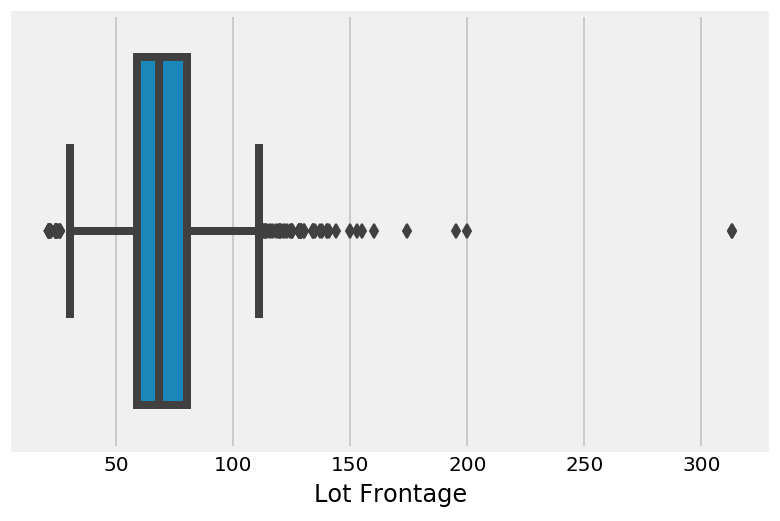

In [180]:
sns.boxplot(train["Lot Frontage"])


While there are outliers, it does not seem that the outliers are caused by erroneous data, so we will not drop them.

We will instead impute the NaN cells with the median

In [181]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values =np.nan, strategy = 'median')
imputer = imputer.fit(train[['Lot Frontage']])
train[['Lot Frontage']] = imputer.transform(train[['Lot Frontage']])

In [182]:
train["Lot Frontage"].isnull().sum()

0

In [183]:
train["Lot Frontage"].describe()

count    1987.000000
mean       69.103674
std        21.441372
min        21.000000
25%        60.000000
50%        68.000000
75%        79.000000
max       313.000000
Name: Lot Frontage, dtype: float64

## Encoding non-numeric features to numeric

Now we want to start working on changing each column to the correct dtype, and set up our ordinal and nominal features correctly.

But first, we probably should clean up the column names to make things more sane when we start using get_dummies() later

In [184]:
train.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',


In [185]:
train.columns = train.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')

In [186]:
train.head()

pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
Id                                                                     
109  533352170           60        RL          68.0     13517   Pave   
544  531379050           60        RL          43.0     11492   Pave   
153  535304180           20        RL          68.0      7922   Pave   
318  916386060           60        RL          73.0      9802   Pave   
255  906425045           50        RL          82.0     14235   Pave   

    lot_shape land_contour utilities lot_config land_slope neighborhood  \
Id                                                                        
109       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
544       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
153       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
318       Reg          Lvl    AllPub     Inside        Gtl       Timber   
255       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

    condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
Id                                                                              
109        RRAe        Norm      1Fam      2Story             6             8   
544        Norm        Norm      1Fam      2Story             7             5   
153        Norm        Norm      1Fam      1Story             5             7   
318        Norm        Norm      1Fam      2Story             5             5   
255        Norm        Norm      1Fam      1.5Fin             6             8   

     year_built  year_remod_add roof_style roof_matl exterior_1st  \
Id                                                                  
109        1976            2005      Gable   CompShg      HdBoard   
544        1996            1997      Gable   CompShg      VinylSd   
153        1953            2007      Gable   CompShg      VinylSd   
318        2006            2007      Gable   CompShg      VinylSd   
255        1900            1993      Gable   CompShg      Wd Sdng   

    exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
Id                                                                             
109      Plywood      BrkFace         289.0         Gd         TA     CBlock   
544      VinylSd      BrkFace         132.0         Gd         TA      PConc   
153      VinylSd         None           0.0         TA         Gd     CBlock   
318      VinylSd         None           0.0         TA         TA      PConc   
255      Plywood         None           0.0         TA         TA      PConc   

     bsmt_qual  bsmt_cond  bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
Id                                                                      
109          3          3              1            GLQ         533.0   
544          4          3              1            GLQ         637.0   
153          3          3              1            GLQ         731.0   
318          4          3              1            Unf           0.0   
255          2          4              1            Unf           0.0   

    bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
Id                                                                     
109            Unf           0.0        192.0          725.0    GasA   
544            Unf           0.0        276.0          913.0    GasA   
153            Unf           0.0        326.0         1057.0    GasA   
318            Unf           0.0        384.0          384.0    GasA   
255            Unf           0.0        676.0          676.0    GasA   

    heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
Id                                                              
109         Ex           Y      SBrkr         725         754   
544         Ex           Y      SBrkr         913        1209   
153         TA           Y      SBrkr        1057           0   
318         Gd           

In [187]:
train.shape

(1987, 68)

So excluding the "saleprice" feature, we actually started off with 67 features - i.e. before get_dummies() are run.

### Using heatmaps to identify which numeric features we can drop first

Let's do some preliminary heatmap on the existing numerical features so that we can discard some features that really have no impact on price.

Text(0.5, 1, 'Correlation between existing numeric features and price')

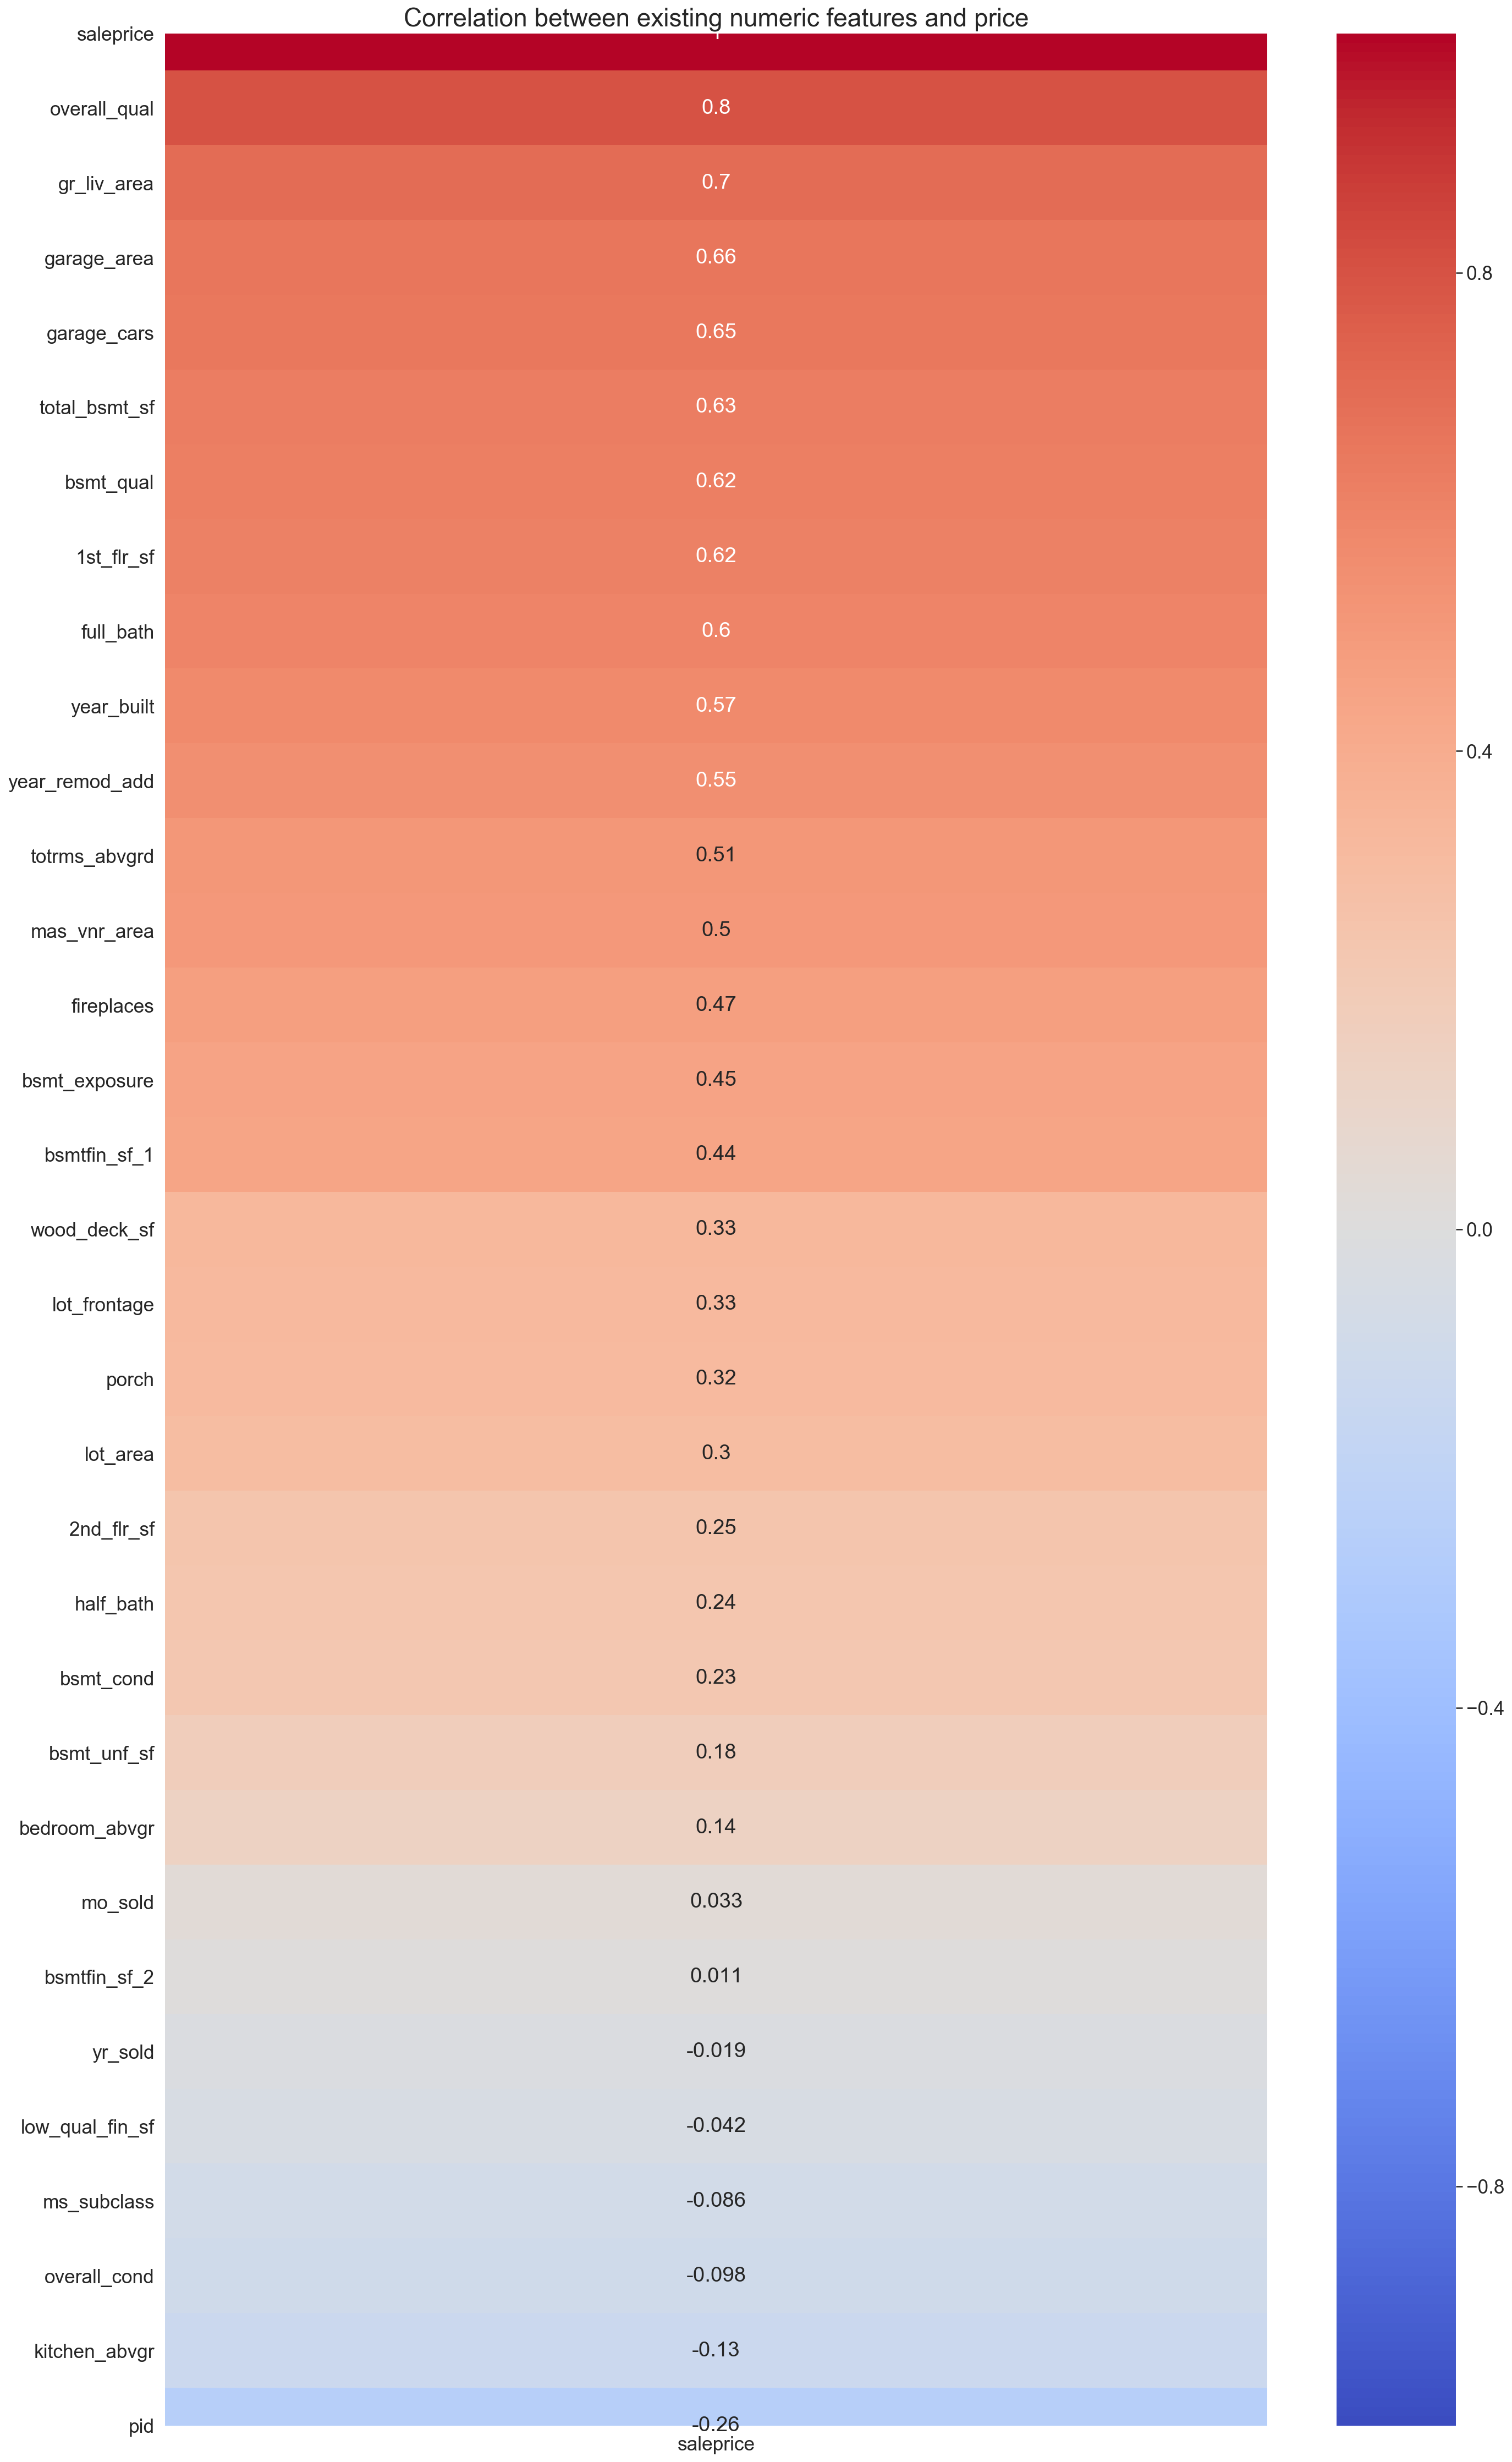

In [188]:
train_corr = train.corr()

plt.figure(figsize=(20,40))
sns.set(font_scale=1.6)
sns.heatmap(train_corr[['saleprice']].sort_values(by=['saleprice'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.title("Correlation between existing numeric features and price", fontsize='large')


We'll want to apply masking to drop existing numerical features with less than 0.3 correlation scores. But first, looking at the heatmap has also given us additional ideas in terms of dropping or merging other features.

**Floor Area**

* total_bsmt_sf (0.63)
* 1st_flr_sf (0.62)
* 2nd_flr_sf (0.25)
*we are ignoring the features that pertain to basement floor quality

It seems like whether there's a second floor or not does not have a very good bearing on price, but we might end up with a feature that has better correlation scores if we were to have a feature on total floor area.


**Bathrooms**

* full_bath (0.6)
* half_bath (0.24)

Since full_bath does have a moderate correlation score, we can try to create another feature on total number of baths to see if that gives us a stronger correlation score

We will run the heatmap again.

In [189]:
# calculating total sf area
train["total_sf"] = train["total_bsmt_sf"] + train["1st_flr_sf"] + train["2nd_flr_sf"]

#calculating overall number of bathrooms
train["total_baths"] = train["full_bath"] + train["half_bath"] 

Text(0.5, 1, 'Correlation between numeric features and price')

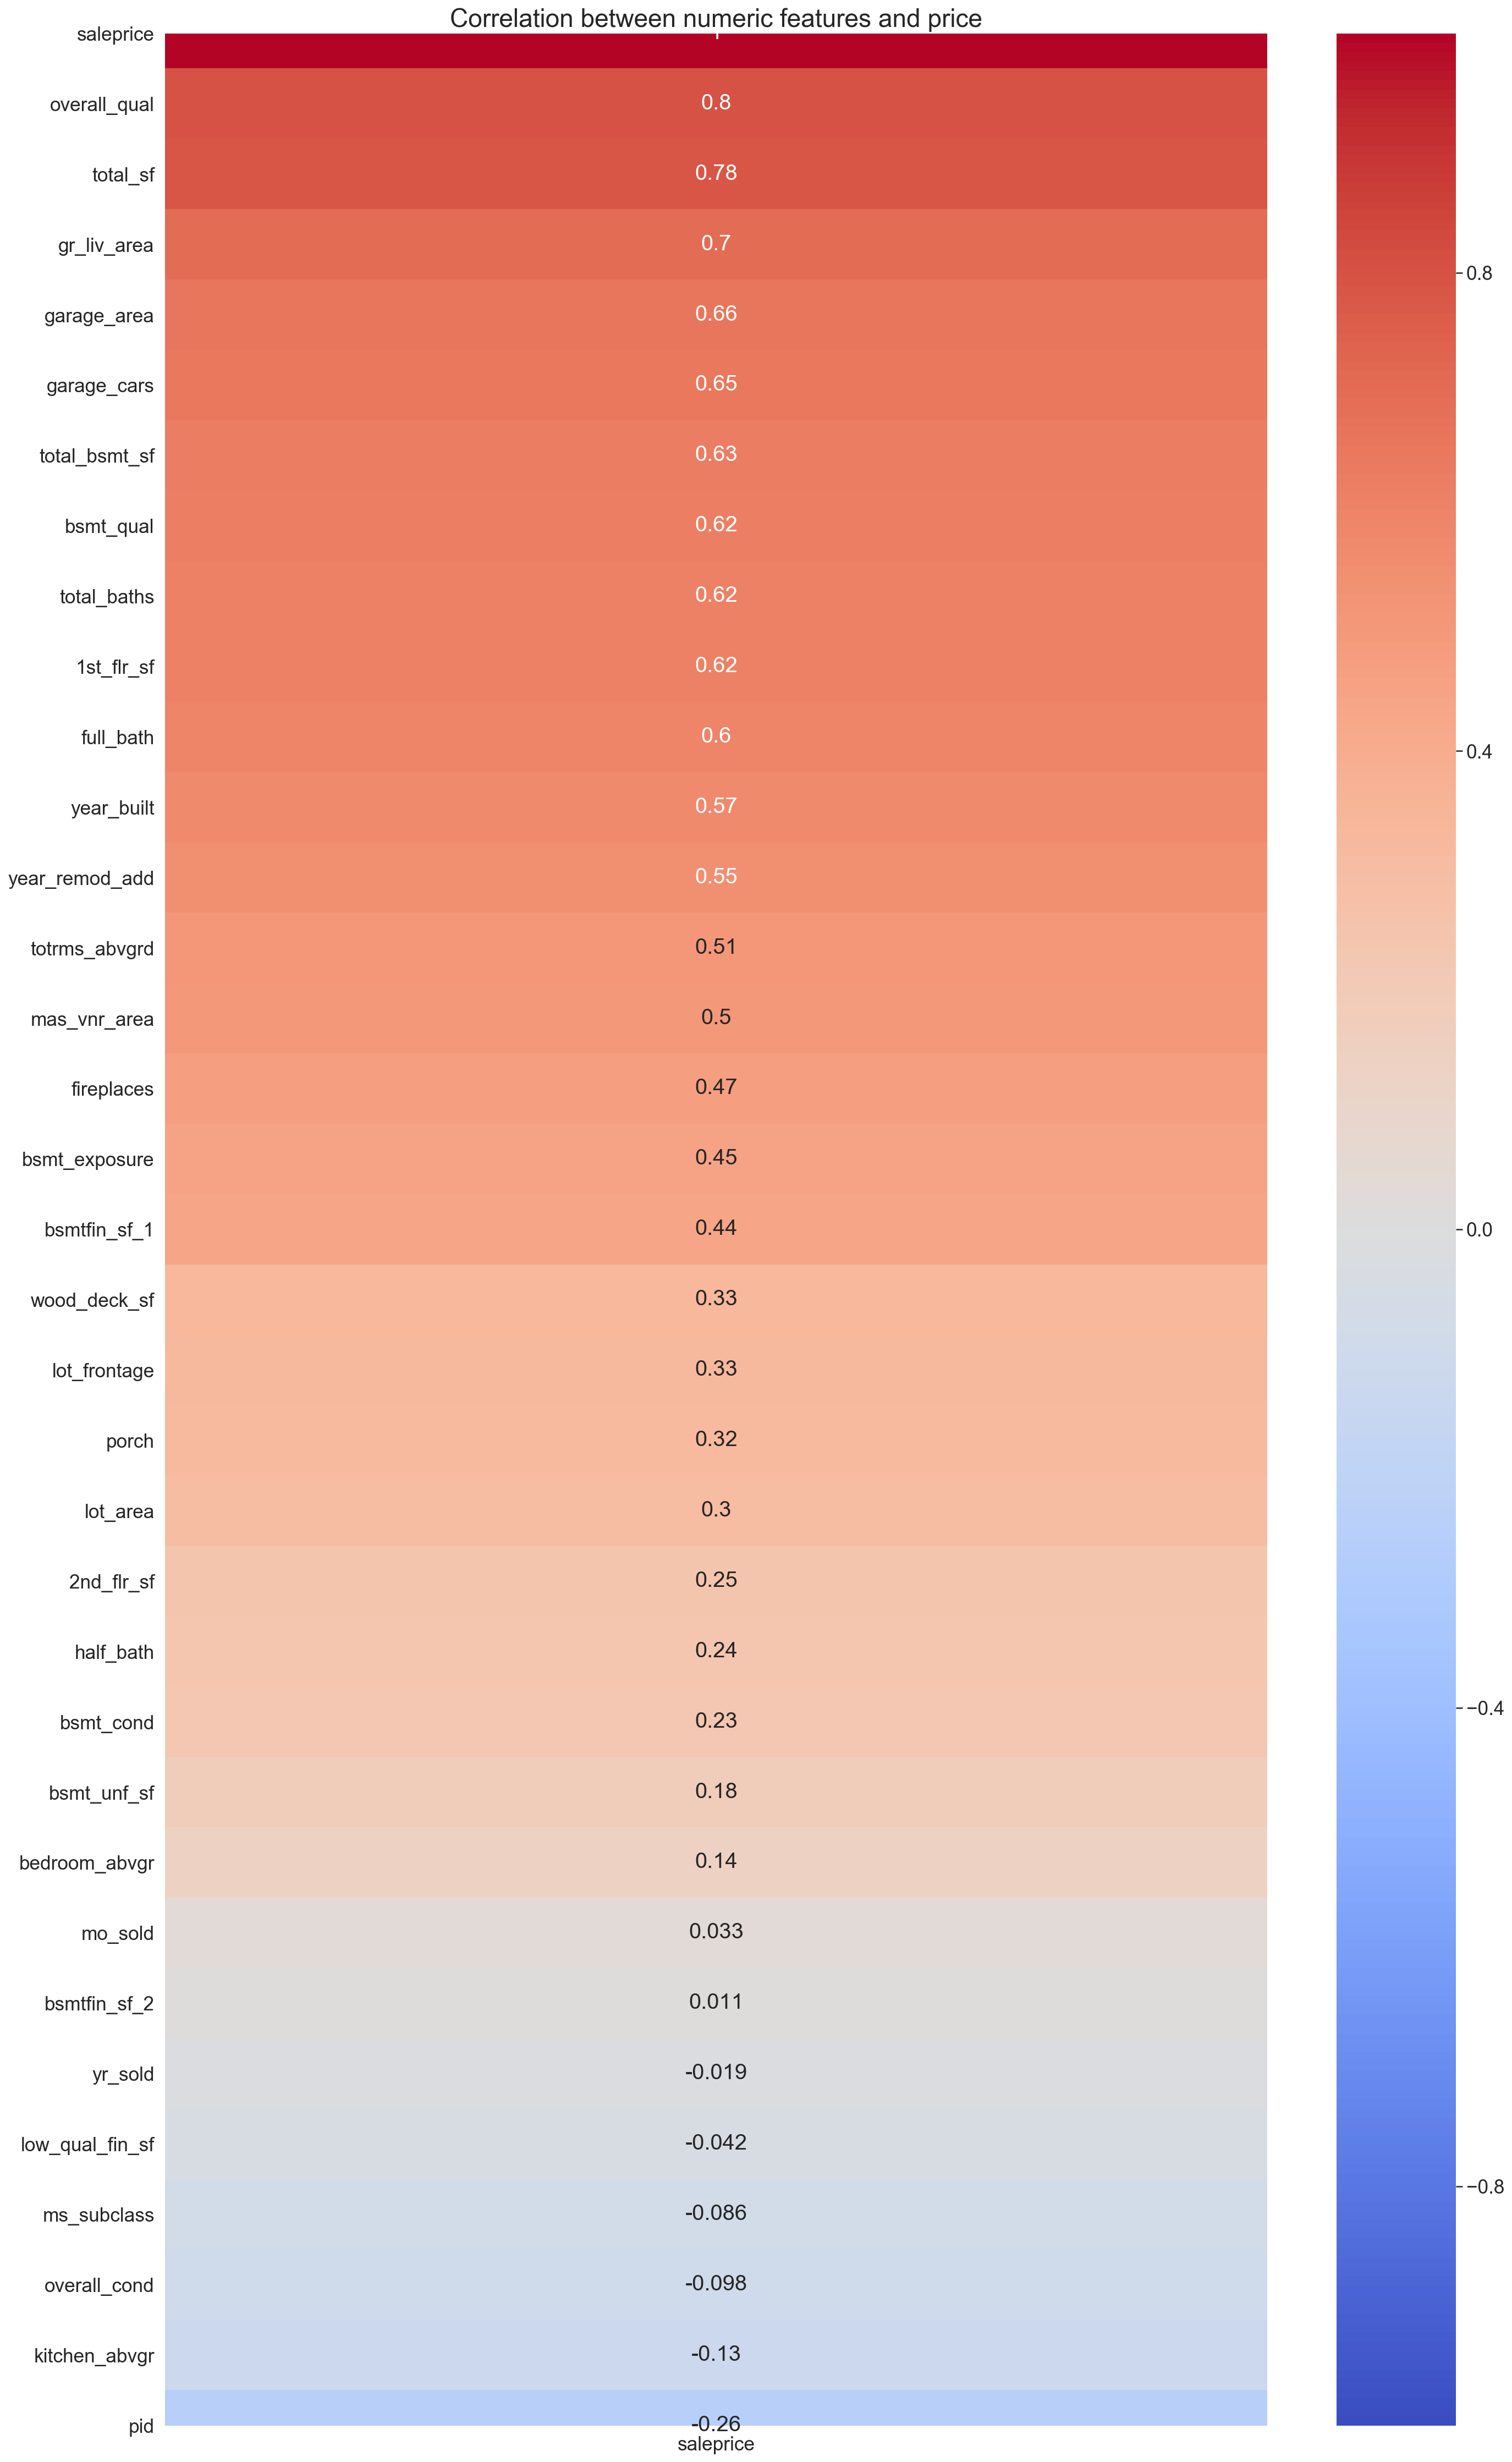

In [190]:
train_corr = train.corr()

plt.figure(figsize=(20,40))
sns.heatmap(train_corr[['saleprice']].sort_values(by=['saleprice'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            annot_kws={"size": 20})
plt.title("Correlation between numeric features and price", fontsize='large')

So far we can see that most numerical features have a postive correlation, whereas the ones with negative correlations tend to be very weak. The most extreme negative correlation score is -0.25 for pid, which is actually not useful at all since we also have "id". 

The question is, where do set the bar? Since we haven't really changed most of the categorical features into numerical ones, we can be a bit more conservative at this stage. I would go with setting the bar at 0.3, i.e. to drop all features with correlation score of 0.3 or less.

In [191]:
# we are using b30_train_corr to pick out only the features with correlaton scores less than 0.3.
# ultimately, we want to retain only the features that have more than 0.3 for correlation 

corr_ind = train_corr.index


b30_train_corr = pd.DataFrame(train_corr["saleprice"])
b30_train_corr.set_index(corr_ind, inplace = True) 

b30_train_corr = b30_train_corr[np.abs(b30_train_corr["saleprice"]) <= 0.3]

b30_train_corr.sort_values(by="saleprice")


saleprice
pid              -0.255115
kitchen_abvgr    -0.132083
overall_cond     -0.098111
ms_subclass      -0.085830
low_qual_fin_sf  -0.042499
yr_sold          -0.018537
bsmtfin_sf_2      0.011213
mo_sold           0.033015
bedroom_abvgr     0.139216
bsmt_unf_sf       0.179411
bsmt_cond         0.232737
half_bath         0.239896
2nd_flr_sf        0.249121
lot_area          0.298476

In [192]:
# retrieving the list of features with absolute correlation scores below 0.3 to drop


b30_drop = [ i for i in b30_train_corr.index]

print(len(b30_drop))
b30_drop

14


['pid',
 'ms_subclass',
 'lot_area',
 'overall_cond',
 'bsmt_cond',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'mo_sold',
 'yr_sold']

In [193]:
# we are using g30_train_corr to keep only the scores with more than 0.3 for correlation score
corr_ind = train_corr.index


g30_train_corr = pd.DataFrame(train_corr["saleprice"])
g30_train_corr.set_index(corr_ind, inplace = True) 

g30_train_corr = g30_train_corr[np.abs(g30_train_corr["saleprice"]) > 0.3]


g30_train_corr.sort_values(by="saleprice", ascending=False)

saleprice
saleprice        1.000000
overall_qual     0.801372
total_sf         0.784363
gr_liv_area      0.697486
garage_area      0.657330
garage_cars      0.653673
total_bsmt_sf    0.630113
bsmt_qual        0.618709
total_baths      0.616769
1st_flr_sf       0.616498
full_bath        0.599966
year_built       0.571661
year_remod_add   0.549008
totrms_abvgrd    0.508493
mas_vnr_area     0.501861
fireplaces       0.470368
bsmt_exposure    0.447667
bsmtfin_sf_1     0.441486
wood_deck_sf     0.329402
lot_frontage     0.326062
porch            0.316695

In [194]:
# time to drop them

train.drop(b30_drop, axis = 1, inplace=True) 
print(train.shape)
train.columns

(1987, 56)


Index(['ms_zoning', 'lot_frontage', 'street', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual', 'year_built',
       'year_remod_add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       'gr_liv_area', 'full_bath', 'kitchen_qual', 'totrms_abvgrd',
       'functional', 'fireplaces', 'fireplace_qu', 'garage_type',
       'garage_finish', 'garage_cars', 'garage_area', 'garage_qual',
       'garage_cond', 'paved_drive', 'wood_deck_sf', 'sale_type', 'saleprice',
       'porch', 'total_sf', 'total_baths'],
      dtype='object')

### Linear regression with existing numeric features



Let's just try doing a linear regression with our existing numerical features

In [195]:
num_train = train.select_dtypes([np.number])

print(num_train.shape)
num_train.head()

(1987, 21)


lot_frontage  overall_qual  year_built  year_remod_add  mas_vnr_area  \
Id                                                                          
109          68.0             6        1976            2005         289.0   
544          43.0             7        1996            1997         132.0   
153          68.0             5        1953            2007           0.0   
318          73.0             5        2006            2007           0.0   
255          82.0             6        1900            1993           0.0   

     bsmt_qual  bsmt_exposure  bsmtfin_sf_1  total_bsmt_sf  1st_flr_sf  \
Id                                                                       
109          3              1         533.0          725.0         725   
544          4              1         637.0          913.0         913   
153          3              1         731.0         1057.0        1057   
318          4              1           0.0          384.0         744   
255          2              1           0.0          676.0         831   

     gr_liv_area  full_bath  totrms_abvgrd  fireplaces  garage_cars  \
Id                                                                    
109         1479        2.0              6           0          2.0   
544         2122        3.0              8           1          2.0   
153         1057        2.0              5           0          1.0   
318         1444        2.0              7           0          2.0   
255         1445        2.0              6           0          2.0   

     garage_area  wood_deck_sf  saleprice  porch  total_sf  total_baths  
Id                                                                       
109        475.0             0     130500      1    2204.0          3.0  
544        559.0             0     220000      1    3035.0          4.0  
153        246.0             0     109000      1    2114.0          2.0  
318        400.0           100     174000      0    1828.0          3.0  
255        484.0             0     138500      1    2121.0          2.0

In [196]:
X = num_train
y = num_train["saleprice"]
X.drop(["saleprice"], axis = 1, inplace=True) 
print("X shape is:", X.shape)
print("y shape is:", y.shape)

X shape is: (1987, 20)
y shape is: (1987,)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [197]:
X.head()

lot_frontage  overall_qual  year_built  year_remod_add  mas_vnr_area  \
Id                                                                          
109          68.0             6        1976            2005         289.0   
544          43.0             7        1996            1997         132.0   
153          68.0             5        1953            2007           0.0   
318          73.0             5        2006            2007           0.0   
255          82.0             6        1900            1993           0.0   

     bsmt_qual  bsmt_exposure  bsmtfin_sf_1  total_bsmt_sf  1st_flr_sf  \
Id                                                                       
109          3              1         533.0          725.0         725   
544          4              1         637.0          913.0         913   
153          3              1         731.0         1057.0        1057   
318          4              1           0.0          384.0         744   
255          2              1           0.0          676.0         831   

     gr_liv_area  full_bath  totrms_abvgrd  fireplaces  garage_cars  \
Id                                                                    
109         1479        2.0              6           0          2.0   
544         2122        3.0              8           1          2.0   
153         1057        2.0              5           0          1.0   
318         1444        2.0              7           0          2.0   
255         1445        2.0              6           0          2.0   

     garage_area  wood_deck_sf  porch  total_sf  total_baths  
Id                                                            
109        475.0             0      1    2204.0          3.0  
544        559.0             0      1    3035.0          4.0  
153        246.0             0      1    2114.0          2.0  
318        400.0           100      0    1828.0          3.0  
255        484.0             0      1    2121.0          2.0

In [198]:
y.head()

Id
109    130500
544    220000
153    109000
318    174000
255    138500
Name: saleprice, dtype: int64

In [199]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_val_sc = ss.transform(X_val)

In [200]:
lr = LinearRegression()

lr.fit(X_train_sc, y_train)
Xtr_score = lr.score(X_train_sc, y_train)
print("X_train score is:", Xtr_score)
Xtr_pred = lr.predict(X_train_sc)
Xtr_rmse = np.sqrt(metrics.mean_squared_error(y_train, Xtr_pred))

Xval_score = lr.score(X_val_sc, y_val)
print("X_val score is:", Xval_score)
Xval_pred = lr.predict(X_val_sc)
Xval_rmse = np.sqrt(metrics.mean_squared_error(y_val, Xval_pred))

X_sc = ss.transform(X)
train_score = lr.score(X_sc, y)
X_pred = lr.predict(X_sc)
X_rmse = np.sqrt(metrics.mean_squared_error(y, X_pred))

print("Overall train score is:", train_score)
print()

print("X_train RMSE is:",Xtr_rmse)
print("X_val RMSE is:", Xval_rmse)

if Xval_rmse < Xtr_rmse:
    print("RMSE score improved (is lower) for X_val")
else:
    print("RMSE score worsened (is higher) for X_val")

print("Overal RMSE is:", X_rmse)

X_train score is: 0.8102699129156423
X_val score is: 0.843979389874367
Overall train score is: 0.8185194387049325

X_train RMSE is: 34855.2411678083
X_val RMSE is: 31145.735534670534
RMSE score improved (is lower) for X_val
Overal RMSE is: 33965.413055746176


In [201]:
# # original code from project 2 submission

# lr = LinearRegression()

# lr.fit(X_train_sc, y_train)
# Xtr_score = lr.score(X_train_sc, y_train)
# Xtst_score = lr.score(X_test_sc, y_test)

# train_score = lr.score(ss.fit_transform(X), y)

# print("X_train score is:", Xtr_score)
# print("X_test score is:", Xtst_score)
# print("Overall train score is:", train_score)


#### Question to Ziliang re: fit_transform

I just realised that I'd previously coded it as

````
train_score = lr.score(ss.fit_transform(X), y)
````

Should I actually be using the StandardScaler that I'd fit_transform on X_train, y_train to transform the overall X? Scores turned out fairly similar though:
````
X_train score is: 0.8102699129156423

X_test score is: 0.843979389874367

Overall train score is: 0.8186174721599232
````

### Mapping ordinal variables, using get_dummies() on nominal variables

We will try saving our list of features intended for get_dummies() in a list first, so we can try one more correlation with just numerical features (incl. mapped ordinal features). We will call this list of nominal features "drop_list" since they should be dropped eventually.

We'll go through the non-numeric features in batches of 10 again just to make sure we're mapping/using get_dummies() correctly

In [202]:
# this is the number of rows and columns we're starting off with
train.shape

(1987, 56)

In [203]:
# passing our most updated set of non-numeric columns into train_obj 

train_obj = train.select_dtypes(include=['object'])
train_obj.shape

(1987, 35)

#### non-numeric columns 0 to 10

In [204]:
for x in range(0,10):
    print ("---- {} ---".format(train_obj.columns[x]))
    print("Null count:",train_obj.iloc[:,x].isnull().sum())
    print(train_obj.iloc[:,x].value_counts(dropna=False).sort_index(ascending=True))
    print()


---- ms_zoning ---
Null count: 0
A (agr)       2
C (all)      18
FV          101
I (all)       1
RH           11
RL         1553
RM          301
Name: ms_zoning, dtype: int64

---- street ---
Null count: 0
Grvl       6
Pave    1981
Name: street, dtype: int64

---- lot_shape ---
Null count: 0
IR1     669
IR2      54
IR3       9
Reg    1255
Name: lot_shape, dtype: int64

---- land_contour ---
Null count: 0
Bnk      74
HLS      83
Low      40
Lvl    1790
Name: land_contour, dtype: int64

---- utilities ---
Null count: 0
AllPub    1985
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

---- lot_config ---
Null count: 0
Corner      338
CulDSac     124
FR2          60
FR3           9
Inside     1456
Name: lot_config, dtype: int64

---- land_slope ---
Null count: 0
Gtl    1895
Mod      82
Sev      10
Name: land_slope, dtype: int64

---- neighborhood ---
Null count: 0
Blmngtn     22
Blueste      6
BrDale      19
BrkSide     72
ClearCr     26
CollgCr    178
Crawfor     70
Edwards    1

lot_shape should be ordinal since regularity is generally preferred.
* Reg Regular
* IR1 Slightly irregular
* IR2 Moderately Irregular
* IR3 Irregular

utilities should also be ordinal
* AllPub All public Utilities (E,G,W,& S)
* NoSewr Electricity, Gas, and Water (Septic Tank)
* NoSeWa Electricity and Gas Only
* ELO Electricity only

land_slope should be ordinal too

* Gtl Gentle slope
* Mod Moderate Slope
* Sev Severe Slope

we need to get_dummies() for these
* ms_zoning
* street
* land_contour
* lot_config
* neighborhood
* condition_1
* condition_2

However, condition_2 also seems to be quite skewed so we need to check that later.

In [205]:
lots_mapper = {"IR3": 0, "IR2": 1, "IR1": 2, "Reg":3}
util_mapper = {"ELO": 0, "NoSeWa": 1, "NoSewr": 2, "AllPub":3} #although our training set does not have any rows with "ELO" we still want to include that in our ordinal mapping in case the test set uses it
slope_mapper = {"Sev": 0, "Mod": 1, "Gtl": 2}

train["lot_shape"] = train["lot_shape"].replace(lots_mapper)
train["utilities"] = train["utilities"].replace(util_mapper)
train["land_slope"] = train["land_slope"].replace(slope_mapper)


In [206]:
# checking that mapping was successful
display(train["lot_shape"].value_counts())
display(train["utilities"].value_counts())
display(train["land_slope"].value_counts())

3    1255
2     669
1      54
0       9
Name: lot_shape, dtype: int64

3    1985
2       1
1       1
Name: utilities, dtype: int64

2    1895
1      82
0      10
Name: land_slope, dtype: int64

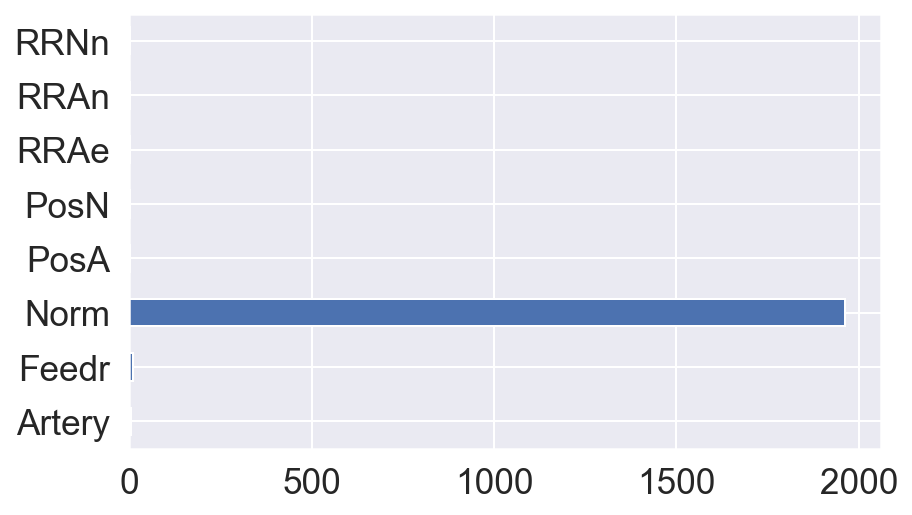

In [207]:
(train['condition_2'].value_counts().sort_index()).plot(kind='barh')


In [208]:
# we're going to drop condition_2 because it will skew our data too much

print(train.shape)
train.drop(['condition_2'], axis=1, inplace=True)
print(train.shape)

(1987, 56)
(1987, 55)


In [209]:
drop_list = []
drop_list.extend(["ms_zoning","street", "land_contour", "lot_config", "neighborhood", "condition_1"])


#### non-numeric columns 10 to 20

In [210]:
for x in range(10,20):
    print ("---- {} ---".format(train_obj.columns[x]))
    print("Null count:",train_obj.iloc[:,x].isnull().sum())
    print(train_obj.iloc[:,x].value_counts(dropna=False).sort_index(ascending=True))
    print()


---- bldg_type ---
Null count: 0
1Fam      1662
2fmCon      42
Duplex      64
Twnhs       65
TwnhsE     154
Name: bldg_type, dtype: int64

---- house_style ---
Null count: 0
1.5Fin     210
1.5Unf      11
1Story    1031
2.5Fin       6
2.5Unf      14
2Story     595
SFoyer      32
SLvl        88
Name: house_style, dtype: int64

---- roof_style ---
Null count: 0
Flat         10
Gable      1564
Gambrel      12
Hip         391
Mansard       7
Shed          3
Name: roof_style, dtype: int64

---- roof_matl ---
Null count: 0
ClyTile       1
CompShg    1964
Membran       1
Tar&Grv      12
WdShake       4
WdShngl       5
Name: roof_matl, dtype: int64

---- exterior_1st ---
Null count: 0
AsbShng     33
AsphShn      1
BrkComm      3
BrkFace     61
CBlock       2
CemntBd     88
HdBoard    292
ImStucc      1
MetalSd    320
Plywood    137
Stone        2
Stucco      27
VinylSd    716
Wd Sdng    261
WdShing     43
Name: exterior_1st, dtype: int64

---- exterior_2nd ---
Null count: 0
AsbShng     28
AsphS

roof_matl also seems really skewed so let's look at that again.




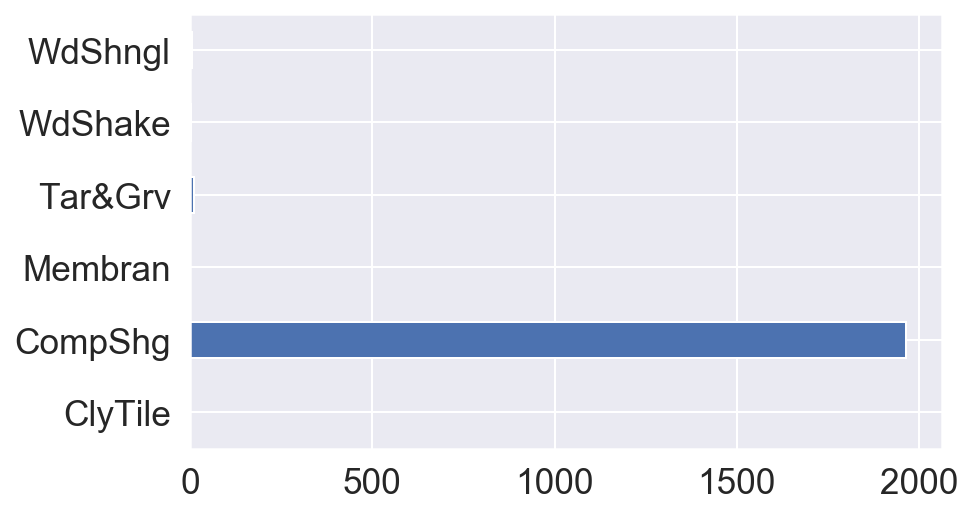

In [211]:
(train['roof_matl'].value_counts().sort_index()).plot(kind='barh')


In [212]:
# we're going to drop that because it will skew our data too much

train.drop(['roof_matl'], axis=1, inplace=True)



We need get_dummies() for these features
* bldg_type
* house_style
* roof_style
* exterior_1st
* exterior_2nd
* mas_vnr_type
* foundation

We need to map these 
* exter_qual
* exter_cond


In [213]:
drop_list.extend(["bldg_type", "house_style", "roof_style", "exterior_1st", "exterior_2nd", "mas_vnr_type", "foundation"])


In [214]:
train["exter_qual"] = train["exter_qual"].replace(bqual_mapper)
train["exter_cond"] = train["exter_cond"].replace(bqual_mapper)

In [215]:
print(train.exter_qual.value_counts())
print(train.exter_cond.value_counts())

3    1192
4     688
5      81
2      26
Name: exter_qual, dtype: int64
3    1722
4     207
2      49
5       7
1       2
Name: exter_cond, dtype: int64


#### non-numeric columns 20 to 30

In [216]:
for x in range(20,30):
    print ("---- {} ---".format(train_obj.columns[x]))
    print("Null count:",train_obj.iloc[:,x].isnull().sum())
    print(train_obj.iloc[:,x].value_counts(dropna=False).sort_index(ascending=True))
    print()

---- bsmtfin_type_1 ---
Null count: 0
ALQ     281
BLQ     195
GLQ     586
LwQ      94
None     54
Rec     174
Unf     603
Name: bsmtfin_type_1, dtype: int64

---- bsmtfin_type_2 ---
Null count: 0
ALQ       34
BLQ       47
GLQ       23
LwQ       60
None      54
Rec       79
Unf     1690
Name: bsmtfin_type_2, dtype: int64

---- heating ---
Null count: 0
GasA    1954
GasW      20
Grav       5
OthW       2
Wall       6
Name: heating, dtype: int64

---- heating_qc ---
Null count: 0
Ex    1053
Fa      67
Gd     306
Po       3
TA     558
Name: heating_qc, dtype: int64

---- central_air ---
Null count: 0
N     136
Y    1851
Name: central_air, dtype: int64

---- electrical ---
Null count: 0
FuseA     138
FuseF      32
FuseP       6
Mix         1
SBrkr    1810
Name: electrical, dtype: int64

---- kitchen_qual ---
Null count: 0
Ex     150
Fa      46
Gd     791
TA    1000
Name: kitchen_qual, dtype: int64

---- functional ---
Null count: 0
Maj1      12
Maj2       7
Min1      39
Min2      41
Mod    

bsmtfin_type_1 is ordinal, so we need to map that. bsmtfin_type_2 has the same categories so we can use the same mapper.

* GLQ Good Living Quarters
* ALQ Average Living Quarters
* BLQ Below Average Living Quarters
* Rec Average Rec Room
* LwQ Low Quality
* Unf Unfinshed
* NA No Basement (this is None)

We need to map these using the bqual_mapper:
* heating_qc
* kitchen_qual
* fireplace_qu

We need get_dummies() for these features
* heating
* electrical
* garage_type

central_air is a boolean feature, so we need to make that into numerical.


functional is ordinal and needs to be mapped

* Typ Typical Functionality
* Min1 Minor Deductions 1
* Min2 Minor Deductions 2
* Mod Moderate Deductions
* Maj1 Major Deductions 1
* Maj2 Major Deductions 2
* Sev Severely Damaged
* Sal Salvage only


In [217]:
bfin_mapper = {"None": 0, "Unf": 1, "LwQ": 2, "Rec":3, "BLQ": 4, "ALQ": 5, "GLQ":6}

train["bsmtfin_type_1"] = train["bsmtfin_type_1"].replace(bfin_mapper)
train["bsmtfin_type_2"] = train["bsmtfin_type_2"].replace(bfin_mapper)


In [218]:
print(train.bsmtfin_type_1.value_counts().sort_index())
print(train.bsmtfin_type_2.value_counts().sort_index())

0     54
1    603
2     94
3    174
4    195
5    281
6    586
Name: bsmtfin_type_1, dtype: int64
0      54
1    1690
2      60
3      79
4      47
5      34
6      23
Name: bsmtfin_type_2, dtype: int64


In [219]:
train["heating_qc"] = train["heating_qc"].replace(bqual_mapper)
train["kitchen_qual"] = train["kitchen_qual"].replace(bqual_mapper)
train["fireplace_qu"] = train["fireplace_qu"].replace(bqual_mapper)

In [220]:
display(train.heating_qc.value_counts().sort_index())
display(train.kitchen_qual.value_counts().sort_index())
display(train.fireplace_qu.value_counts().sort_index())

1       3
2      67
3     558
4     306
5    1053
Name: heating_qc, dtype: int64

2      46
3    1000
4     791
5     150
Name: kitchen_qual, dtype: int64

0    959
1     29
2     55
3    394
4    519
5     31
Name: fireplace_qu, dtype: int64

In [221]:
drop_list.extend(["heating", "electrical", "garage_type"])

In [222]:
train["central_air"] = [1 if val == "Y" else 0 for val in train["central_air"]]
train["central_air"].value_counts()

1    1851
0     136
Name: central_air, dtype: int64

In [223]:
func_mapper = {"Sal": 0, "Sev": 1, "Maj2": 2, "Maj1":3, "Mod":4, "Min2": 5, "Min1":6, "Typ":7 }


train["functional"] = train["functional"].replace(func_mapper)

train["functional"].value_counts(dropna=False).sort_index()

0       2
1       2
2       7
3      12
4      28
5      41
6      39
7    1856
Name: functional, dtype: int64

#### non-numeric columns 30 to 35

In [224]:
for x in range(30, train_obj.shape[1]):
    print ("---- {} ---".format(train_obj.columns[x]))
    print("Null count:",train_obj.iloc[:,x].isnull().sum())
    print(train_obj.iloc[:,x].value_counts(dropna=False).sort_index(ascending=True))
    print()

---- garage_finish ---
Null count: 0
Fin     492
None    106
RFn     572
Unf     817
Name: garage_finish, dtype: int64

---- garage_qual ---
Null count: 0
Ex         3
Fa        79
Gd        17
None     106
Po         2
TA      1780
Name: garage_qual, dtype: int64

---- garage_cond ---
Null count: 0
Ex         2
Fa        46
Gd        11
None     106
Po         8
TA      1814
Name: garage_cond, dtype: int64

---- paved_drive ---
Null count: 0
N     148
P      39
Y    1800
Name: paved_drive, dtype: int64

---- sale_type ---
Null count: 0
COD        60
CWD        10
Con         4
ConLD      17
ConLI       7
ConLw       4
New       158
Oth         3
WD       1724
Name: sale_type, dtype: int64



garage_finish, paved_drive are ordinal and need to be mapped.

garage_finish<br>
* Fin Finished
* RFn Rough Finished
* Unf Unfinished
* NA No Garage

paved_drive
* Y Paved
* P Partial Pavement
* N Dirt/Gravel

We can re-use bqual_mapper for these ordinal features
* garage_qual
* garage_cond 

sale_type is nominal and needs get_dummies()


In [225]:
garg_mapper = {"None": 0, "Unf": 1, "RFn": 2, "Fin":3}
pdrv_mapper = {"N": 0, "P": 1, "Y": 2}

train["garage_finish"] = train["garage_finish"].replace(garg_mapper)
train["paved_drive"] = train["paved_drive"].replace(pdrv_mapper)


In [226]:
display(train["garage_finish"].value_counts().sort_index())
display(train["paved_drive"].value_counts().sort_index())

0    106
1    817
2    572
3    492
Name: garage_finish, dtype: int64

0     148
1      39
2    1800
Name: paved_drive, dtype: int64

In [227]:
train["garage_qual"] = train["garage_qual"].replace(bqual_mapper)
train["garage_cond"] = train["garage_cond"].replace(bqual_mapper)


In [228]:
display(train["garage_qual"].value_counts())
display(train["garage_cond"].value_counts())

3    1780
0     106
2      79
4      17
5       3
1       2
Name: garage_qual, dtype: int64

3    1814
0     106
2      46
4      11
1       8
5       2
Name: garage_cond, dtype: int64

In [229]:
drop_list.extend(["sale_type"])

train.head()

ms_zoning  lot_frontage street  lot_shape land_contour  utilities  \
Id                                                                      
109        RL          68.0   Pave          2          Lvl          3   
544        RL          43.0   Pave          2          Lvl          3   
153        RL          68.0   Pave          3          Lvl          3   
318        RL          73.0   Pave          3          Lvl          3   
255        RL          82.0   Pave          2          Lvl          3   

    lot_config  land_slope neighborhood condition_1 bldg_type house_style  \
Id                                                                          
109    CulDSac           2       Sawyer        RRAe      1Fam      2Story   
544    CulDSac           2      SawyerW        Norm      1Fam      2Story   
153     Inside           2        NAmes        Norm      1Fam      1Story   
318     Inside           2       Timber        Norm      1Fam      2Story   
255     Inside           2      SawyerW        Norm      1Fam      1.5Fin   

     overall_qual  year_built  year_remod_add roof_style exterior_1st  \
Id                                                                      
109             6        1976            2005      Gable      HdBoard   
544             7        1996            1997      Gable      VinylSd   
153             5        1953            2007      Gable      VinylSd   
318             5        2006            2007      Gable      VinylSd   
255             6        1900            1993      Gable      Wd Sdng   

    exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  exter_cond  \
Id                                                                    
109      Plywood      BrkFace         289.0           4           3   
544      VinylSd      BrkFace         132.0           4           3   
153      VinylSd         None           0.0           3           4   
318      VinylSd         None           0.0           3           3   
255      Plywood         None           0.0           3           3   

    foundation  bsmt_qual  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  \
Id                                                                       
109     CBlock          3              1               6         533.0   
544      PConc          4              1               6         637.0   
153     CBlock          3              1               6         731.0   
318      PConc          4              1               1           0.0   
255      PConc          2              1               1           0.0   

     bsmtfin_type_2  total_bsmt_sf heating  heating_qc  central_air  \
Id                                                                    
109               1          725.0    GasA           5            1   
544               1          913.0    GasA           5            1   
153               1         1057.0    GasA           3            1   
318               1          384.0    GasA           4            1   
255               1          676.0    GasA           3            1   

    electrical  1st_flr_sf  gr_liv_area  full_bath  kitchen_qual  \
Id                                                                 
109      SBrkr         725         1479        2.0             4   
544      SBrkr         913         2122        3.0             4   
153      SBrkr        1057         1057        2.0             4   
318      SBrkr         744         1444        2.0             3   
255      SBrkr         831         1445        2.0             3   

     totrms_abvgrd  functional  fireplaces  fireplace_qu garage_type  \
Id                                                                     
109              6           7           0             0      Attchd   
544              8           7           1             3      Attchd   
153              5           7           0             0      Detchd   
318              7           7           0             0     BuiltIn   
255             

In [230]:
# now preparing to drop
drop_list

['ms_zoning',
 'street',
 'land_contour',
 'lot_config',
 'neighborhood',
 'condition_1',
 'bldg_type',
 'house_style',
 'roof_style',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'heating',
 'electrical',
 'garage_type',
 'sale_type']

In [231]:
len(drop_list)

17

In [232]:
# getting current train.shape
train.shape

(1987, 54)

In [233]:
num_train = train.select_dtypes([np.number])
num_train.shape

(1987, 37)

In [234]:
num_train.columns

Index(['lot_frontage', 'lot_shape', 'utilities', 'land_slope', 'overall_qual',
       'year_built', 'year_remod_add', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'bsmt_qual', 'bsmt_exposure', 'bsmtfin_type_1',
       'bsmtfin_sf_1', 'bsmtfin_type_2', 'total_bsmt_sf', 'heating_qc',
       'central_air', '1st_flr_sf', 'gr_liv_area', 'full_bath', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_finish', 'garage_cars', 'garage_area', 'garage_qual',
       'garage_cond', 'paved_drive', 'wood_deck_sf', 'saleprice', 'porch',
       'total_sf', 'total_baths'],
      dtype='object')

We have 37 numerical features (including ordinal features) before proceeding with get_dummies()


#### Heatmap of numeric (including ordinal) features

Text(0.5, 1, 'Correlation between existing numeric features and saleprice')

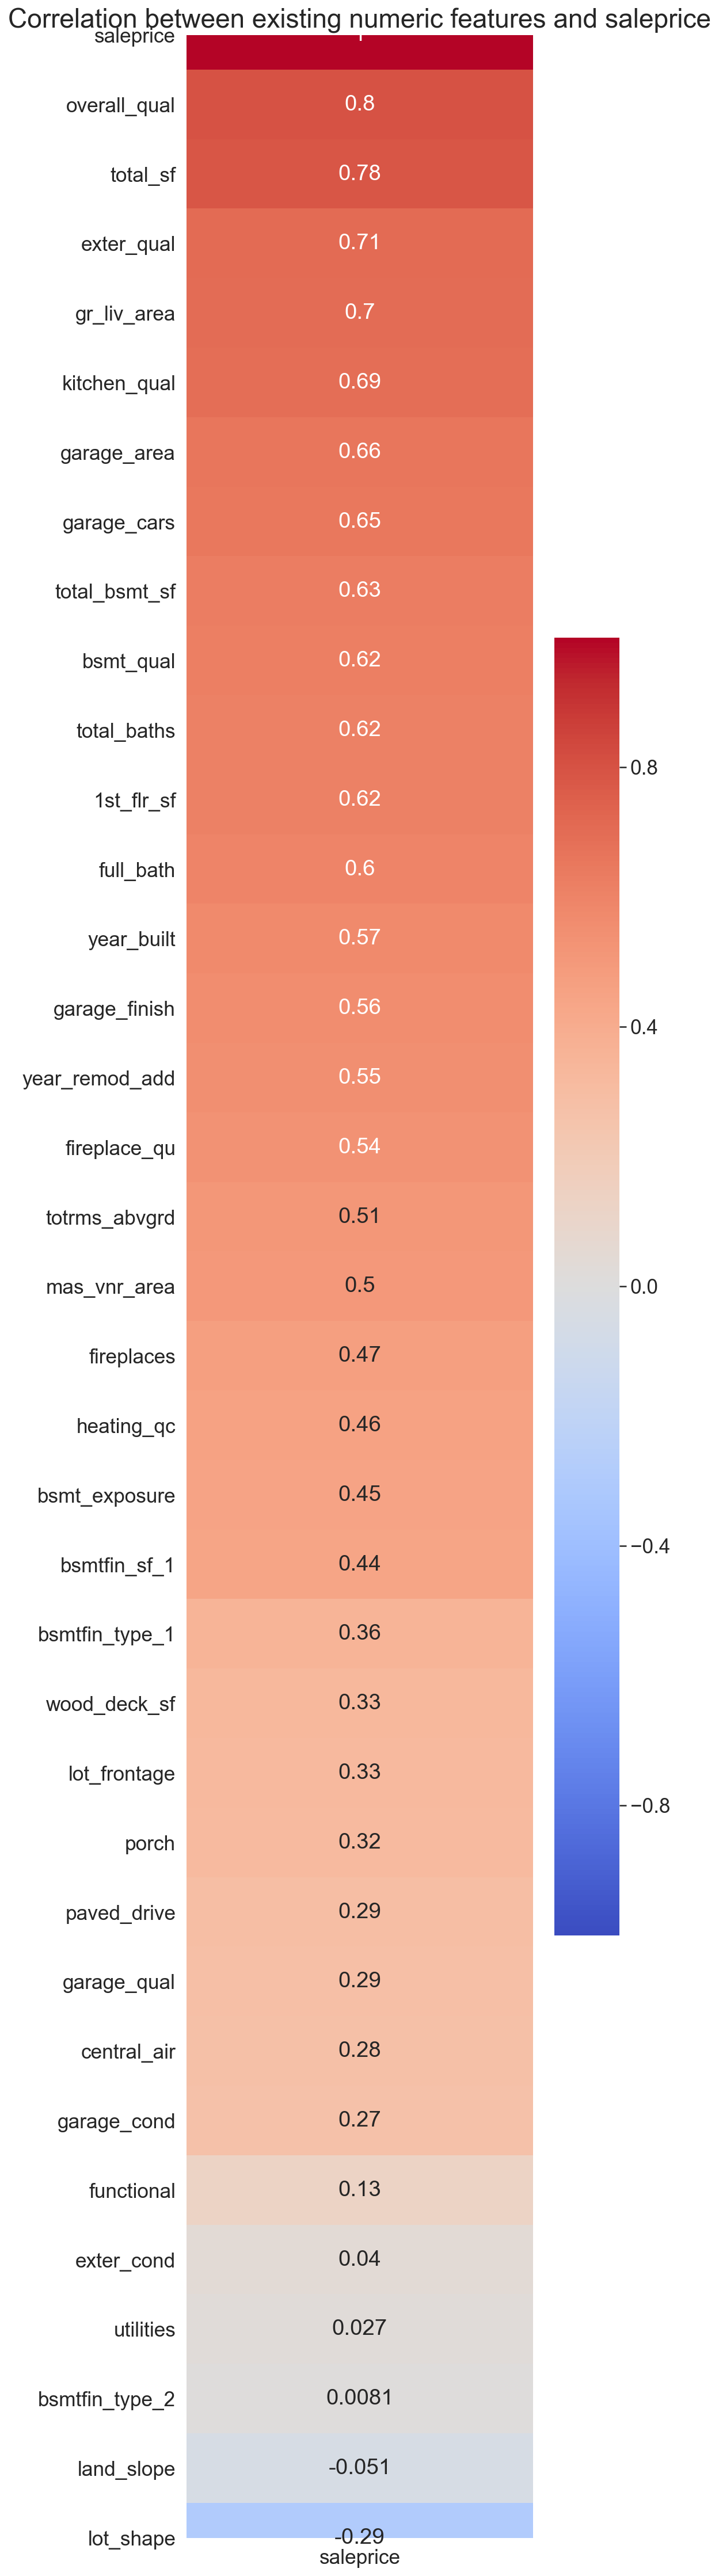

In [235]:
train_corr = num_train.corr()

plt.figure(figsize=(6,40))
# sns.set(font_scale=1.6)
sns.heatmap(train_corr[['saleprice']].sort_values(by=['saleprice'],ascending=False),
      vmin=-1,
      cmap='coolwarm',
      annot=True)
plt.title("Correlation between existing numeric features and saleprice", fontsize='large')

#### Linear regression on numeric (including ordinal) features


In [236]:
X = num_train.copy()
y = num_train["saleprice"]

X.drop(["saleprice"], axis = 1, inplace=True) 

print("X shape is:",X.shape)
print("y shape is:",y.shape)


X shape is: (1987, 36)
y shape is: (1987,)


In [237]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_val_sc = ss.transform(X_val)


In [238]:
lr = LinearRegression()

lr.fit(X_train_sc, y_train)
Xtr_score = lr.score(X_train_sc, y_train)
print("X_train score is:", Xtr_score)
Xtr_pred = lr.predict(X_train_sc)
Xtr_rmse = np.sqrt(metrics.mean_squared_error(y_train, Xtr_pred))

Xval_score = lr.score(X_val_sc, y_val)
print("X_val score is:", Xval_score)
Xval_pred = lr.predict(X_val_sc)
Xval_rmse = np.sqrt(metrics.mean_squared_error(y_val, Xval_pred))

X_sc = ss.transform(X)
train_score = lr.score(X_sc, y)
X_pred = lr.predict(X_sc)
X_rmse = np.sqrt(metrics.mean_squared_error(y, X_pred))

print("Overall train score is:", train_score)
print()

print("X_train RMSE is:",Xtr_rmse)
print("X_val RMSE is:", Xval_rmse)

if Xval_rmse < Xtr_rmse:
    print("RMSE score improved (is lower) for X_val")
else:
    print("RMSE score worsened (is higher) for X_val")

print("Overal RMSE is:", X_rmse)

X_train score is: 0.8307466909314838
X_val score is: 0.8567729323227044
Overall train score is: 0.8371162776589726

X_train RMSE is: 32920.66300985229
X_val RMSE is: 29841.466092362665
RMSE score improved (is lower) for X_val
Overal RMSE is: 32178.121437145775


The numerical features seem to work reasonably okay - X_val score was better than for X_train at least. Let's compare later with after get_dummies()

#### Running one-hot-encoding with get_dummies()

In [239]:
train.shape

(1987, 54)

In [240]:

dummies = pd.get_dummies(train[drop_list])

print(dummies.shape)
dummies.head()


(1987, 137)


ms_zoning_A (agr)  ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  \
Id                                                                           
109                  0                  0             0                  0   
544                  0                  0             0                  0   
153                  0                  0             0                  0   
318                  0                  0             0                  0   
255                  0                  0             0                  0   

     ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  street_Grvl  street_Pave  \
Id                                                                        
109             0             1             0            0            1   
544             0             1             0            0            1   
153             0             1             0            0            1   
318             0             1             0            0            1   
255             0             1             0            0            1   

     land_contour_Bnk  land_contour_HLS  land_contour_Low  land_contour_Lvl  \
Id                                                                            
109                 0                 0                 0                 1   
544                 0                 0                 0                 1   
153                 0                 0                 0                 1   
318                 0                 0                 0                 1   
255                 0                 0                 0                 1   

     lot_config_Corner  lot_config_CulDSac  lot_config_FR2  lot_config_FR3  \
Id                                                                           
109                  0                   1               0               0   
544                  0                   1               0               0   
153                  0                   0               0               0   
318                  0                   0               0               0   
255                  0                   0               0               0   

     lot_config_Inside  neighborhood_Blmngtn  neighborhood_Blueste  \
Id                                                                   
109                  0                     0                     0   
544                  0                     0                     0   
153                  1                     0                     0   
318                  1                     0                     0   
255                  1                     0                     0   

     neighborhood_BrDale  neighborhood_BrkSide  neighborhood_ClearCr  \
Id                                                                     
109                    0                     0                     0   
544                    0                     0                     0   
153                    0                     0                     0   
318                    0                     0                     0   
255                    0                     0                     0   

     neighborhood_CollgCr  neighborhood_Crawfor  neighborhood_Edwards  \
Id                                                                      
109                     0                     0                     0   
544                     0                     0                     0   
153                     0                     0                     0   
318                     0                     0                     0   
255                     0                     0                     0   

     neighborhood_Gilbert  neighborhood_IDOTRR  neighborhood_MeadowV  \
Id                                                                     
109                     0                    0                     0   
544                     0                    0                     0   
153                     0          

In [241]:
train = pd.concat([train,dummies],axis=1)
train.head()


ms_zoning  lot_frontage street  lot_shape land_contour  utilities  \
Id                                                                      
109        RL          68.0   Pave          2          Lvl          3   
544        RL          43.0   Pave          2          Lvl          3   
153        RL          68.0   Pave          3          Lvl          3   
318        RL          73.0   Pave          3          Lvl          3   
255        RL          82.0   Pave          2          Lvl          3   

    lot_config  land_slope neighborhood condition_1 bldg_type house_style  \
Id                                                                          
109    CulDSac           2       Sawyer        RRAe      1Fam      2Story   
544    CulDSac           2      SawyerW        Norm      1Fam      2Story   
153     Inside           2        NAmes        Norm      1Fam      1Story   
318     Inside           2       Timber        Norm      1Fam      2Story   
255     Inside           2      SawyerW        Norm      1Fam      1.5Fin   

     overall_qual  year_built  year_remod_add roof_style exterior_1st  \
Id                                                                      
109             6        1976            2005      Gable      HdBoard   
544             7        1996            1997      Gable      VinylSd   
153             5        1953            2007      Gable      VinylSd   
318             5        2006            2007      Gable      VinylSd   
255             6        1900            1993      Gable      Wd Sdng   

    exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  exter_cond  \
Id                                                                    
109      Plywood      BrkFace         289.0           4           3   
544      VinylSd      BrkFace         132.0           4           3   
153      VinylSd         None           0.0           3           4   
318      VinylSd         None           0.0           3           3   
255      Plywood         None           0.0           3           3   

    foundation  bsmt_qual  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  \
Id                                                                       
109     CBlock          3              1               6         533.0   
544      PConc          4              1               6         637.0   
153     CBlock          3              1               6         731.0   
318      PConc          4              1               1           0.0   
255      PConc          2              1               1           0.0   

     bsmtfin_type_2  total_bsmt_sf heating  heating_qc  central_air  \
Id                                                                    
109               1          725.0    GasA           5            1   
544               1          913.0    GasA           5            1   
153               1         1057.0    GasA           3            1   
318               1          384.0    GasA           4            1   
255               1          676.0    GasA           3            1   

    electrical  1st_flr_sf  gr_liv_area  full_bath  kitchen_qual  \
Id                                                                 
109      SBrkr         725         1479        2.0             4   
544      SBrkr         913         2122        3.0             4   
153      SBrkr        1057         1057        2.0             4   
318      SBrkr         744         1444        2.0             3   
255      SBrkr         831         1445        2.0             3   

     totrms_abvgrd  functional  fireplaces  fireplace_qu garage_type  \
Id                                                                     
109              6           7           0             0      Attchd   
544              8           7           1             3      Attchd   
153              5           7           0             0      Detchd   
318              7           7           0             0     BuiltIn   
255             

In [242]:
train.shape

(1987, 191)

In [243]:
train.drop(drop_list, axis = 1, inplace=True) 
print(train.shape)

(1987, 174)


In [244]:
train.head()

lot_frontage  lot_shape  utilities  land_slope  overall_qual  year_built  \
Id                                                                              
109          68.0          2          3           2             6        1976   
544          43.0          2          3           2             7        1996   
153          68.0          3          3           2             5        1953   
318          73.0          3          3           2             5        2006   
255          82.0          2          3           2             6        1900   

     year_remod_add  mas_vnr_area  exter_qual  exter_cond  bsmt_qual  \
Id                                                                     
109            2005         289.0           4           3          3   
544            1997         132.0           4           3          4   
153            2007           0.0           3           4          3   
318            2007           0.0           3           3          4   
255            1993           0.0           3           3          2   

     bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  \
Id                                                                 
109              1               6         533.0               1   
544              1               6         637.0               1   
153              1               6         731.0               1   
318              1               1           0.0               1   
255              1               1           0.0               1   

     total_bsmt_sf  heating_qc  central_air  1st_flr_sf  gr_liv_area  \
Id                                                                     
109          725.0           5            1         725         1479   
544          913.0           5            1         913         2122   
153         1057.0           3            1        1057         1057   
318          384.0           4            1         744         1444   
255          676.0           3            1         831         1445   

     full_bath  kitchen_qual  totrms_abvgrd  functional  fireplaces  \
Id                                                                    
109        2.0             4              6           7           0   
544        3.0             4              8           7           1   
153        2.0             4              5           7           0   
318        2.0             3              7           7           0   
255        2.0             3              6           7           0   

     fireplace_qu  garage_finish  garage_cars  garage_area  garage_qual  \
Id                                                                        
109             0              2          2.0        475.0            3   
544             3              2          2.0        559.0            3   
153             0              1          1.0        246.0            3   
318             0              3          2.0        400.0            3   
255             0              1          2.0        484.0            3   

     garage_cond  paved_drive  wood_deck_sf  saleprice  porch  total_sf  \
Id                                                                        
109            3            2             0     130500      1    2204.0   
544            3            2             0     220000      1    3035.0   
153            3            2             0     109000      1    2114.0   
318            3            2           100     174000      0    1828.0   
255            3            0             0     138500      1    2121.0   

     total_baths  ms_zoning_A (agr)  ms_zoning_C (all)  ms_zoning_FV  \
Id                                                                     
109          3.0                  0                  0             0   
544          4.0                  0                  0             0   
153          2.0                  0                  0             0   
318          3.0                  0     

In [245]:
# now to check if everything is numerical 
show_all(train.dtypes)

lot_frontage            float64
lot_shape                 int64
utilities                 int64
land_slope                int64
overall_qual              int64
year_built                int64
year_remod_add            int64
mas_vnr_area            float64
exter_qual                int64
exter_cond                int64
bsmt_qual                 int64
bsmt_exposure             int64
bsmtfin_type_1            int64
bsmtfin_sf_1            float64
bsmtfin_type_2            int64
total_bsmt_sf           float64
heating_qc                int64
central_air               int64
1st_flr_sf                int64
gr_liv_area               int64
full_bath               float64
kitchen_qual              int64
totrms_abvgrd             int64
functional                int64
fireplaces                int64
fireplace_qu              int64
garage_finish             int64
garage_cars             float64
garage_area             float64
garage_qual               int64
garage_cond               int64
paved_dr

Some of the categories have introduced uppercase letters and non-alphanumeric characters, so we'll need to strip this again.



In [246]:
train.columns = train.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', 'n')


In [247]:
show_all(train.dtypes)

lot_frontage            float64
lot_shape                 int64
utilities                 int64
land_slope                int64
overall_qual              int64
year_built                int64
year_remod_add            int64
mas_vnr_area            float64
exter_qual                int64
exter_cond                int64
bsmt_qual                 int64
bsmt_exposure             int64
bsmtfin_type_1            int64
bsmtfin_sf_1            float64
bsmtfin_type_2            int64
total_bsmt_sf           float64
heating_qc                int64
central_air               int64
1st_flr_sf                int64
gr_liv_area               int64
full_bath               float64
kitchen_qual              int64
totrms_abvgrd             int64
functional                int64
fireplaces                int64
fireplace_qu              int64
garage_finish             int64
garage_cars             float64
garage_area             float64
garage_qual               int64
garage_cond               int64
paved_dr

In [248]:
train.shape

(1987, 174)

# Modeling

## Preliminary modeling 

### Heatmap on the full train st

Now that we have purely numerical features, let's try the heatmap again to see what features are irrelevant - it's still close to 200 which is too many to work with!

Text(0.5, 1, 'Correlation between train features and saleprice')

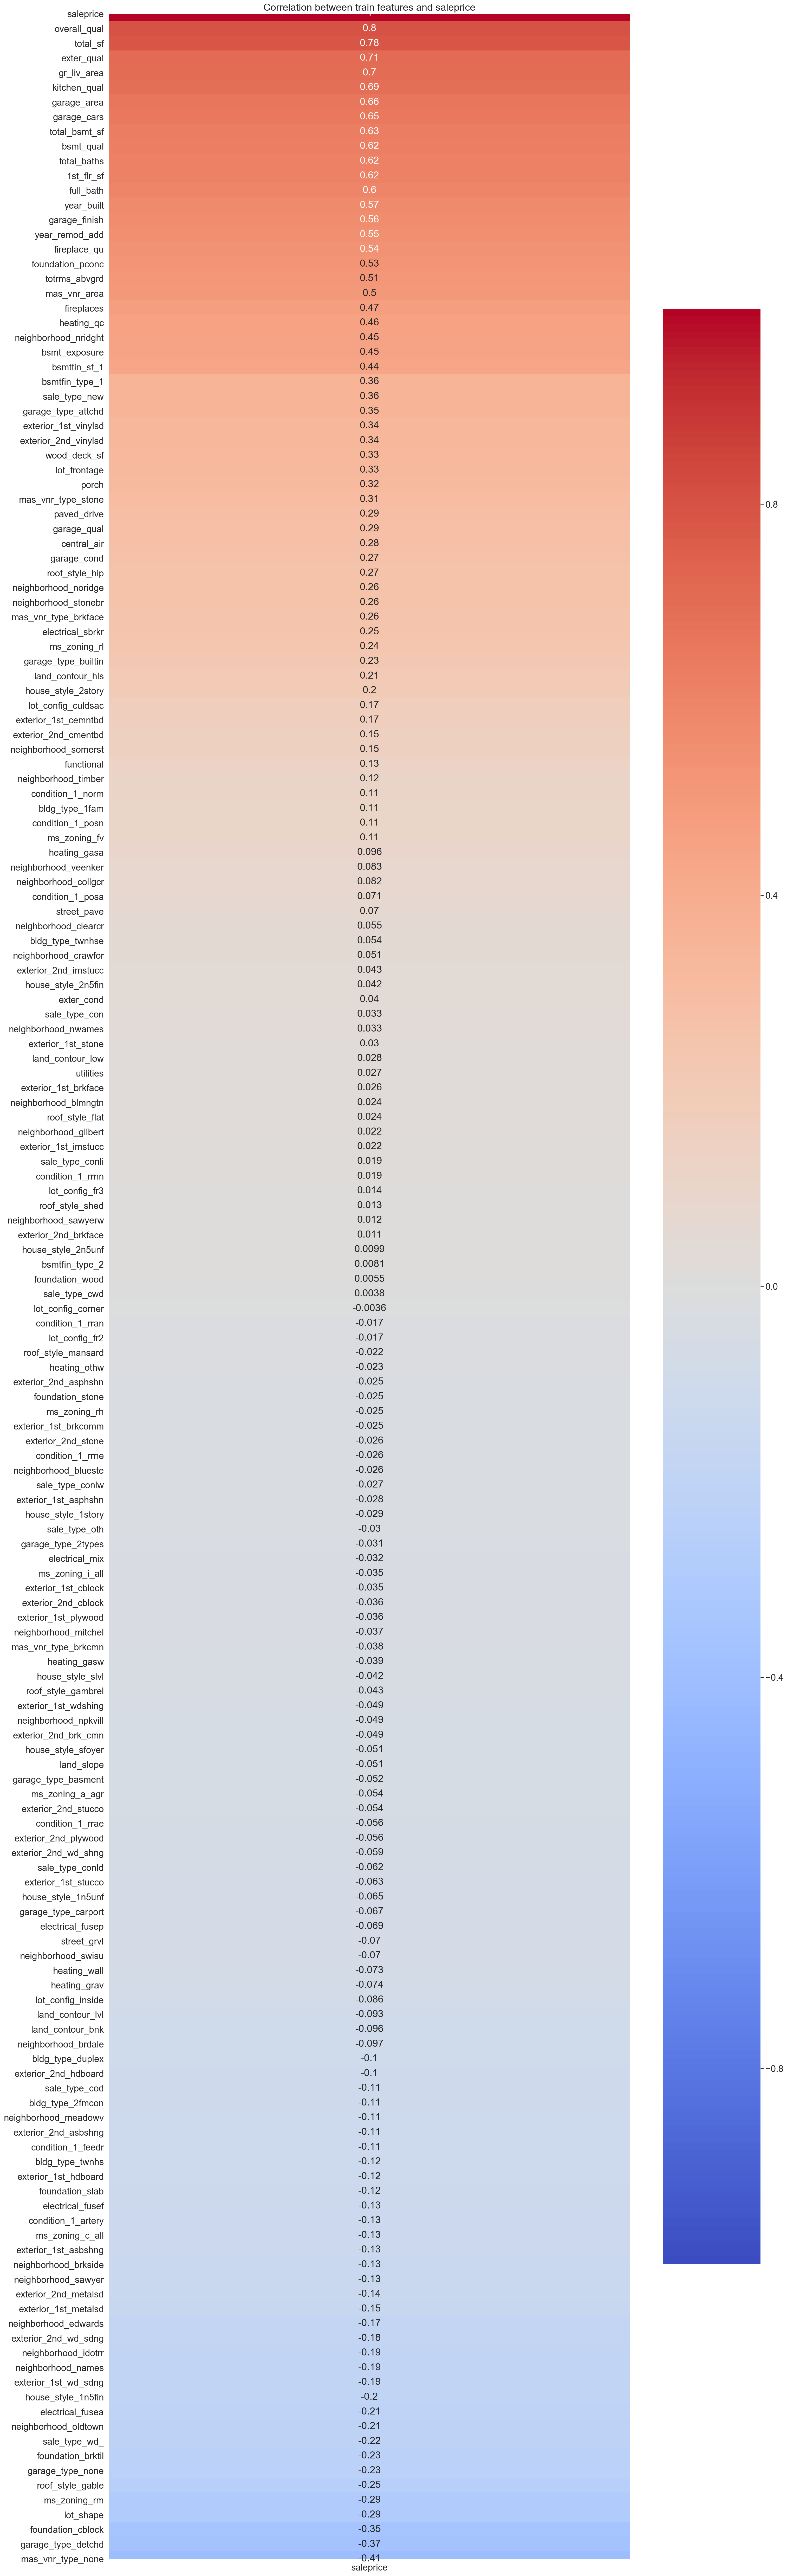

In [249]:
train_corr = train.corr()

plt.figure(figsize=(20,90))
# sns.set(font_scale=1.6)
sns.heatmap(train_corr[['saleprice']].sort_values(by=['saleprice'],ascending=False),
      vmin=-1,
      cmap='coolwarm',
      annot=True)
plt.title("Correlation between train features and saleprice")

### Linear regression with the fully-numeric train set

In [250]:
X = train.copy()
y = train["saleprice"]

In [251]:
X.drop(["saleprice"], axis = 1, inplace=True) 


In [252]:
print("X shape is:",X.shape)
print("y shape is:",y.shape)

X shape is: (1987, 173)
y shape is: (1987,)


In [253]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_val_sc = ss.transform(X_val)

In [254]:
lr = LinearRegression()

lr.fit(X_train_sc, y_train)
Xtr_score = lr.score(X_train_sc, y_train)
print("X_train score is:", Xtr_score)
Xtr_pred = lr.predict(X_train_sc)
Xtr_rmse = np.sqrt(metrics.mean_squared_error(y_train, Xtr_pred))

Xval_score = lr.score(X_val_sc, y_val)
print("X_val score is:", Xval_score)
Xval_pred = lr.predict(X_val_sc)
Xval_rmse = np.sqrt(metrics.mean_squared_error(y_val, Xval_pred))

X_sc = ss.transform(X)
train_score = lr.score(X_sc, y)
X_pred = lr.predict(X_sc)
X_rmse = np.sqrt(metrics.mean_squared_error(y, X_pred))

print("Overall train score is:", train_score)
print()

print("X_train RMSE is:",Xtr_rmse)
print("X_val RMSE is:", Xval_rmse)

if Xval_rmse < Xtr_rmse:
    print("RMSE score improved (is lower) for X_val")
else:
    print("RMSE score worsened (is higher) for X_val")

print("Overal RMSE is:", X_rmse)

X_train score is: 0.8911831527725935
X_val score is: -9.976816234109937e+19
Overall train score is: -2.440742810505031e+19

X_train RMSE is: 26396.60407332863
X_val RMSE is: 787596163735163.0
RMSE score worsened (is higher) for X_val
Overal RMSE is: 393897163032029.7



## Lasso

Clearly, our existing linear model is overfitting to the train. 

Most likely, our new numerical features from nominal ones are making the model go haywire.

One way to try to reduce this is by doing aggressive feature selection. We'd started off with 67 features - pretty much almost everything except some features that have 90% null values - and by the time we ran get_dummies, we'd ended up with 174 features. Part of this extremely conservative approach stems from a lack of deep understanding about what affects property prices. 

We can try to use LassoCV to help us understand which features we can drop.


In [255]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train_sc, y_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

398.26111565359196


....................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.5s finished


Based on our understanding of Ridge and Lasso models, Lasso makes the most sense because it would be helpful in reducing the coeffcient of some "useless" features to 0 and identifying which features to keep.

In [256]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train_sc, y_train)

Xtr_score = lasso.score(X_train_sc, y_train)
print("Using Lasso...")
print("X_train score is:", Xtr_score)
Xtr_pred = lasso.predict(X_train_sc)
Xtr_rmse = np.sqrt(metrics.mean_squared_error(y_train, Xtr_pred))

Xval_score = lasso.score(X_val_sc, y_val)
print("X_val score is:", Xval_score)
Xval_pred = lasso.predict(X_val_sc)
Xval_rmse = np.sqrt(metrics.mean_squared_error(y_val, Xval_pred))


X_sc = ss.transform(X)
train_score = lasso.score(X_sc, y)
X_pred = lasso.predict(X_sc)
X_rmse = np.sqrt(metrics.mean_squared_error(y, X_pred))

print("Overall train score is:", train_score)
print()

print("X_train RMSE is:",Xtr_rmse)
print("X_val RMSE is:", Xval_rmse)

if Xval_rmse < Xtr_rmse:
    print("RMSE score improved (is lower) for X_val")
else:
    print("RMSE score worsened (is higher) for X_val")

print("Overal RMSE is:", X_rmse)


Using Lasso...
X_train score is: 0.886226939553259
X_val score is: 0.8891526110560038
Overall train score is: 0.8869443533607504

X_train RMSE is: 26991.045622791728
X_val RMSE is: 26252.48018979261
RMSE score improved (is lower) for X_val
Overal RMSE is: 26808.219621031752


We seem to have at least gotten the over-fitting out of the way for now.

### Getting Lasso co-efficients

In [257]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

variable          coef      abs_coef
19            gr_liv_area  20710.056017  20710.056017
4            overall_qual  14583.259820  14583.259820
70   neighborhood_nridght  11192.966779  11192.966779
27            garage_cars   7778.694458   7778.694458
21           kitchen_qual   6871.456295   6871.456295
76   neighborhood_stonebr   6329.014107   6329.014107
88         bldg_type_1fam   5487.891284   5487.891284
8              exter_qual   5316.657405   5316.657405
7            mas_vnr_area   4942.693343   4942.693343
11          bsmt_exposure   4751.681307   4751.681307
69   neighborhood_noridge   4501.592112   4501.592112
92       bldg_type_twnhse  -4452.645690   4452.645690
25           fireplace_qu   4059.041617   4059.041617
12         bsmtfin_type_1   3972.204188   3972.204188
91        bldg_type_twnhs  -3963.148137   3963.148137
110  exterior_1st_brkface   3603.801306   3603.801306
95     house_style_1story   3497.704386   3497.704386
61   neighborhood_edwards  -3261.168735   3261.168735
170         sale_type_new   3212.022379   3212.022379
45       land_contour_bnk  -3111.741938   3111.741938

In [258]:
lasso_coefs.tail(20)

variable  coef  abs_coef
103    roof_style_gambrel  -0.0       0.0
41           ms_zoning_rl   0.0       0.0
105    roof_style_mansard  -0.0       0.0
106       roof_style_shed   0.0       0.0
131  exterior_2nd_plywood  -0.0       0.0
128  exterior_2nd_hdboard  -0.0       0.0
126   exterior_2nd_cblock   0.0       0.0
121  exterior_1st_wdshing  -0.0       0.0
119  exterior_1st_vinylsd   0.0       0.0
34               total_sf   0.0       0.0
117    exterior_1st_stone   0.0       0.0
116  exterior_1st_plywood   0.0       0.0
115  exterior_1st_metalsd   0.0       0.0
114  exterior_1st_imstucc  -0.0       0.0
36        ms_zoning_a_agr   0.0       0.0
111   exterior_1st_cblock   0.0       0.0
109  exterior_1st_brkcomm   0.0       0.0
108  exterior_1st_asphshn   0.0       0.0
107  exterior_1st_asbshng  -0.0       0.0
172         sale_type_wd_  -0.0       0.0

In [259]:
# taking a look at the features that have been zero-ed
lasso_coefs.loc[lasso_coefs["abs_coef"]==0]

variable  coef  abs_coef
143      foundation_pconc  -0.0       0.0
73    neighborhood_sawyer   0.0       0.0
142     foundation_cblock   0.0       0.0
140    mas_vnr_type_stone   0.0       0.0
139     mas_vnr_type_none   0.0       0.0
..                    ...   ...       ...
111   exterior_1st_cblock   0.0       0.0
109  exterior_1st_brkcomm   0.0       0.0
108  exterior_1st_asphshn   0.0       0.0
107  exterior_1st_asbshng  -0.0       0.0
172         sale_type_wd_  -0.0       0.0

[66 rows x 3 columns]

### Removing zero-ed features

We want to remove the zeroed features and review our model.


In [260]:
#creating a list of features to be dropped
zero_feat = [i for i in lasso_coefs.loc[lasso_coefs["abs_coef"]==0, "variable"]]
len(zero_feat)

66

In [261]:
zero_feat

['foundation_pconc',
 'neighborhood_sawyer',
 'foundation_cblock',
 'mas_vnr_type_stone',
 'mas_vnr_type_none',
 'foundation_stone',
 '1st_flr_sf',
 'electrical_mix',
 'foundation_wood',
 'total_bsmt_sf',
 'sale_type_conli',
 'year_built',
 'sale_type_con',
 'garage_type_detchd',
 'garage_type_carport',
 'garage_type_builtin',
 'garage_type_attchd',
 'electrical_sbrkr',
 'heating_gasa',
 'exterior_2nd_wd_sdng',
 'electrical_fusep',
 'electrical_fusef',
 'electrical_fusea',
 'heating_wall',
 'central_air',
 'heating_gasw',
 'garage_qual',
 'exterior_2nd_asphshn',
 'exterior_2nd_vinylsd',
 'lot_config_inside',
 'roof_style_gable',
 'roof_style_flat',
 'street_grvl',
 'street_pave',
 'land_contour_lvl',
 'lot_config_fr2',
 'house_style_1n5fin',
 'bldg_type_duplex',
 'garage_cond',
 'neighborhood_blmngtn',
 'condition_1_rran',
 'neighborhood_blueste',
 'neighborhood_brkside',
 'condition_1_artery',
 'neighborhood_timber',
 'neighborhood_swisu',
 'roof_style_gambrel',
 'ms_zoning_rl',
 'roo

In [262]:
X.shape

(1987, 173)

In [263]:
y.shape

(1987,)

In [264]:

X.drop(zero_feat, axis = 1, inplace=True) 
print(X.shape)

X.head()

(1987, 107)


lot_frontage  lot_shape  utilities  land_slope  overall_qual  \
Id                                                                  
109          68.0          2          3           2             6   
544          43.0          2          3           2             7   
153          68.0          3          3           2             5   
318          73.0          3          3           2             5   
255          82.0          2          3           2             6   

     year_remod_add  mas_vnr_area  exter_qual  exter_cond  bsmt_qual  \
Id                                                                     
109            2005         289.0           4           3          3   
544            1997         132.0           4           3          4   
153            2007           0.0           3           4          3   
318            2007           0.0           3           3          4   
255            1993           0.0           3           3          2   

     bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  heating_qc  \
Id                                                                             
109              1               6         533.0               1           5   
544              1               6         637.0               1           5   
153              1               6         731.0               1           3   
318              1               1           0.0               1           4   
255              1               1           0.0               1           3   

     gr_liv_area  full_bath  kitchen_qual  totrms_abvgrd  functional  \
Id                                                                     
109         1479        2.0             4              6           7   
544         2122        3.0             4              8           7   
153         1057        2.0             4              5           7   
318         1444        2.0             3              7           7   
255         1445        2.0             3              6           7   

     fireplaces  fireplace_qu  garage_finish  garage_cars  garage_area  \
Id                                                                       
109           0             0              2          2.0        475.0   
544           1             3              2          2.0        559.0   
153           0             0              1          1.0        246.0   
318           0             0              3          2.0        400.0   
255           0             0              1          2.0        484.0   

     paved_drive  wood_deck_sf  porch  total_baths  ms_zoning_c_all  \
Id                                                                    
109            2             0      1          3.0                0   
544            2             0      1          4.0                0   
153            2             0      1          2.0                0   
318            2           100      0          3.0                0   
255            0             0      1          2.0                0   

     ms_zoning_fv  ms_zoning_i_all  ms_zoning_rh  ms_zoning_rm  \
Id                                                               
109             0                0             0             0   
544             0                0             0             0   
153             0                0             0             0   
318             0                0             0             0   
255             0                0             0             0   

     land_contour_bnk  land_contour_hls  land_contour_low  lot_config_corner  \
Id                                                                             
109                 0                 0                 0                  0   
544                 0                 0                 0                  0   
153                 0                 0                 0                  0   
318                 0                 0                 0             

In [265]:
X.columns

Index(['lot_frontage', 'lot_shape', 'utilities', 'land_slope', 'overall_qual',
       'year_remod_add', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'bsmt_qual',
       ...
       'heating_othw', 'garage_type_2types', 'garage_type_basment',
       'garage_type_none', 'sale_type_cod', 'sale_type_cwd', 'sale_type_conld',
       'sale_type_conlw', 'sale_type_new', 'sale_type_oth'],
      dtype='object', length=107)

In [266]:
mod1_train = X.copy()
mod1_train.shape

(1987, 107)

In [267]:
mod1_train["saleprice"] = train["saleprice"]

### Heatmap after Lasso

Text(0.5, 1, 'Correlation between train features and saleprice')

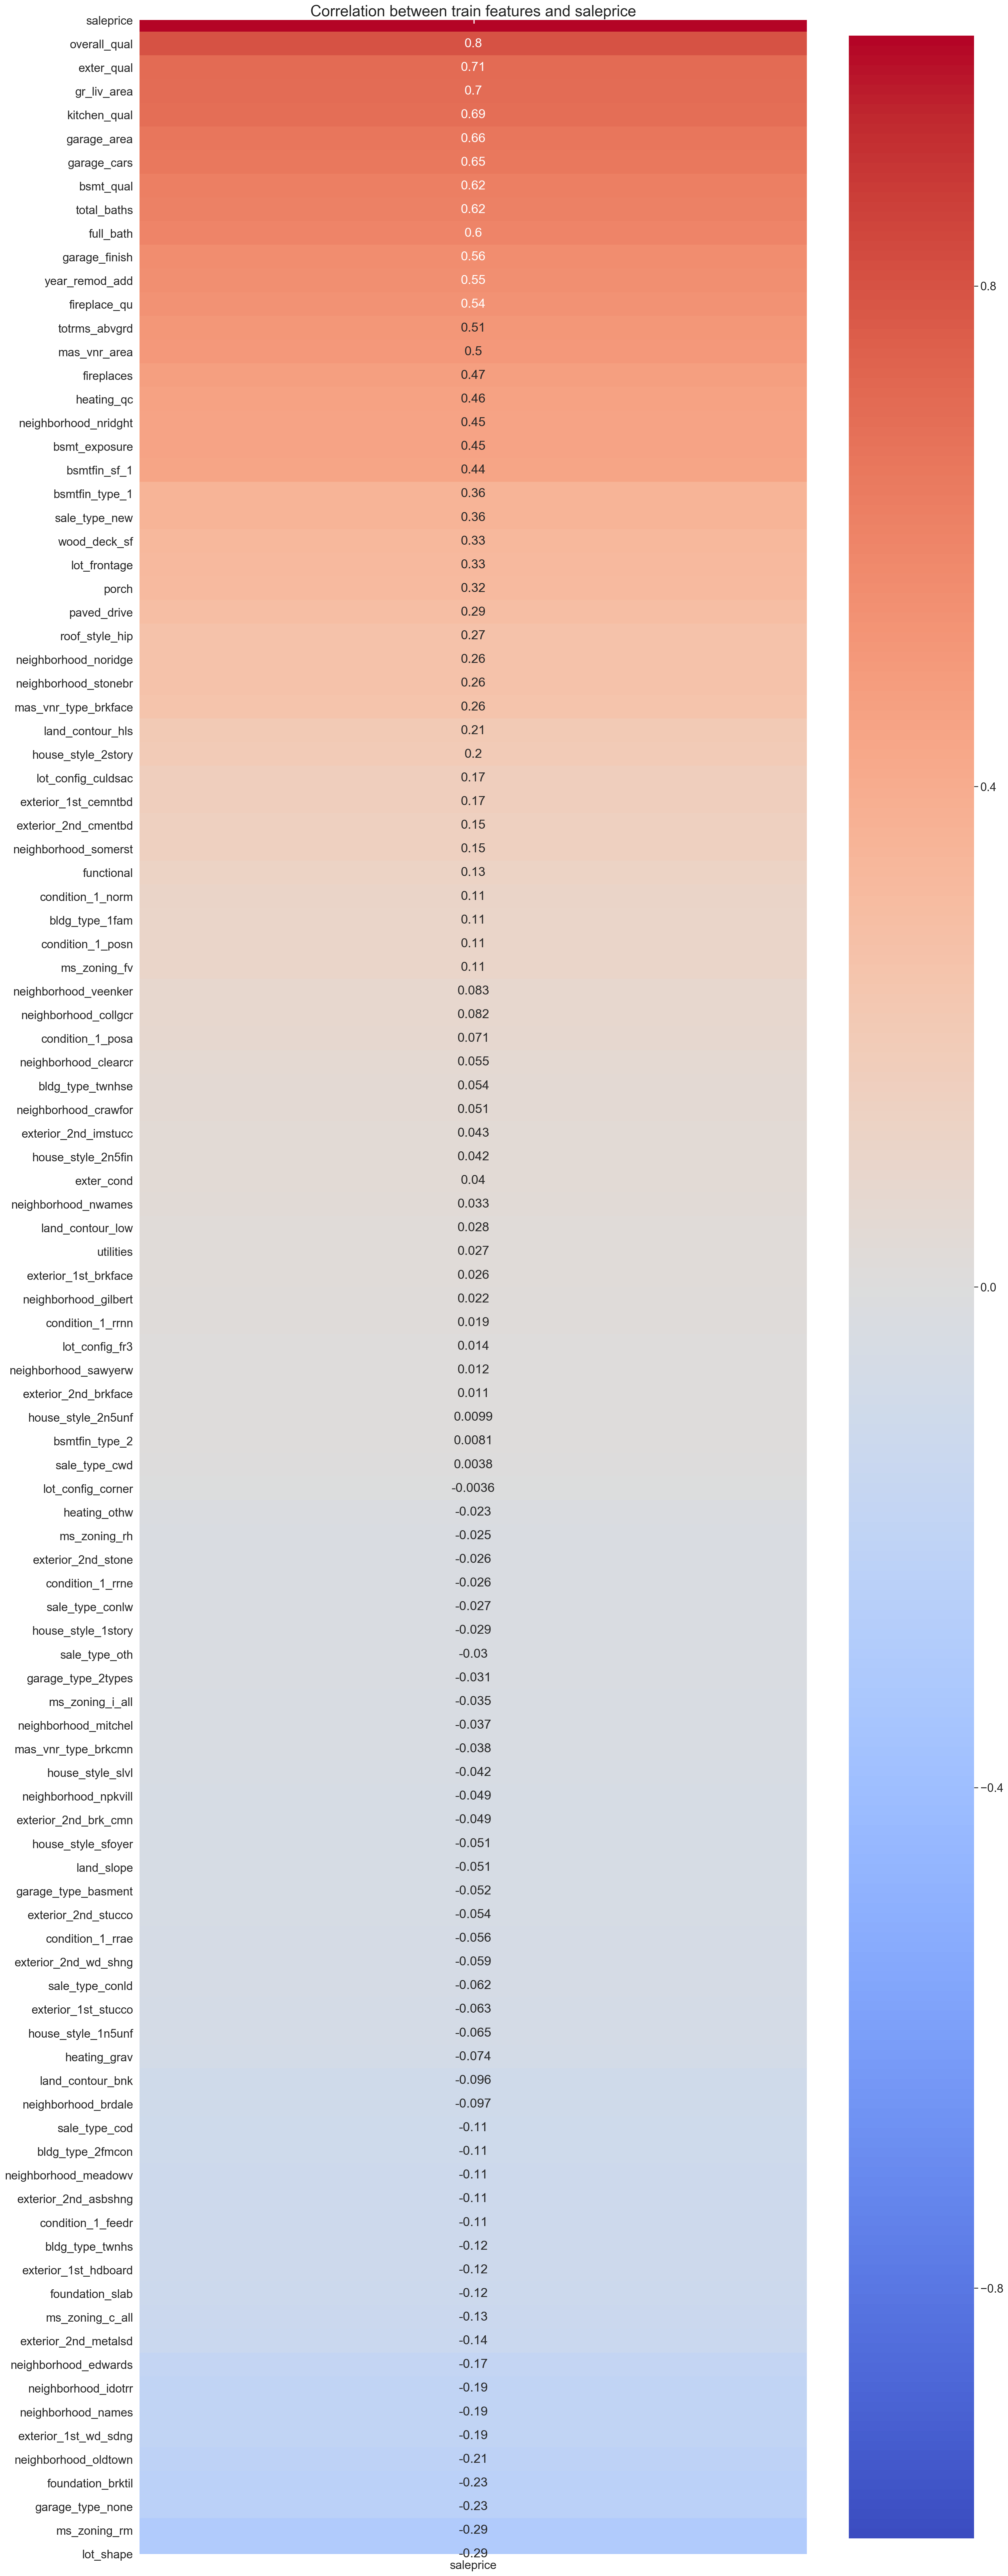

In [286]:
train_corr = mod1_train.corr()

plt.figure(figsize=(20,70))
# sns.set(font_scale=1.6)
sns.heatmap(train_corr[['saleprice']].sort_values(by=['saleprice'],ascending=False),
      vmin=-1,
      cmap='coolwarm',
      annot=True)
plt.title("Correlation between train features and saleprice", fontsize='large')

In [287]:
print("X shape is:",X.shape)
print("y shape is:",y.shape)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_val_sc = ss.transform(X_val)


X shape is: (1987, 30)
y shape is: (1987,)


In [288]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train_sc, y_train)

Xtr_score = lasso.score(X_train_sc, y_train)
print("Using Lasso...")
print("X_train score is:", Xtr_score)
Xtr_pred = lasso.predict(X_train_sc)
Xtr_rmse = np.sqrt(metrics.mean_squared_error(y_train, Xtr_pred))

Xval_score = lasso.score(X_val_sc, y_val)
print("X_val score is:", Xval_score)
Xval_pred = lasso.predict(X_val_sc)
Xval_rmse = np.sqrt(metrics.mean_squared_error(y_val, Xval_pred))


X_sc = ss.transform(X)
train_score = lasso.score(X_sc, y)
X_pred = lasso.predict(X_sc)
X_rmse = np.sqrt(metrics.mean_squared_error(y, X_pred))

print("Overall train score is:", train_score)
print()

print("X_train RMSE is:",Xtr_rmse)
print("X_val RMSE is:", Xval_rmse)

if Xval_rmse < Xtr_rmse:
    print("RMSE score improved (is lower) for X_val")
else:
    print("RMSE score worsened (is higher) for X_val")

print("Overal RMSE is:", X_rmse)


Using Lasso...
X_train score is: 0.868738907186933
X_val score is: 0.8870387767781
Overall train score is: 0.8732177443390553

X_train RMSE is: 28991.320481292303
X_val RMSE is: 26501.61246236869
RMSE score improved (is lower) for X_val
Overal RMSE is: 28389.064445182266


Although RMSE for the overall train set is higher (less ideal) than for X_val, at least the model is not overfitting anymore.

Now to look at which features are most impactful.



In [289]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

In [290]:
lasso_coefs.sort_values("abs_coef", ascending=False).head(30)

variable          coef      abs_coef
0            gr_liv_area  21816.147551  21816.147551
1           overall_qual  15703.643352  15703.643352
2   neighborhood_nridght  10366.438621  10366.438621
3            garage_cars   8383.939907   8383.939907
7             exter_qual   6355.402626   6355.402626
4           kitchen_qual   6284.032371   6284.032371
5   neighborhood_stonebr   6145.369269   6145.369269
9          bsmt_exposure   6057.152618   6057.152618
6         bldg_type_1fam   5989.896828   5989.896828
16    house_style_1story   5705.689293   5705.689293
12          fireplace_qu   5240.750620   5240.750620
8           mas_vnr_area   5033.775772   5033.775772
13        bsmtfin_type_1   4854.440362   4854.440362
10  neighborhood_noridge   4484.474343   4484.474343
21           total_baths   3804.593971   3804.593971
18         sale_type_new   3701.898436   3701.898436
26        year_remod_add   3539.196229   3539.196229
15  exterior_1st_brkface   3326.435171   3326.435171
20            functional   2883.670125   2883.670125
11      bldg_type_twnhse  -2772.077669   2772.077669
19      land_contour_bnk  -2599.245499   2599.245499
17  neighborhood_edwards  -2539.350364   2539.350364
27  mas_vnr_type_brkface  -2424.414915   2424.414915
28  neighborhood_crawfor   2327.832495   2327.832495
29             full_bath   2314.572309   2314.572309
22        roof_style_hip   2304.929717   2304.929717
24      land_contour_hls   2240.479499   2240.479499
14       bldg_type_twnhs  -2160.252581   2160.252581
23      garage_type_none   2147.505908   2147.505908
25          bsmtfin_sf_1   1703.782217   1703.782217

Now to see which features have the strongest negative correlations.


In [291]:
lasso_coefs.sort_values("coef", ascending=True).head(30)

variable          coef      abs_coef
11      bldg_type_twnhse  -2772.077669   2772.077669
19      land_contour_bnk  -2599.245499   2599.245499
17  neighborhood_edwards  -2539.350364   2539.350364
27  mas_vnr_type_brkface  -2424.414915   2424.414915
14       bldg_type_twnhs  -2160.252581   2160.252581
25          bsmtfin_sf_1   1703.782217   1703.782217
23      garage_type_none   2147.505908   2147.505908
24      land_contour_hls   2240.479499   2240.479499
22        roof_style_hip   2304.929717   2304.929717
29             full_bath   2314.572309   2314.572309
28  neighborhood_crawfor   2327.832495   2327.832495
20            functional   2883.670125   2883.670125
15  exterior_1st_brkface   3326.435171   3326.435171
26        year_remod_add   3539.196229   3539.196229
18         sale_type_new   3701.898436   3701.898436
21           total_baths   3804.593971   3804.593971
10  neighborhood_noridge   4484.474343   4484.474343
13        bsmtfin_type_1   4854.440362   4854.440362
8           mas_vnr_area   5033.775772   5033.775772
12          fireplace_qu   5240.750620   5240.750620
16    house_style_1story   5705.689293   5705.689293
6         bldg_type_1fam   5989.896828   5989.896828
9          bsmt_exposure   6057.152618   6057.152618
5   neighborhood_stonebr   6145.369269   6145.369269
4           kitchen_qual   6284.032371   6284.032371
7             exter_qual   6355.402626   6355.402626
3            garage_cars   8383.939907   8383.939907
2   neighborhood_nridght  10366.438621  10366.438621
1           overall_qual  15703.643352  15703.643352
0            gr_liv_area  21816.147551  21816.147551

### Getting our top 30 features
Now we want to extract the list of our top 30 features


In [292]:
top_30 = lasso_coefs[["variable", "abs_coef"]].sort_values("abs_coef", ascending=False).head(30)
top_30

variable      abs_coef
0            gr_liv_area  21816.147551
1           overall_qual  15703.643352
2   neighborhood_nridght  10366.438621
3            garage_cars   8383.939907
7             exter_qual   6355.402626
4           kitchen_qual   6284.032371
5   neighborhood_stonebr   6145.369269
9          bsmt_exposure   6057.152618
6         bldg_type_1fam   5989.896828
16    house_style_1story   5705.689293
12          fireplace_qu   5240.750620
8           mas_vnr_area   5033.775772
13        bsmtfin_type_1   4854.440362
10  neighborhood_noridge   4484.474343
21           total_baths   3804.593971
18         sale_type_new   3701.898436
26        year_remod_add   3539.196229
15  exterior_1st_brkface   3326.435171
20            functional   2883.670125
11      bldg_type_twnhse   2772.077669
19      land_contour_bnk   2599.245499
17  neighborhood_edwards   2539.350364
27  mas_vnr_type_brkface   2424.414915
28  neighborhood_crawfor   2327.832495
29             full_bath   2314.572309
22        roof_style_hip   2304.929717
24      land_contour_hls   2240.479499
14       bldg_type_twnhs   2160.252581
23      garage_type_none   2147.505908
25          bsmtfin_sf_1   1703.782217

In [293]:
top_30_list = [i for i in top_30["variable"]]
top_30_list

['gr_liv_area',
 'overall_qual',
 'neighborhood_nridght',
 'garage_cars',
 'exter_qual',
 'kitchen_qual',
 'neighborhood_stonebr',
 'bsmt_exposure',
 'bldg_type_1fam',
 'house_style_1story',
 'fireplace_qu',
 'mas_vnr_area',
 'bsmtfin_type_1',
 'neighborhood_noridge',
 'total_baths',
 'sale_type_new',
 'year_remod_add',
 'exterior_1st_brkface',
 'functional',
 'bldg_type_twnhse',
 'land_contour_bnk',
 'neighborhood_edwards',
 'mas_vnr_type_brkface',
 'neighborhood_crawfor',
 'full_bath',
 'roof_style_hip',
 'land_contour_hls',
 'bldg_type_twnhs',
 'garage_type_none',
 'bsmtfin_sf_1']

In [294]:
X = train[top_30_list]
X.head()

gr_liv_area  overall_qual  neighborhood_nridght  garage_cars  exter_qual  \
Id                                                                              
109         1479             6                     0          2.0           4   
544         2122             7                     0          2.0           4   
153         1057             5                     0          1.0           3   
318         1444             5                     0          2.0           3   
255         1445             6                     0          2.0           3   

     kitchen_qual  neighborhood_stonebr  bsmt_exposure  bldg_type_1fam  \
Id                                                                       
109             4                     0              1               1   
544             4                     0              1               1   
153             4                     0              1               1   
318             3                     0              1               1   
255             3                     0              1               1   

     house_style_1story  fireplace_qu  mas_vnr_area  bsmtfin_type_1  \
Id                                                                    
109                   0             0         289.0               6   
544                   0             3         132.0               6   
153                   1             0           0.0               6   
318                   0             0           0.0               1   
255                   0             0           0.0               1   

     neighborhood_noridge  total_baths  sale_type_new  year_remod_add  \
Id                                                                      
109                     0          3.0              0            2005   
544                     0          4.0              0            1997   
153                     0          2.0              0            2007   
318                     0          3.0              0            2007   
255                     0          2.0              0            1993   

     exterior_1st_brkface  functional  bldg_type_twnhse  land_contour_bnk  \
Id                                                                          
109                     0           7                 0                 0   
544                     0           7                 0                 0   
153                     0           7                 0                 0   
318                     0           7                 0                 0   
255                     0           7                 0                 0   

     neighborhood_edwards  mas_vnr_type_brkface  neighborhood_crawfor  \
Id                                                                      
109                     0                     1                     0   
544                     0                     1                     0   
153                     0                     0                     0   
318                     0                     0                     0   
255                     0                     0                     0   

     full_bath  roof_style_hip  land_contour_hls  bldg_type_twnhs  \
Id                                                                  
109        2.0               0                 0                0   
544        3.0               0                 0                0   
153        2.0               0                 0                0   
318        2.0               0                 0                0   
255        2.0               0                 0                0   

     garage_type_none  bsmtfin_sf_1  
Id                                   
109                 0         533.0  
544                 0         637.0  
153                 0         731.0  
318                 0           0.0  
255                 0           0.0

In [295]:
print("X shape is:",X.shape)
print("y shape is:",y.shape)

X shape is: (1987, 30)
y shape is: (1987,)


In [296]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_val_sc = ss.transform(X_val)


In [297]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train_sc, y_train)

Xtr_score = lasso.score(X_train_sc, y_train)
print("Using Lasso...")
print("X_train score is:", Xtr_score)
Xtr_pred = lasso.predict(X_train_sc)
Xtr_rmse = np.sqrt(metrics.mean_squared_error(y_train, Xtr_pred))

Xval_score = lasso.score(X_val_sc, y_val)
print("X_val score is:", Xval_score)
Xval_pred = lasso.predict(X_val_sc)
Xval_rmse = np.sqrt(metrics.mean_squared_error(y_val, Xval_pred))


X_sc = ss.transform(X)
train_score = lasso.score(X_sc, y)
X_pred = lasso.predict(X_sc)
X_rmse = np.sqrt(metrics.mean_squared_error(y, X_pred))

print("Overall train score is:", train_score)
print()

print("X_train RMSE is:",Xtr_rmse)
print("X_val RMSE is:", Xval_rmse)

if Xval_rmse < Xtr_rmse:
    print("RMSE score improved (is lower) for X_val")
else:
    print("RMSE score worsened (is higher) for X_val")

print("Overal RMSE is:", X_rmse)


Using Lasso...
X_train score is: 0.8687386669695785
X_val score is: 0.8870384594659668
Overall train score is: 0.873217485264655

X_train RMSE is: 28991.34700939357
X_val RMSE is: 26501.649684333162
RMSE score improved (is lower) for X_val
Overal RMSE is: 28389.093451118657


In [298]:
X.to_csv("./datasets/clean_train.csv", index=True)

In [299]:
train[["saleprice"]]

saleprice
Id             
109      130500
544      220000
153      109000
318      174000
255      138500
...         ...
1587     298751
785       82500
916      177000
639      144000
10       189000

[1987 rows x 1 columns]

In [300]:
y_csv = pd.DataFrame(train[["saleprice"]])
y_csv

saleprice
Id             
109      130500
544      220000
153      109000
318      174000
255      138500
...         ...
1587     298751
785       82500
916      177000
639      144000
10       189000

[1987 rows x 1 columns]

In [301]:
y_csv.shape

(1987, 1)

In [302]:
y_csv.to_csv("./datasets/clean_y.csv", index=True)

## Top 10 features for predicting saleprice

In [303]:
top_10 = lasso_coefs[["variable", "abs_coef"]].sort_values("abs_coef", ascending=False).head(10)
top_10_list = [i for i in top_10["variable"]]
top_10_list

['gr_liv_area',
 'overall_qual',
 'neighborhood_nridght',
 'garage_cars',
 'exter_qual',
 'kitchen_qual',
 'neighborhood_stonebr',
 'bsmt_exposure',
 'bldg_type_1fam',
 'house_style_1story']

Please continue to project_2_part_2 for the segment on predicting for the test dataset.